In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
import seaborn as sns
from babel.numbers import format_currency
import numpy as np

pd.set_option('display.max_rows', 2000)
locale.setlocale(locale.LC_ALL, '')

purchasers = pd.read_csv('purchaser.csv', parse_dates=['Date of Purchase'])
encashers = pd.read_csv('political_party.csv', parse_dates=['Date of Encashment'])

In [2]:
print(f"Total Number of Purchased Bonds: {purchasers.shape[0]}")
print(f"Total Number of Encashed  Bonds: {encashers.shape[0]}")
print(f"Missing from Purchased?: {encashers.shape[0] - purchasers.shape[0]}")
print(f"""Total Amount Purchased: {format_currency(purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Amount Encashed: {format_currency(encashers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")
print(f"""Total Unaccounted: {format_currency(encashers['Denomination'].sum() - purchasers['Denomination'].sum(),
                                                   "INR",
                                                   locale='en_IN')}
""")


Total Number of Purchased Bonds: 18871
Total Number of Encashed  Bonds: 20421
Missing from Purchased?: 1550
Total Amount Purchased: ₹1,21,55,51,32,000.00

Total Amount Encashed: ₹1,27,69,08,93,000.00

Total Unaccounted: ₹6,13,57,61,000.00



In [3]:
def clean_purchaser_df(df):
    df = df.copy()
    # remove in between space from all names
    df['ID'] = df['Purchaser Name'].str[:15].factorize()[0] + 1
    df['Year'] = df['Date of Purchase'].dt.year
    df['Month'] = df['Date of Purchase'].dt.month
    df['quarter'] = df['Date of Purchase'].dt.quarter
    id_map = df[['ID', 'Purchaser Name']].drop_duplicates().sort_values('ID')
    id_map.drop_duplicates(subset='ID', inplace=True)
    return id_map.merge(df[["ID", "Date of Purchase", "Denomination", "Year", "Month", "quarter"]], on='ID')

In [4]:
purchasers = clean_purchaser_df(purchasers)

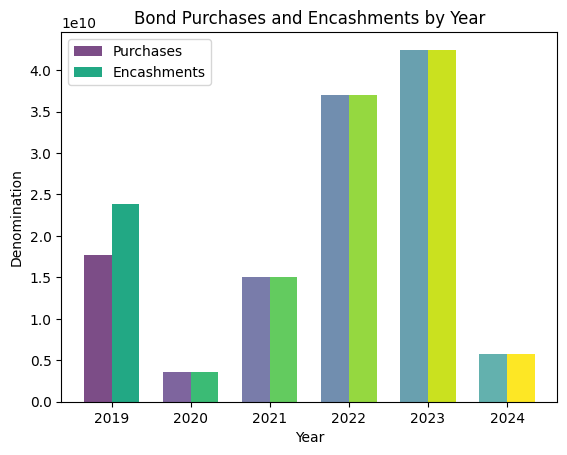

In [5]:
# Bond puchased by year, month and quarter

cmap = plt.get_cmap('viridis')

encashers['Year'] = encashers['Date of Encashment'].dt.year
encashers['Month'] = encashers['Date of Encashment'].dt.month
encashers['quarter'] = encashers['Date of Encashment'].dt.quarter
purchases_by_year = purchasers.groupby('Year')['Denomination'].sum()
encashments_by_year = encashers.groupby('Year')['Denomination'].sum()
all_years = sorted(set(purchases_by_year.index) | set(encashments_by_year.index))
purchases_by_year = purchases_by_year.reindex(all_years, fill_value=0)
encashments_by_year = encashments_by_year.reindex(all_years, fill_value=0)

fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(all_years))
colors1 = cmap(np.linspace(0, .5, len(all_years)))
colors2 = cmap(np.linspace(.6, 1, len(all_years)))

bars1 = ax.bar(index - bar_width/2, purchases_by_year, bar_width, label='Purchases', color=colors1, alpha=0.7)
bars2 = ax.bar(index + bar_width/2, encashments_by_year, bar_width, label='Encashments', color=colors2)

ax.set_xlabel('Year')
ax.set_ylabel('Denomination')
ax.set_title('Bond Purchases and Encashments by Year')
ax.set_xticks(index)
ax.set_xticklabels(all_years)
ax.legend()

plt.show()


In [6]:
# top pruchasers
purchasers.groupby('Purchaser Name')['Denomination'].sum().sort_values(ascending=False)[:25].reset_index()

Purchaser Name  Denomination
0         FUTURE GAMING AND HOTEL SERVICES PVT LTD   13680000000
1   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    9660000000
2                    QWIKSUPPLYCHAINPRIVATELIMITED    4100000000
3                            HALDIA ENERGY LIMITED    3770000000
4                                  VEDANTA LIMITED    3756500000
5                        ESSEL MINING AND INDS LTD    2245000000
6   WESTERN UP POWER TRANSMISSION COMPANY LI MITED    2200000000
7      BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO    1980000000
8                  KEVENTER FOODPARK INFRA LIMITED    1950000000
9                          MKJ ENTERPRISES LIMITED    1924200000
10                                   MADANLAL LTD.    1855000000
11               YASHODA SUPER SPECIALITY HOSPITAL    1620000000
12                 UTKAL ALUMINA INTERNATIONAL LTD    1453000000
13               DLF COMMERCIAL DEVELOPERS LIMITED    1300000000
14                  JINDAL STEEL AND POWER LIMITED    1230000000
15     B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD    1170000000
16                 DHARIWAL INFRASTRUCTURE LIMITED    1150000000
17                  BIRLACARBONINDIAPRIVATELIMITED    1050000000
18             CHENNAI GREEN WOODS PRIVATE LIMITED    1050000000
19                               RUNGTA SONS P LTD    1000000000
20                     IFB AGRO INDUSTRIES LIMITED     923000000
21                             TORRENTPOWERLIMITED     865000000
22                   AVEES TRADING FINANCE PVT LTD     855000000
23                     DR.REDDY'S LABORATORIES LTD     800000000
24             PRARAMBH SECURITIES PVT LTDPROPRIET     787500000

In [7]:
# Purchase by month and year
purchasers.groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().sort_values(ascending=False)[:25].reset_index()

Purchaser Name  Year  Month  Denomination
0                    QWIKSUPPLYCHAINPRIVATELIMITED  2022      1    2350000000
1         FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      1    2100000000
2         FUTURE GAMING AND HOTEL SERVICES PVT LTD  2021     10    1950000000
3                                    MADANLAL LTD.  2019      5    1855000000
4   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023     10    1600000000
5         FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023      4    1500000000
6         FUTURE GAMING AND HOTEL SERVICES PVT LTD  2020     10    1500000000
7   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023      4    1400000000
8                  KEVENTER FOODPARK INFRA LIMITED  2019      5    1400000000
9                    QWIKSUPPLYCHAINPRIVATELIMITED  2022     11    1250000000
10                                 VEDANTA LIMITED  2022     11    1100000000
11        FUTURE GAMING AND HOTEL SERVICES PVT LTD  2021      4    1090000000
12        FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022     10    1050000000
13  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2021     10    1000000000
14        FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      4    1000000000
15  WESTERN UP POWER TRANSMISSION COMPANY LI MITED  2023     11    1000000000
16     BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO  2023     11     930000000
17  WESTERN UP POWER TRANSMISSION COMPANY LI MITED  2023     10     900000000
18               YASHODA SUPER SPECIALITY HOSPITAL  2022      4     800000000
19  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2021      4     780000000
20  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023      7     750000000
21        FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      7     750000000
22                                 VEDANTA LIMITED  2022      1     730000000
23  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022      1     700000000
24        FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023     10     650000000

In [8]:
purchasers[purchasers['Purchaser Name'] == 'FUTURE GAMING AND HOTEL SERVICES PVT LTD'].groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().reset_index()

Purchaser Name  Year  Month  Denomination
0   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2020     10    1500000000
1   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2021      4    1090000000
2   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2021      7     300000000
3   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2021     10    1950000000
4   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      1    2100000000
5   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      4    1000000000
6   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022      7     750000000
7   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022     10    1050000000
8   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2022     12     100000000
9   FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023      1     380000000
10  FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023      4    1500000000
11  FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023      7     630000000
12  FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023     10     650000000
13  FUTURE GAMING AND HOTEL SERVICES PVT LTD  2023     11      50000000
14  FUTURE GAMING AND HOTEL SERVICES PVT LTD  2024      1     630000000

In [9]:
# MEGHA Engineering and Infrastructure Ltd 
purchasers[purchasers['Purchaser Name'] == 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED'].groupby(['Purchaser Name', 'Year', 'Month'])['Denomination'].sum().reset_index()

Purchaser Name  Year  Month  Denomination
0   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2019      4     650000000
1   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2019      5     600000000
2   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2019     10      50000000
3   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2020     10     200000000
4   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2021      4     780000000
5   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2021     10    1000000000
6   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022      1     700000000
7   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022      4     250000000
8   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022      7     500000000
9   MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022     10     100000000
10  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022     11     120000000
11  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2022     12     560000000
12  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023      1     400000000
13  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023      4    1400000000
14  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023      7     750000000
15  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  2023     10    1600000000

In [10]:
encashers.head()

Date of Encashment               Name of the Political Party  Denomination  \
0         2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
1         2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
2         2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM      10000000   
3         2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   
4         2019-04-12  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM       1000000   

   Year  Month  quarter  
0  2019      4        2  
1  2019      4        2  
2  2019      4        2  
3  2019      4        2  
4  2019      4        2

In [11]:
df1 = purchasers.groupby(['Year', 'Month', 'Purchaser Name'])['Denomination'].sum().sort_values(ascending=False).reset_index()

In [12]:
df2 = encashers.groupby(['Year', 'Month', 'Name of the Political Party'])['Denomination'].sum().sort_values(ascending=False).reset_index()

In [13]:
df1.head()

Year  Month                                  Purchaser Name  Denomination
0  2022      1                   QWIKSUPPLYCHAINPRIVATELIMITED    2350000000
1  2022      1        FUTURE GAMING AND HOTEL SERVICES PVT LTD    2100000000
2  2021     10        FUTURE GAMING AND HOTEL SERVICES PVT LTD    1950000000
3  2019      5                                   MADANLAL LTD.    1855000000
4  2023     10  MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED    1600000000

In [73]:
df2["Name of the Political Party"].value_counts()

Name of the Political Party
BHARTIYA JANTA PARTY                              25
ALL INDIA TRINAMOOL CONGRESS                      23
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           21
BIJU JANATA DAL                                   14
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R            13
AAM AADMI PARTY                                   12
BHARAT RASHTRA SAMITHI                            11
TELUGU DESAM PARTY                                11
DMK PARTY IN PARLIAMENT                           10
SHIVSENA (POLITICAL PARTY)                         8
NATIONALIST CONGRESS PARTY PARLIAMENT OF           6
RASTRIYA JANTA DAL                                 5
SIKKIM KRANTIKARI MORCHA                           5
JHARKHAND MUKTI MORCHA                             5
ADYAKSHA SAMAJVADI PARTY                           3
JANASENA PARTY                                     3
BIHAR PRADESH JANTA DAL(UNITED)                    3
SHIROMANI AKALI DAL                                3
JANATA DAL ( SECUL

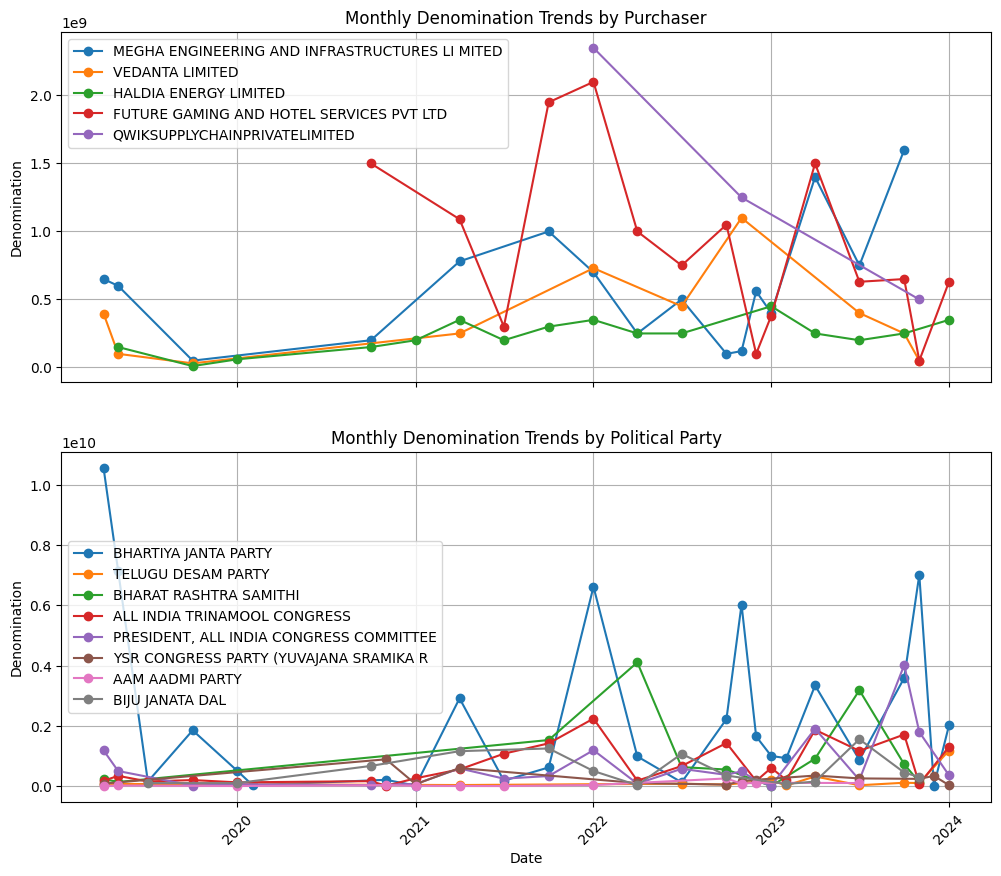

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
df1['Date'] = pd.to_datetime(df1[['Year', 'Month']].assign(DAY=1))
df2['Date'] = pd.to_datetime(df2[['Year', 'Month']].assign(DAY=1))

df1 = df1.sort_values(by='Date')
df2 = df2.sort_values(by='Date')

# Loop through each unique purchaser and plot
for purchaser in df1['Purchaser Name'].unique():
    if purchaser in ["FUTURE GAMING AND HOTEL SERVICES PVT LTD",
                     "MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED",
                     "QWIKSUPPLYCHAINPRIVATELIMITED",
                     "HALDIA ENERGY LIMITED",
                     "VEDANTA LIMITED"]:
        subset = df1[df1['Purchaser Name'] == purchaser]
        ax[0].plot(subset['Date'], subset['Denomination'], marker='o', label=purchaser)

# Loop through each unique political party and plot
for encasher in df2['Name of the Political Party'].unique():
    if encasher in ["BHARTIYA JANTA PARTY",
                    "ALL INDIA TRINAMOOL CONGRESS",
                    "PRESIDENT, ALL INDIA CONGRESS COMMITTEE",
                    "BIJU JANATA DAL",
                    "YSR CONGRESS PARTY (YUVAJANA SRAMIKA R",
                    "AAM AADMI PARTY",
                    "BHARAT RASHTRA SAMITHI",
                    "TELUGU DESAM PARTY"
                   ]:
        subset = df2[df2['Name of the Political Party'] == encasher]
        ax[1].plot(subset['Date'], subset['Denomination'], marker='o', label=encasher)

# Set titles and labels
ax[0].set_title('Monthly Denomination Trends by Purchaser')
ax[1].set_title('Monthly Denomination Trends by Political Party')
for a in ax:
    a.set_ylabel('Denomination')
    a.legend(loc="best")
    a.grid(True)

# Rotate date labels for clarity
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.show()


In [76]:
def compare(year, month):

    _df1 = df1[(df1.Month==month) & (df1.Year==year) & (df1.Denomination >=10000000)].sort_values(by='Denomination', ascending=False)[:10]
    _df2 = df2[(df2.Month==month) & (df2.Year==year) & (df2.Denomination >=100000000)].sort_values(by='Denomination', ascending=False)[:5]
    
    purchasers_data = pd.Series(_df1["Denomination"].values, index=_df1["Purchaser Name"]).to_dict()
    
    political_party_data = pd.Series(_df2["Denomination"].values, index=_df2["Name of the Political Party"]).to_dict()

    if len(political_party_data.keys()) == 0 or len(purchasers_data) == 0:
        return
    
    # Plot for top 10 purchasers
    fig, ax = plt.subplots(2, 1, figsize=(6, 8),dpi=300)
    # plt.figure(figsize=(6, 6), ax=ax[0])
    ax[0].pie(purchasers_data.values(), labels=purchasers_data.keys(), autopct='%1.1f%%')
    ax[0].set_title(f'Compare for {month}/{year}')
    # plt.show()
    
    # Plot for top 5 encashers
    # plt.figure(figsize=(6, 6), ax=ax[1])
    ax[1].pie(political_party_data.values(), labels=political_party_data.keys(), autopct='%1.1f%%')
    # plt.show()

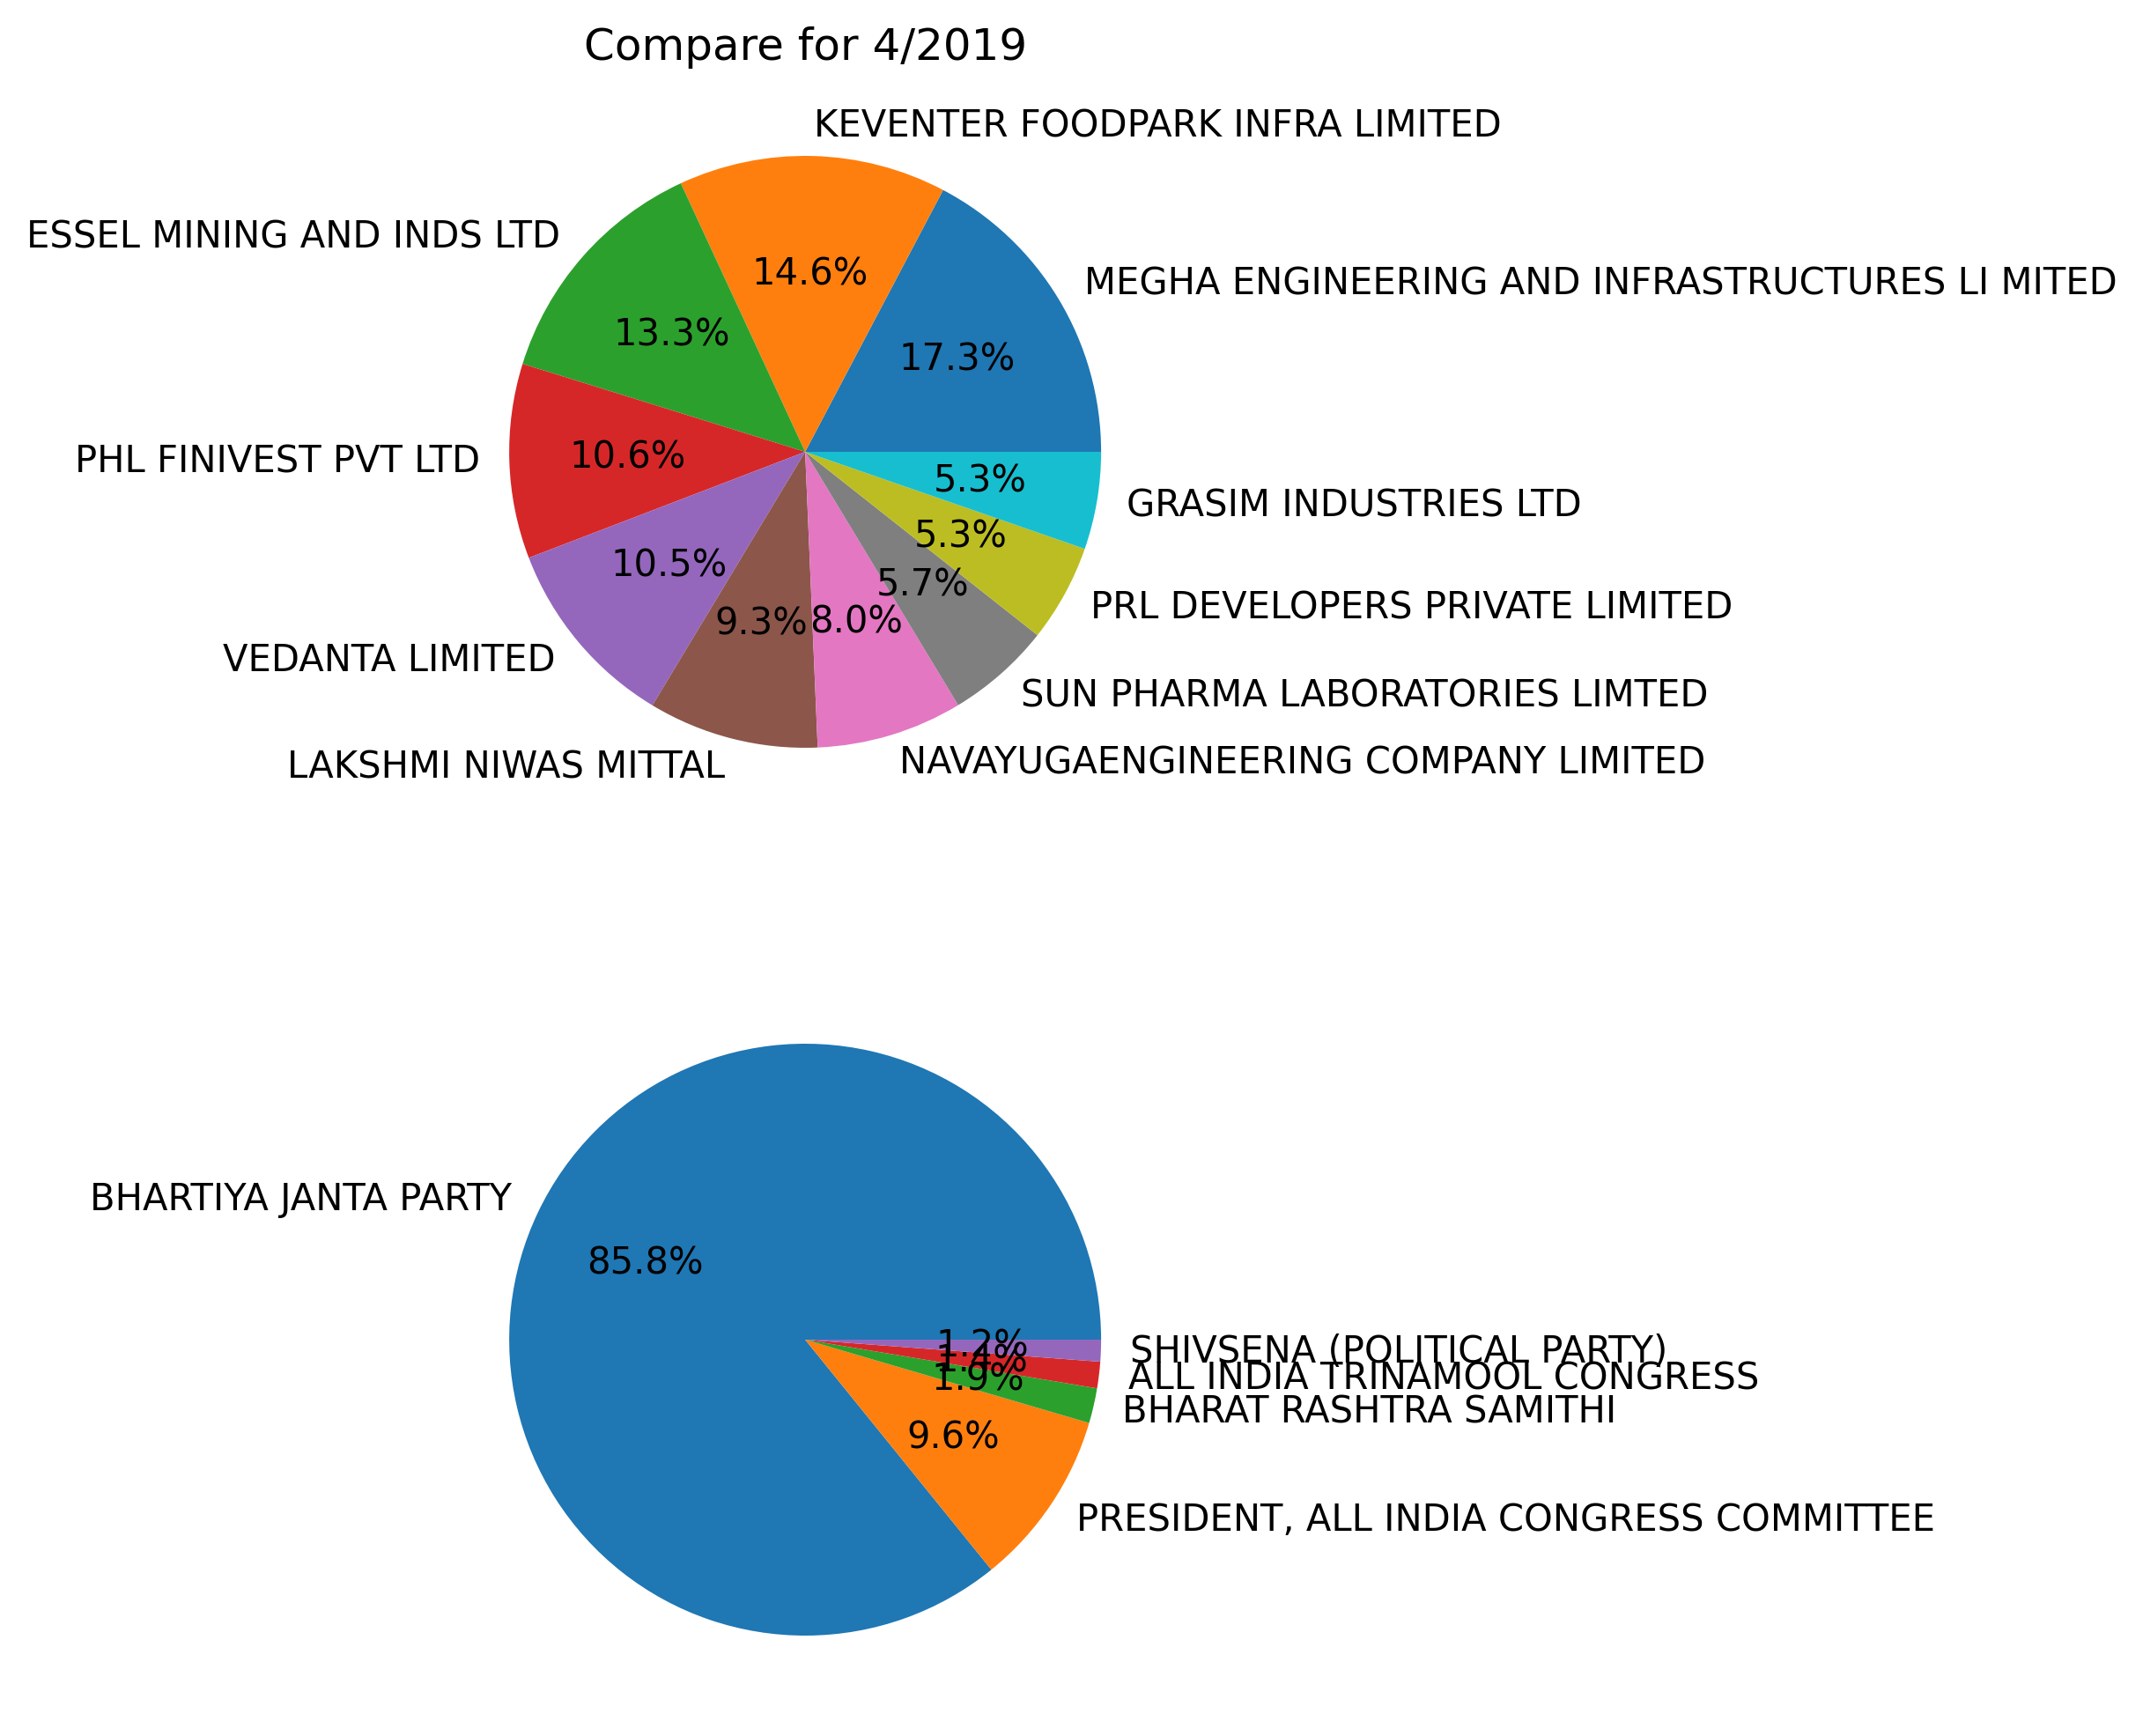

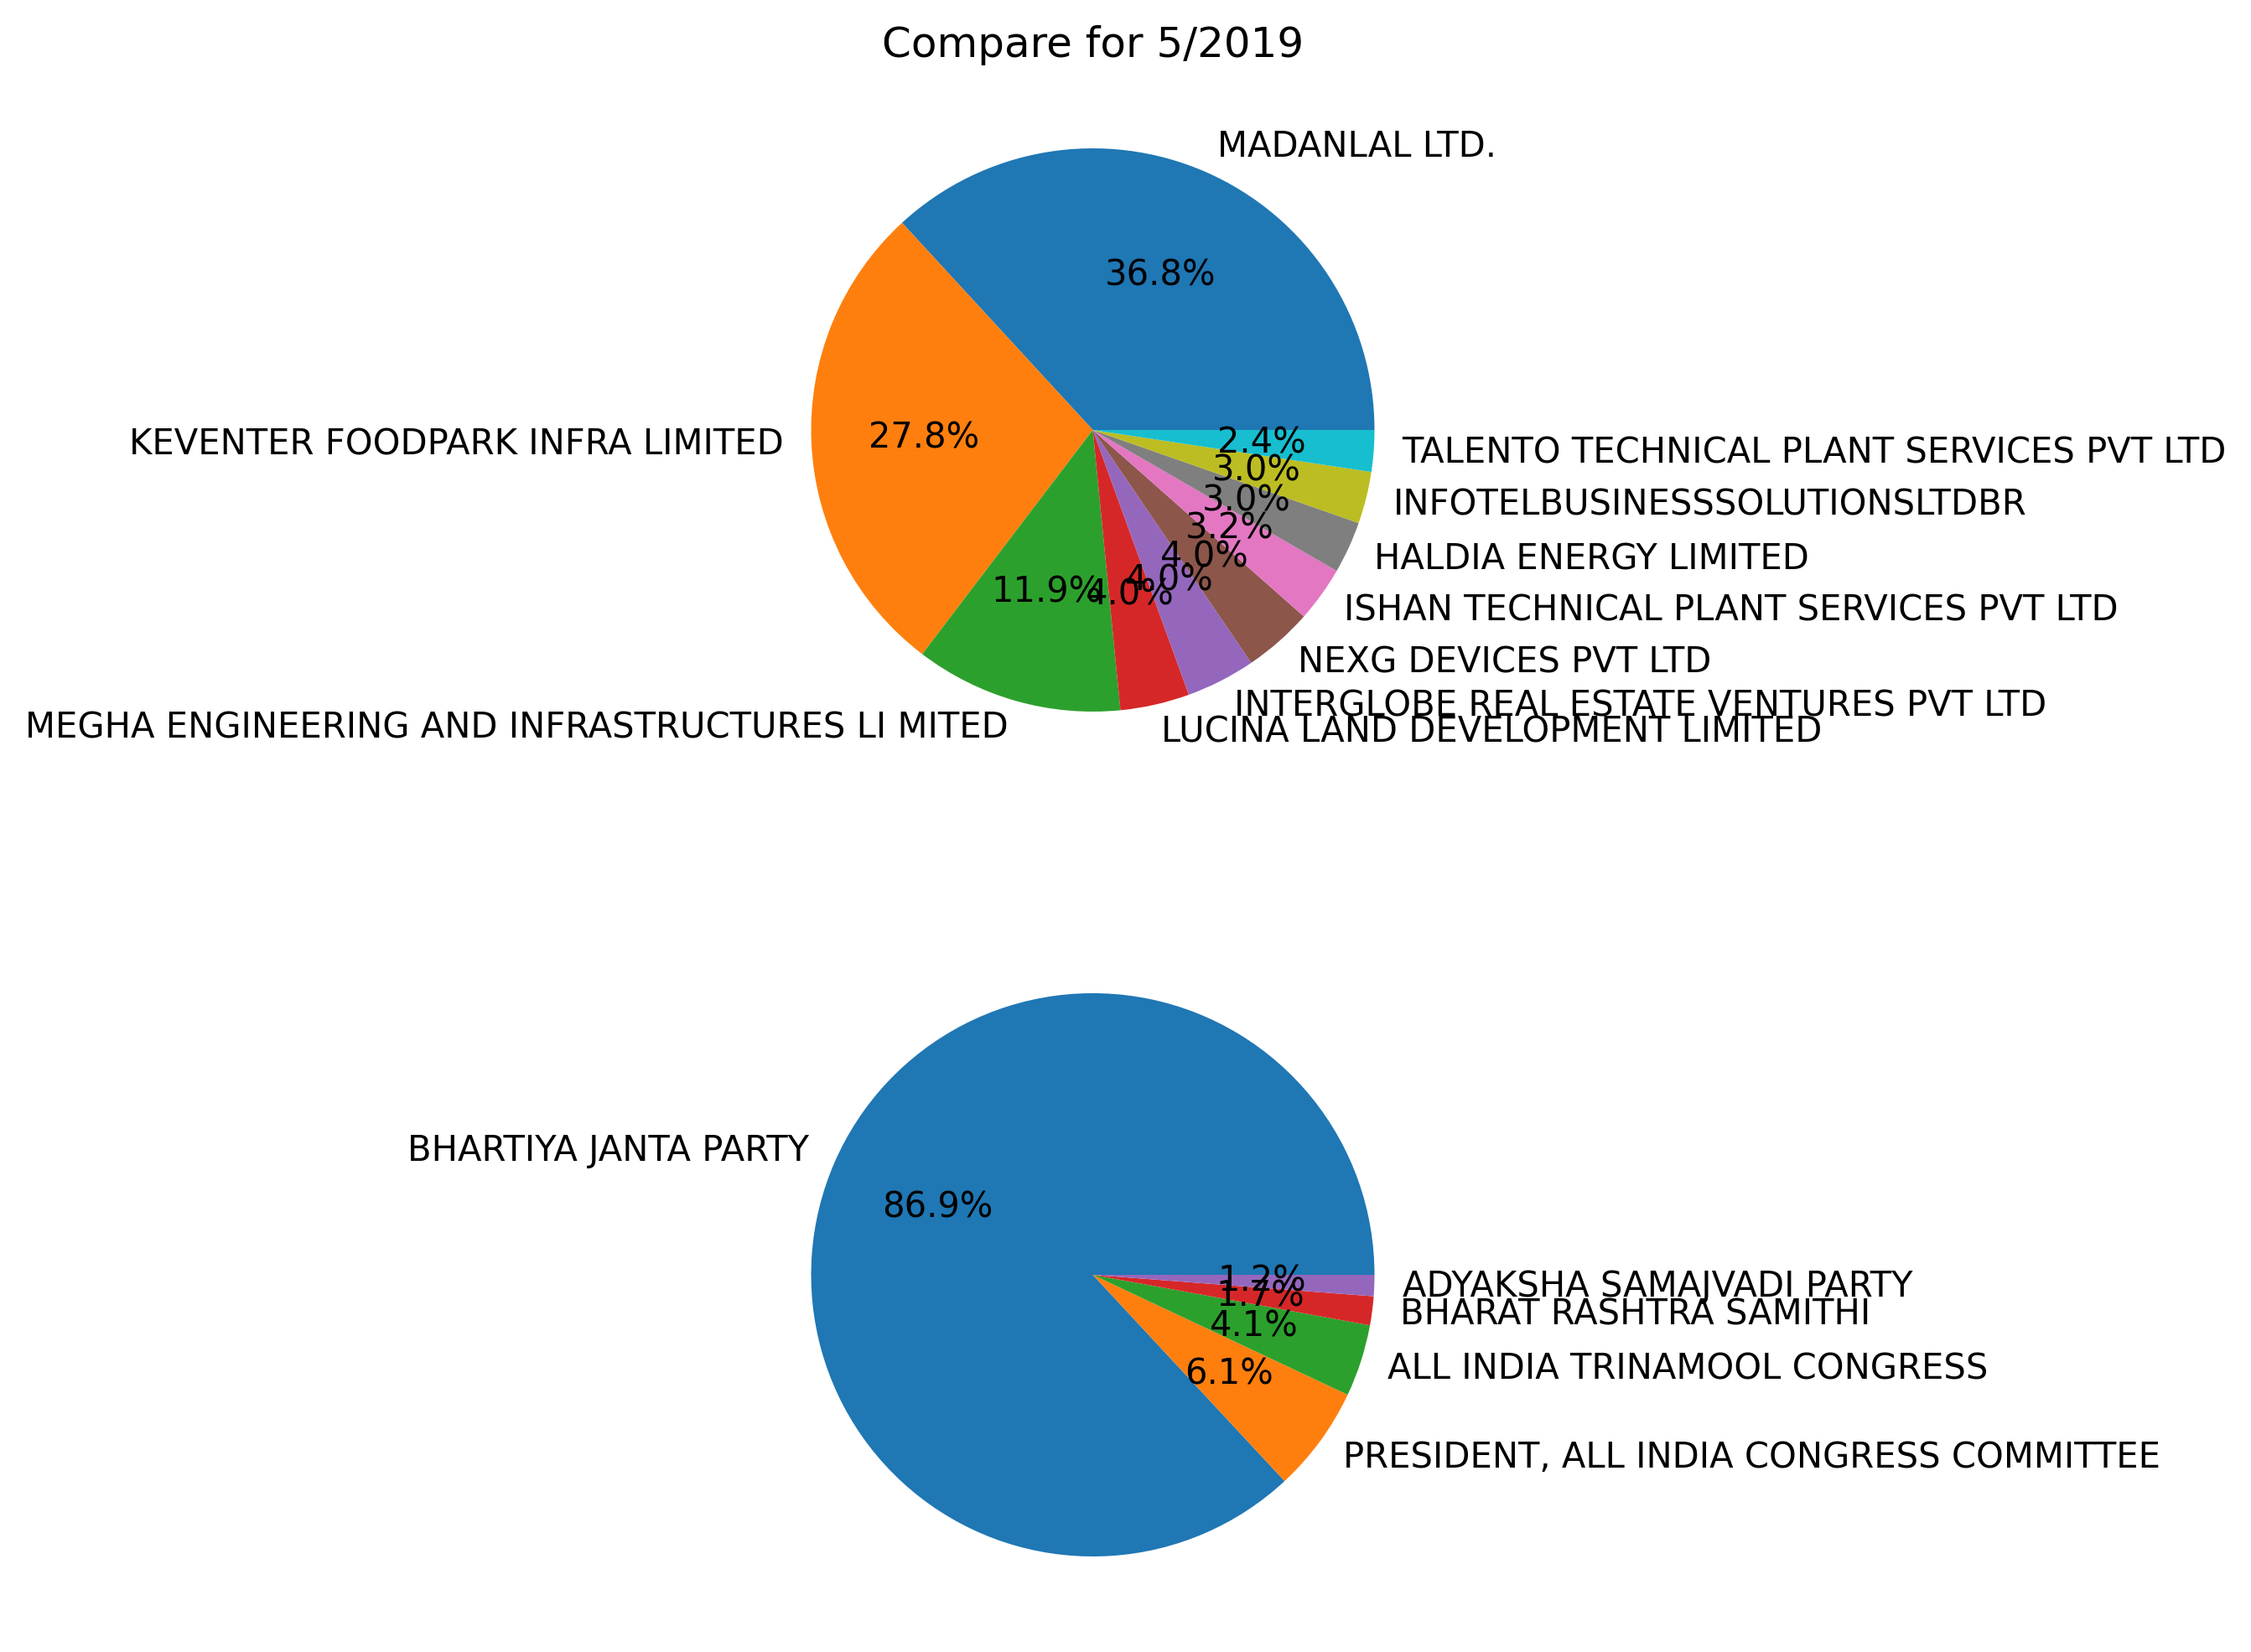

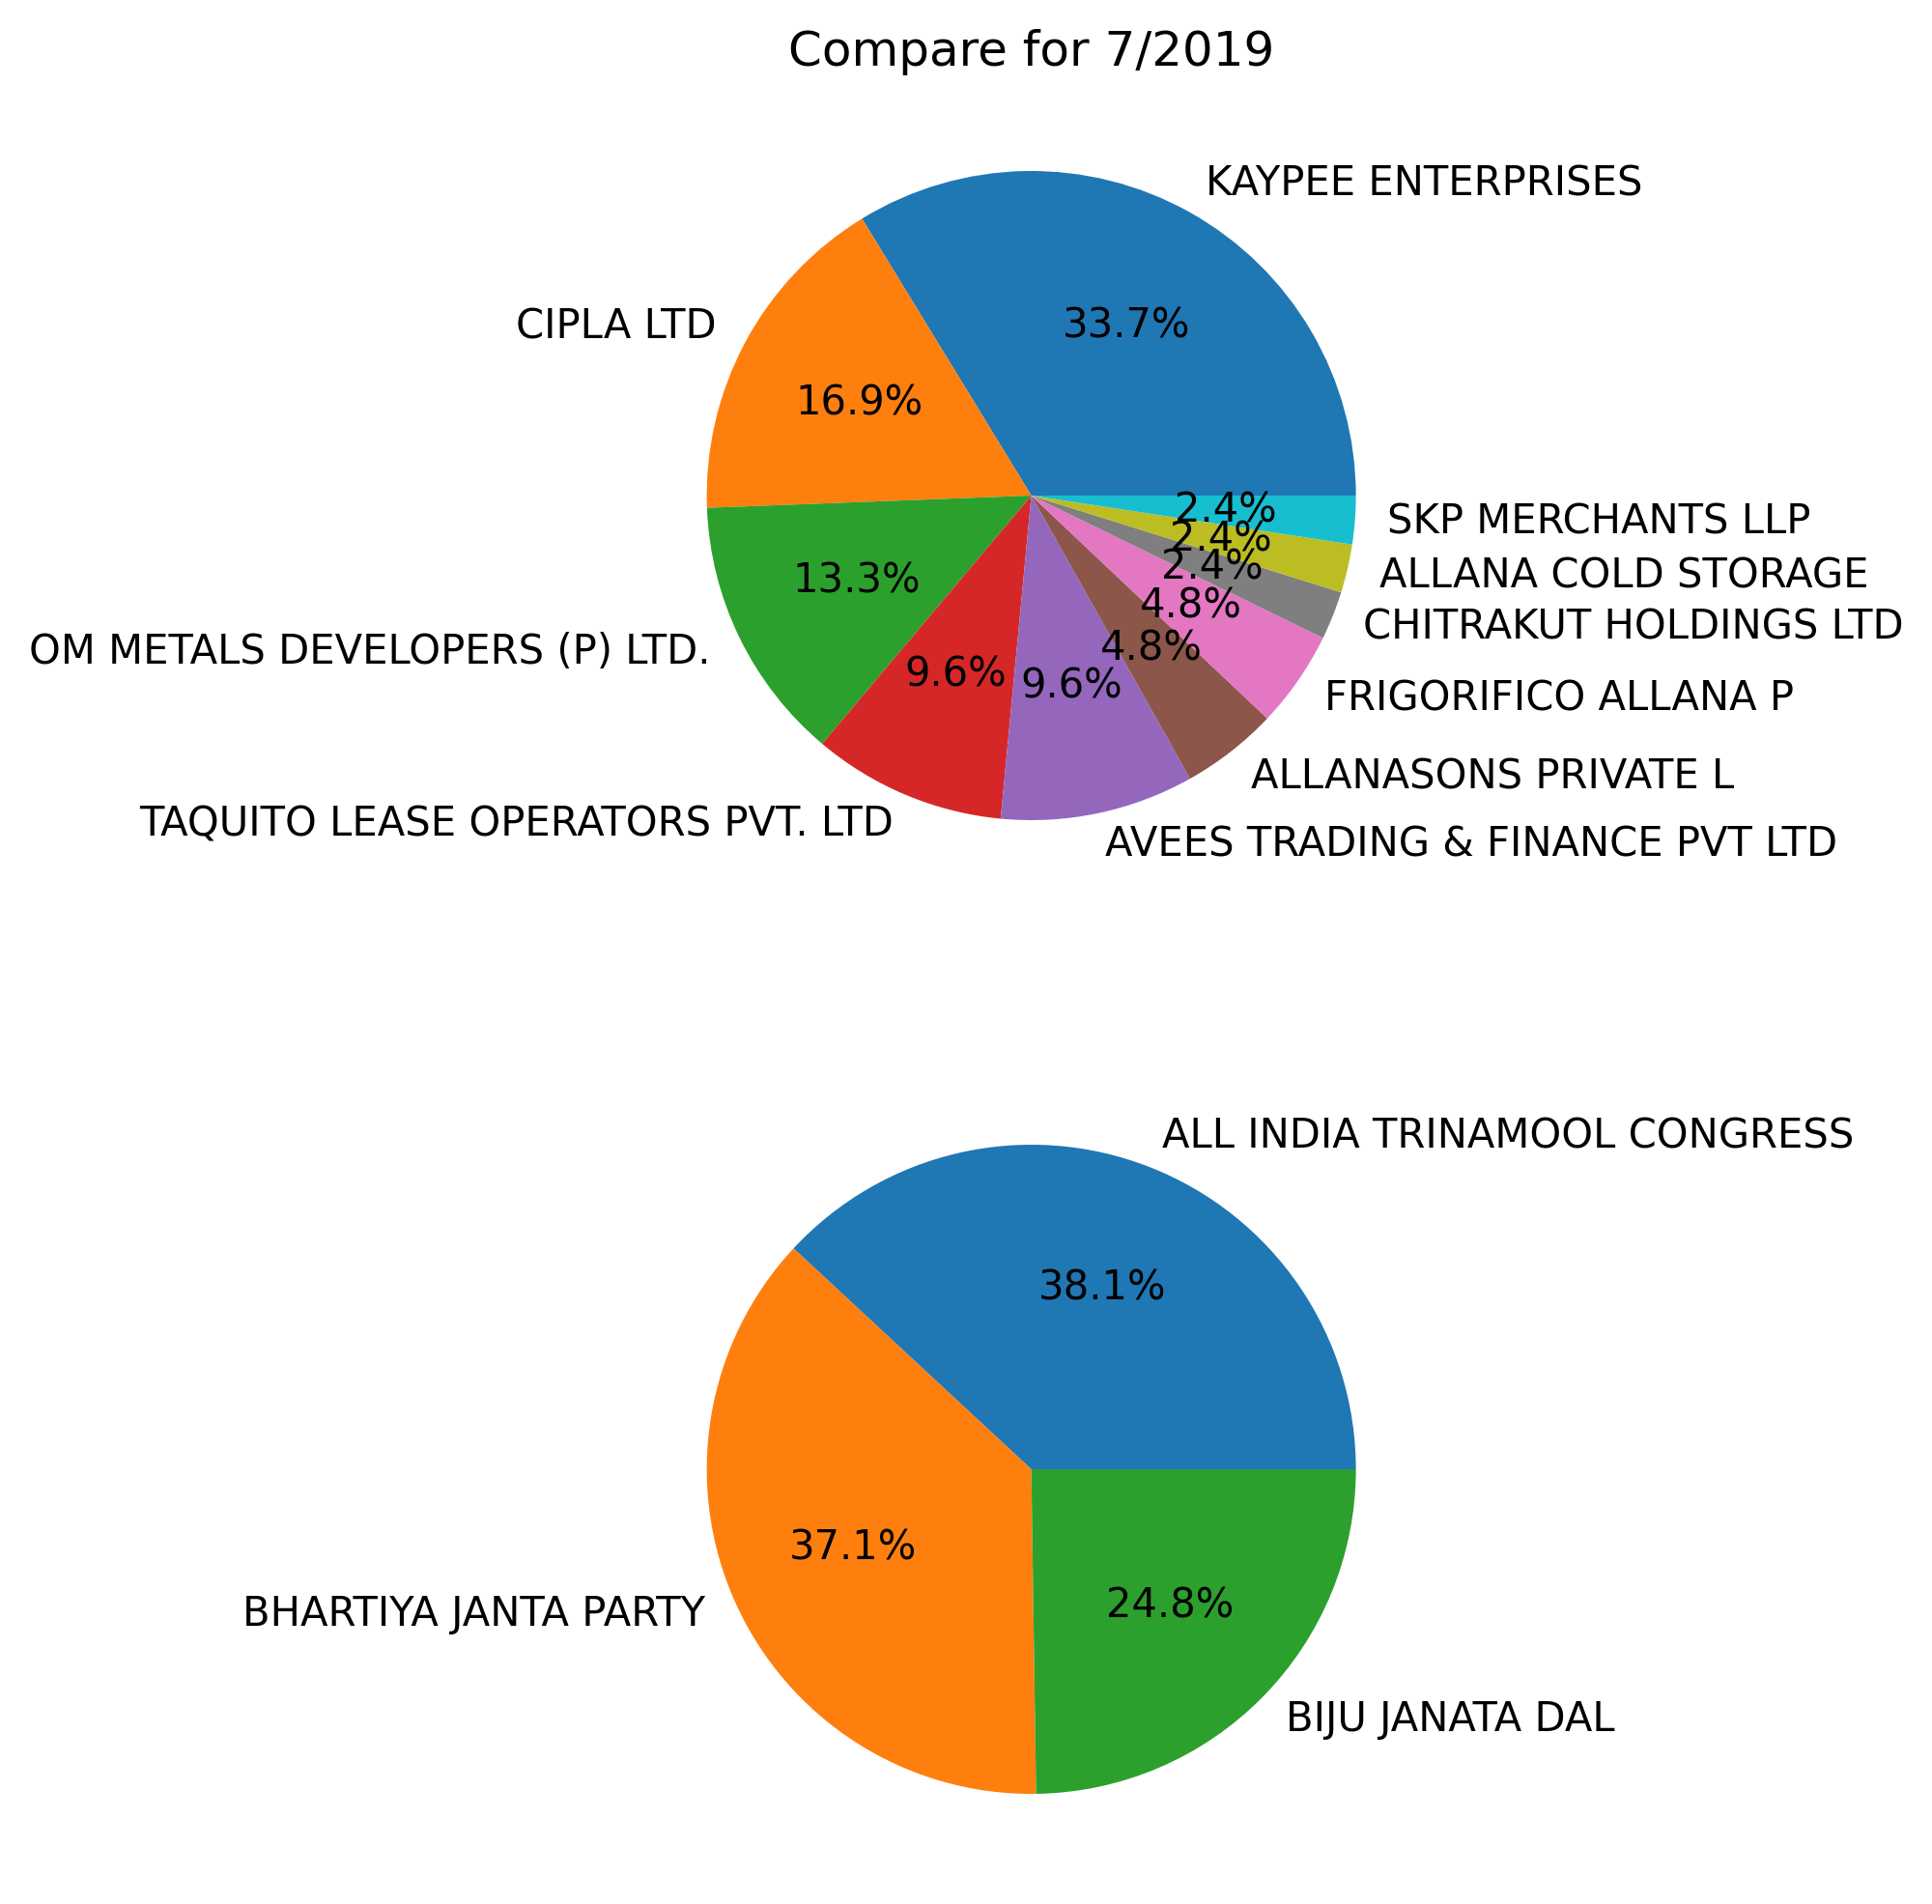

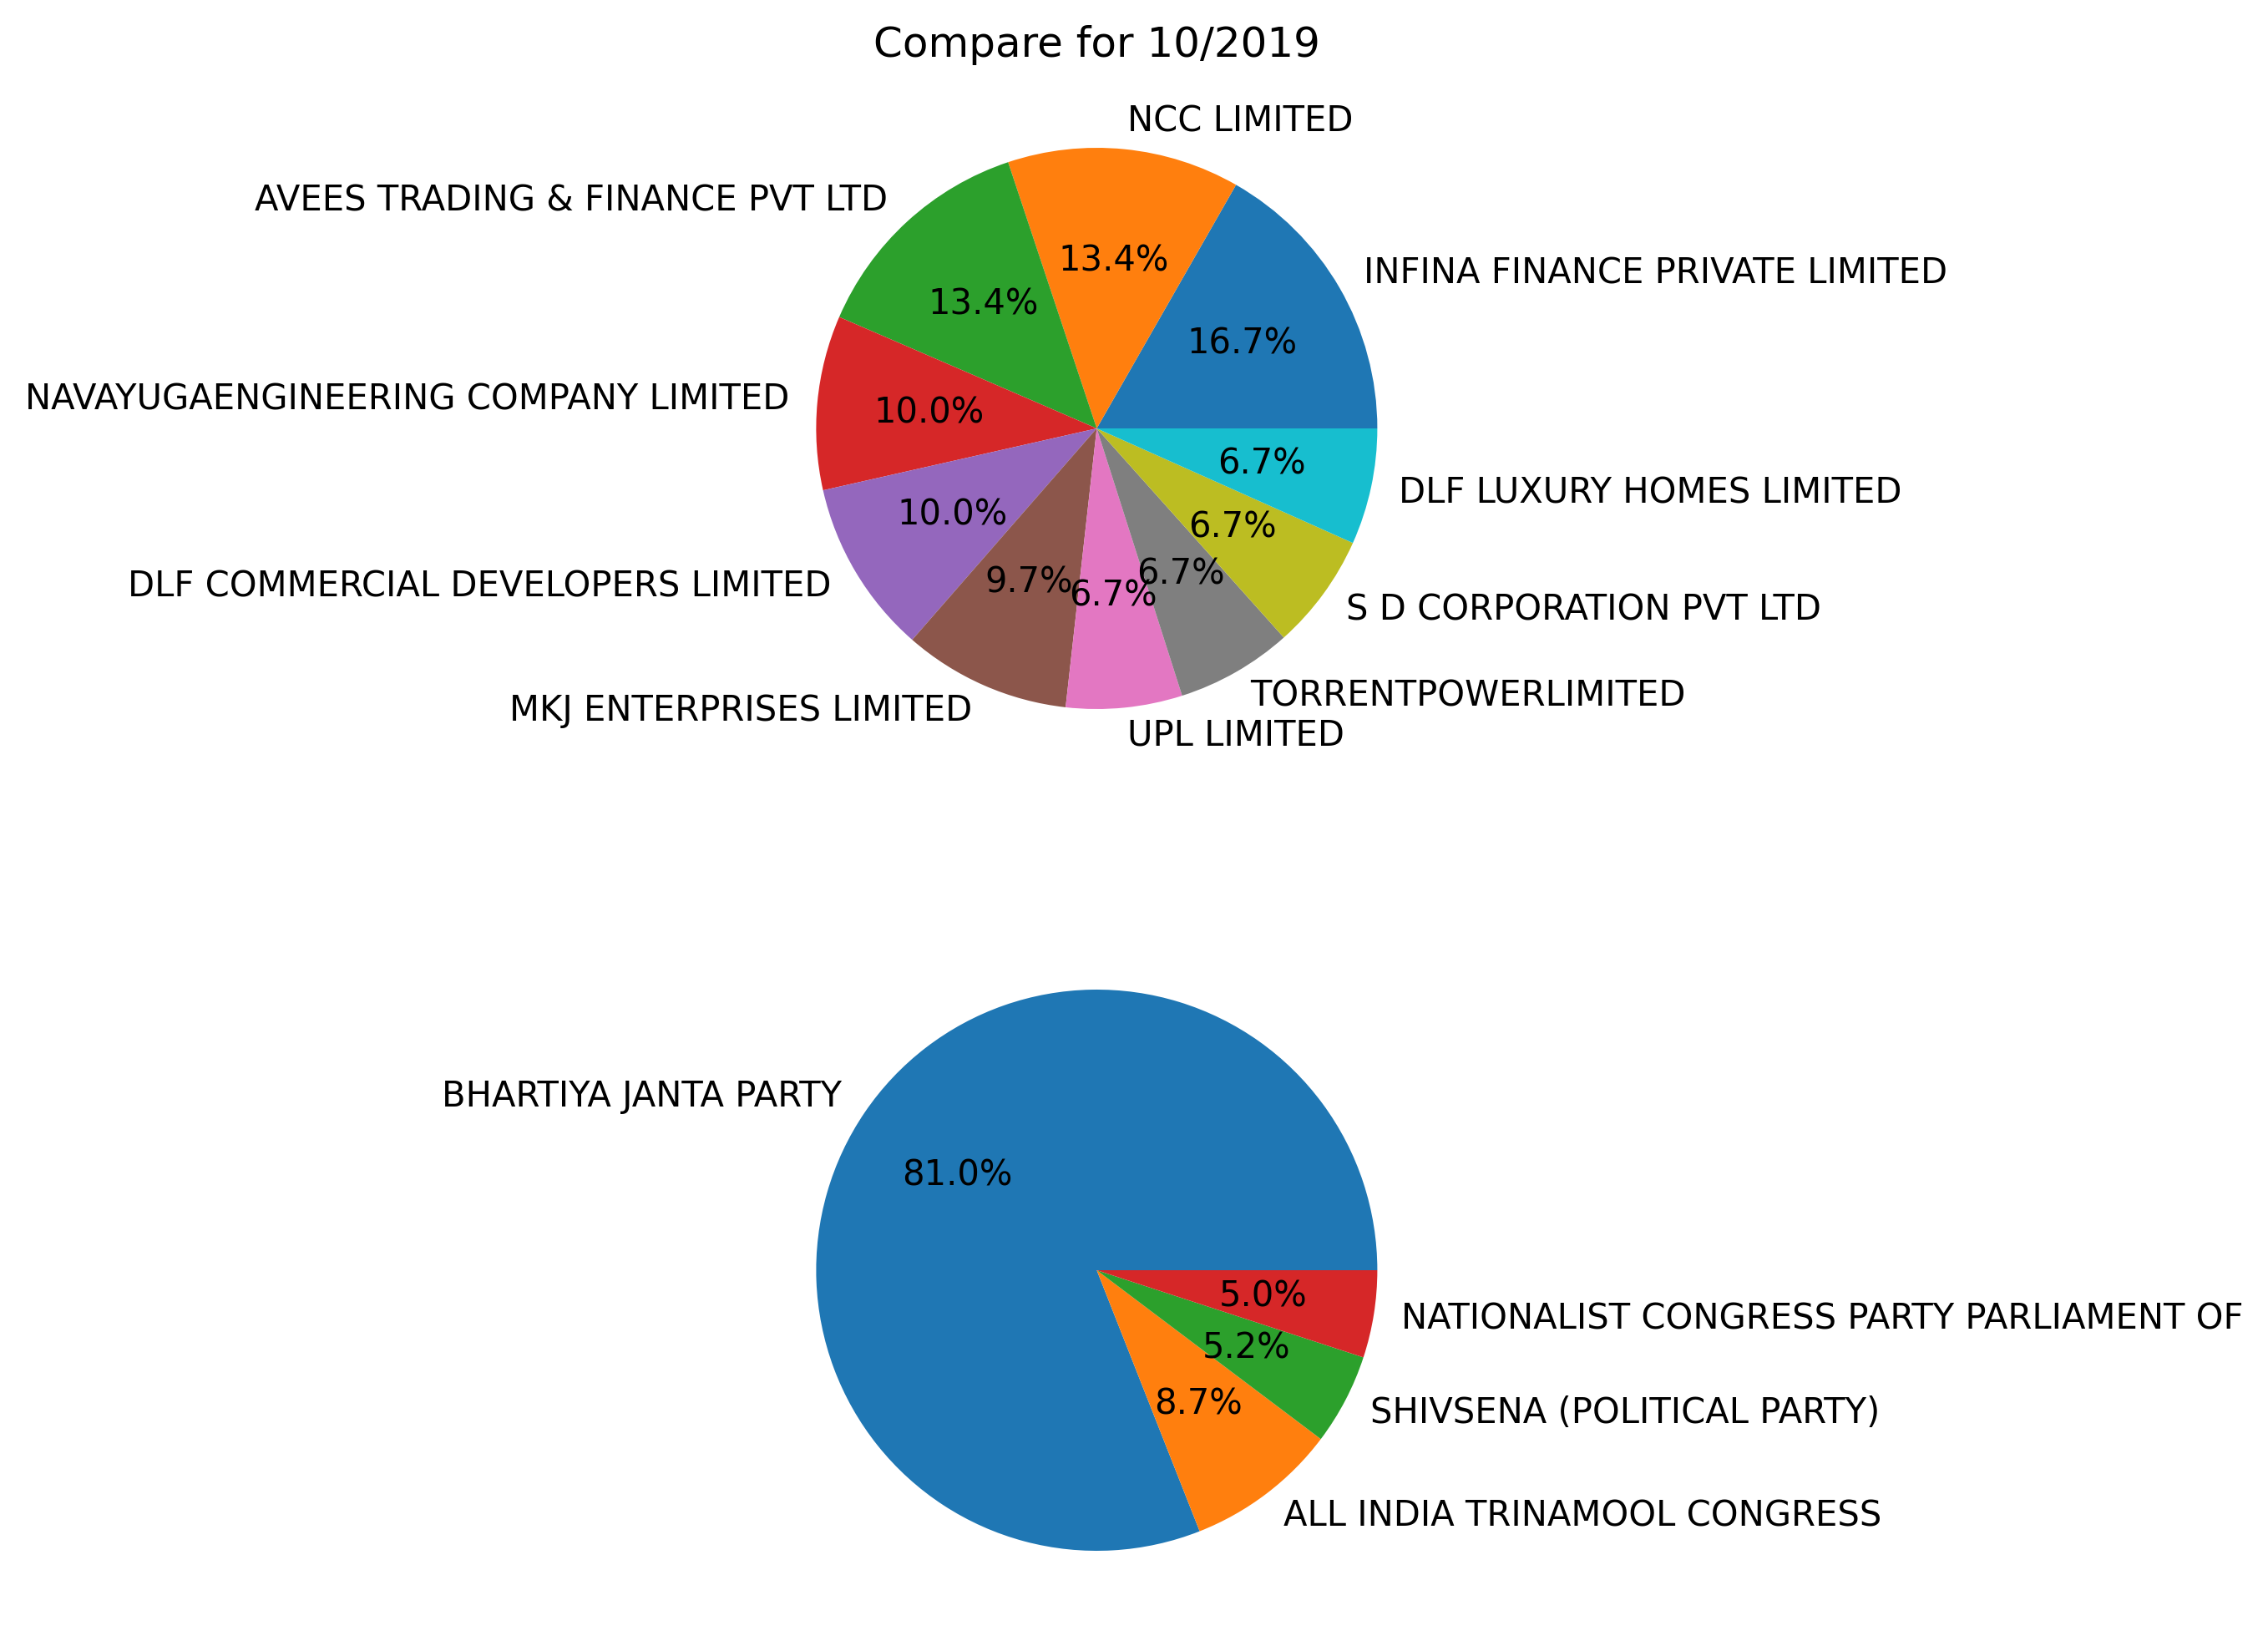

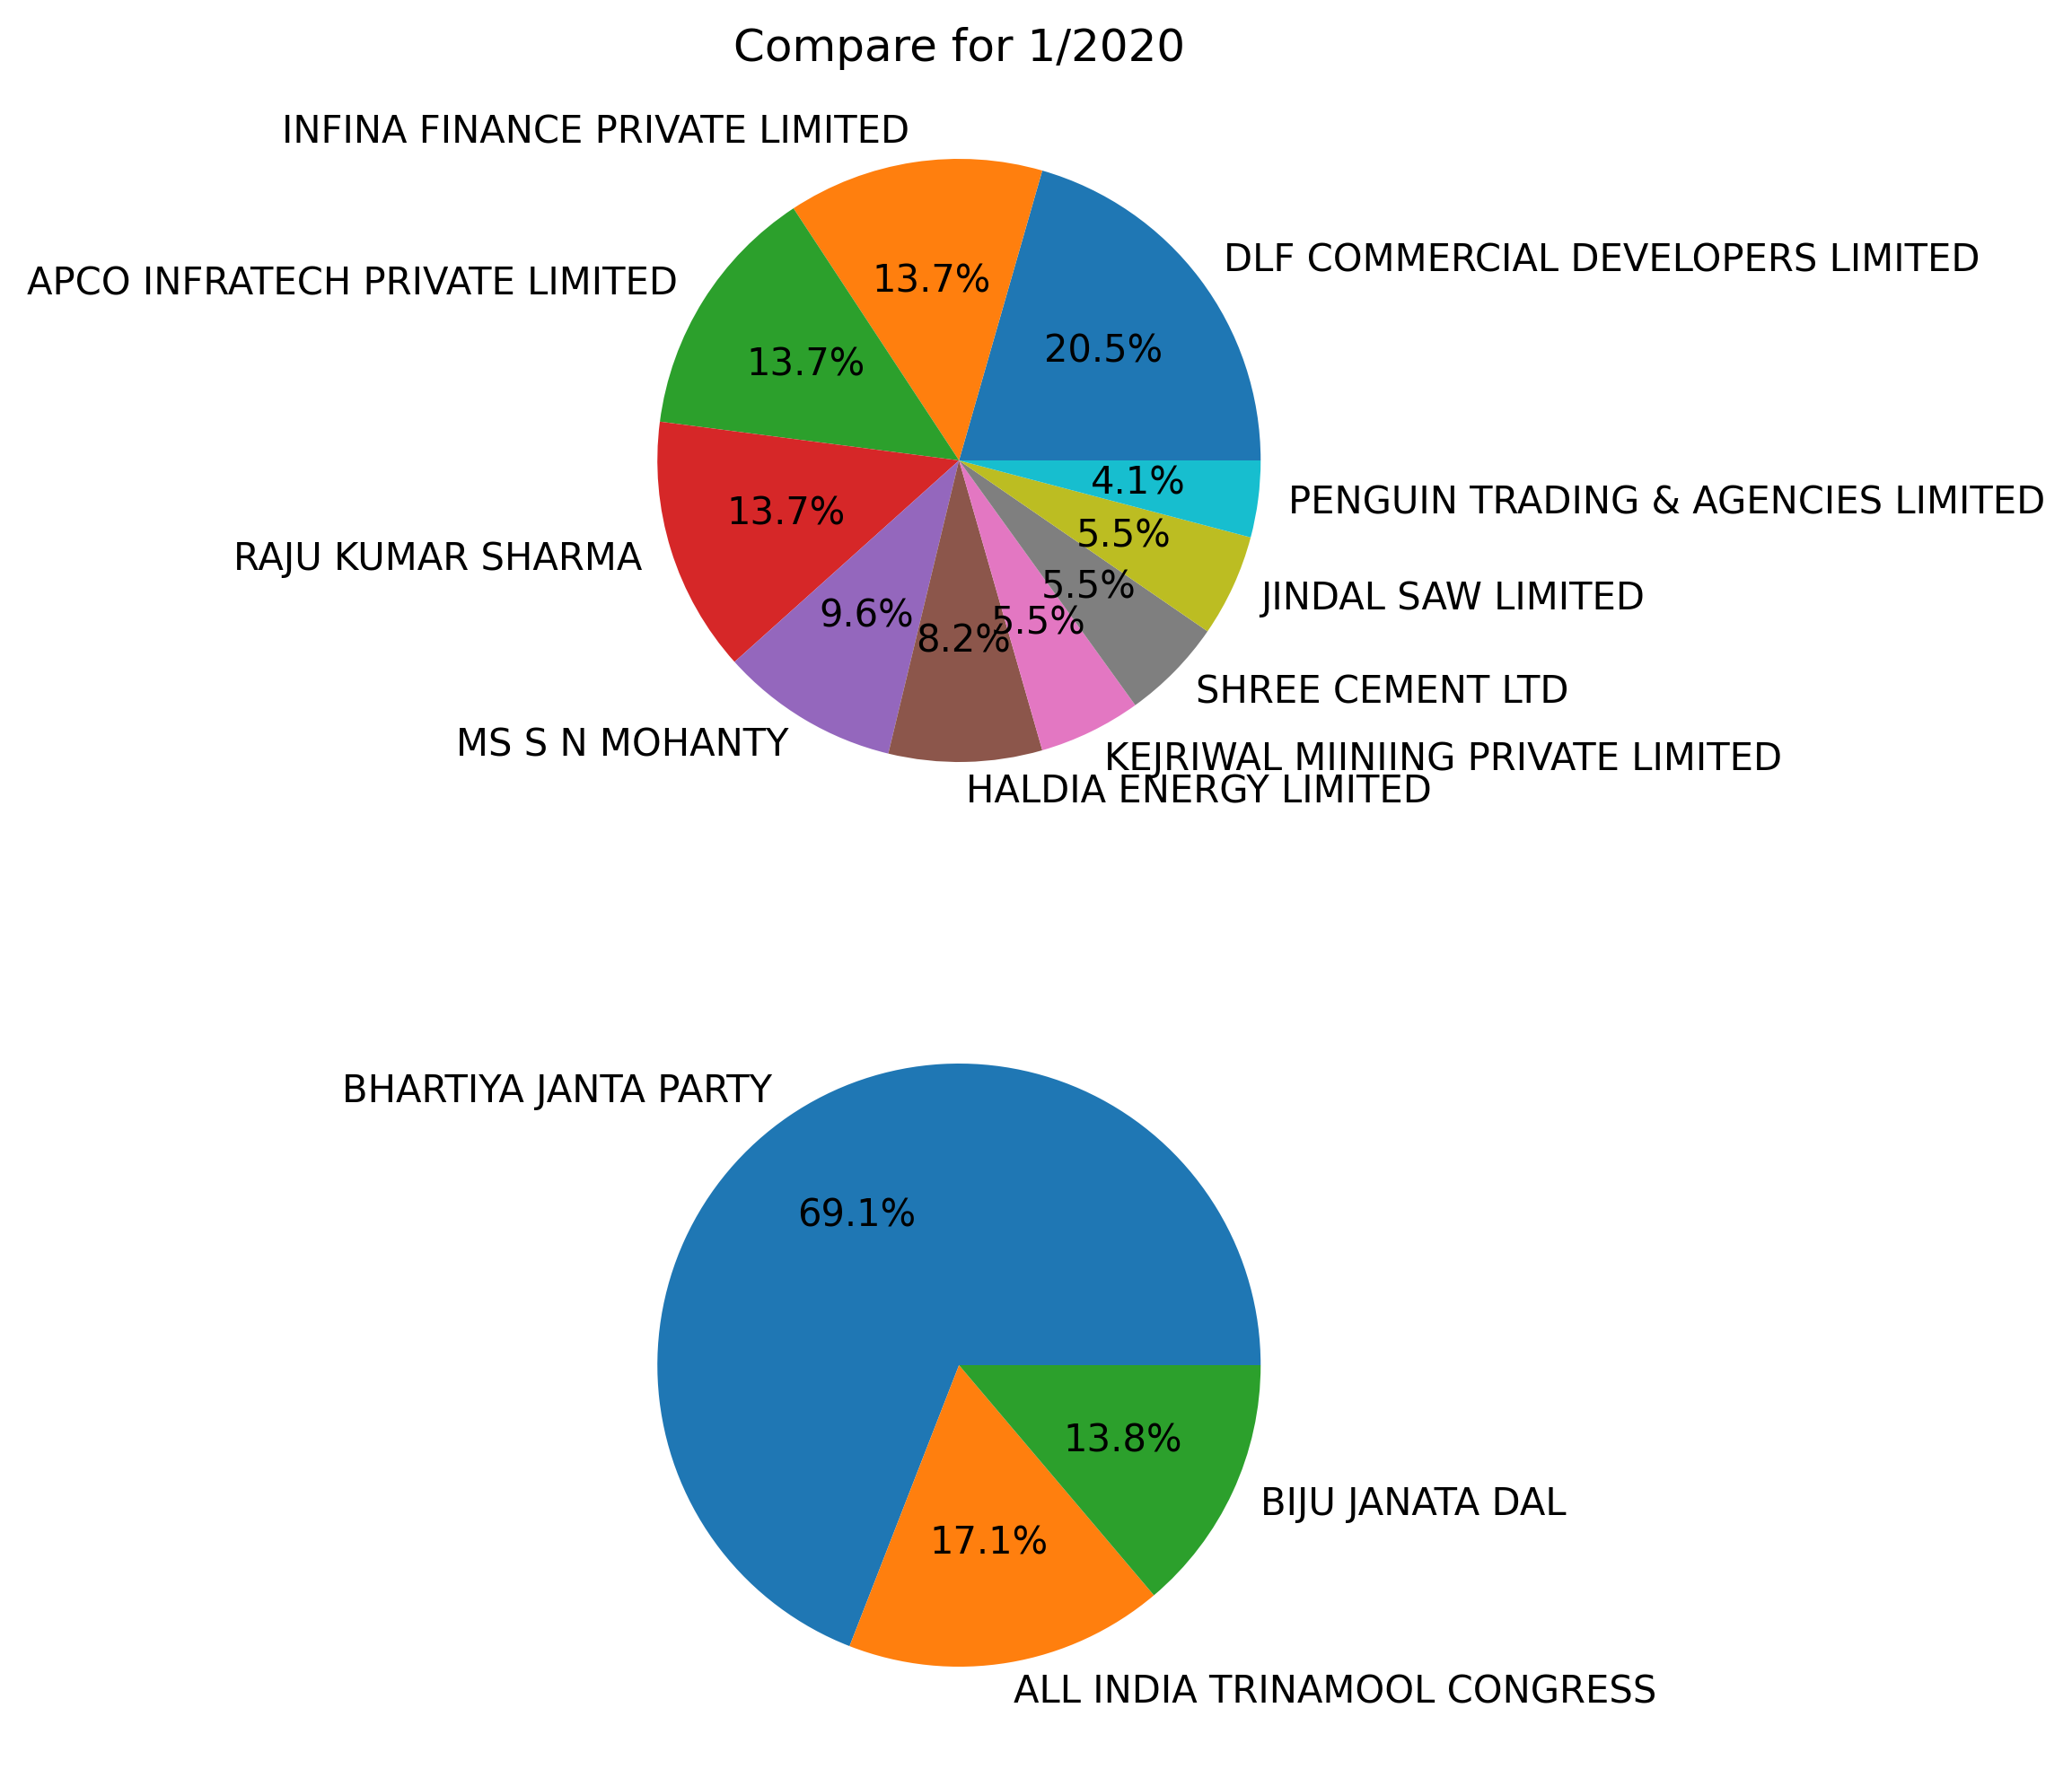

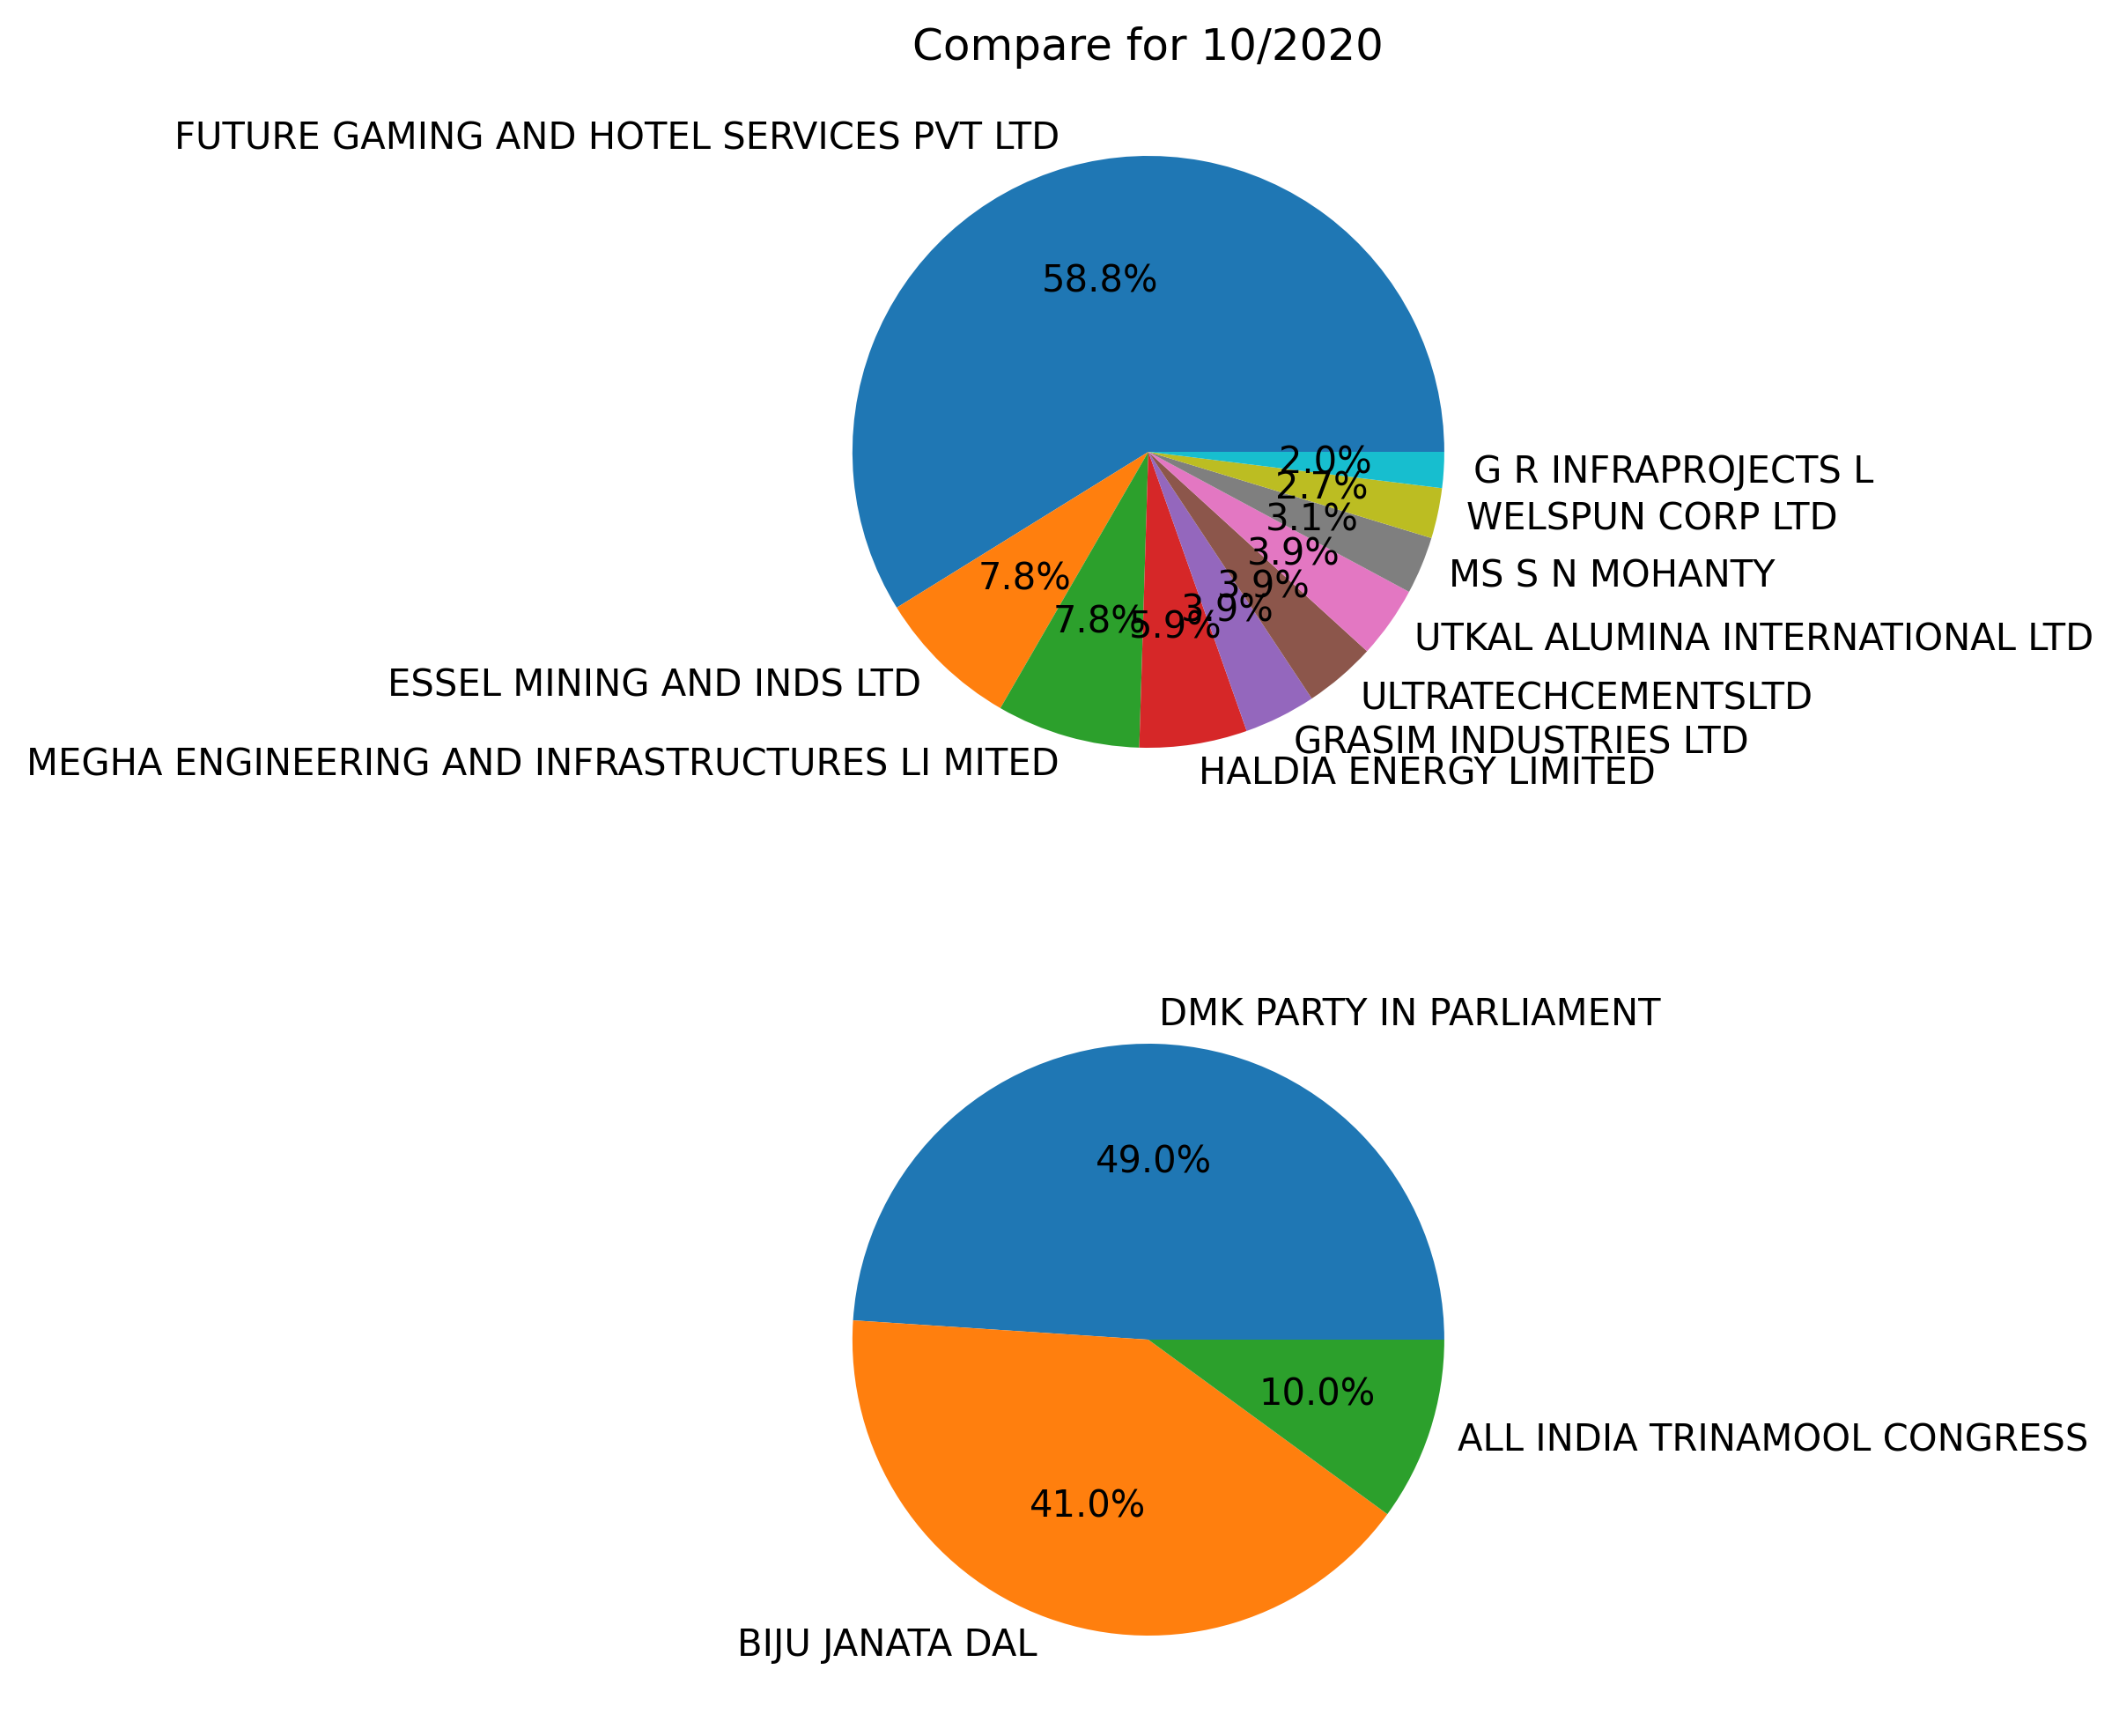

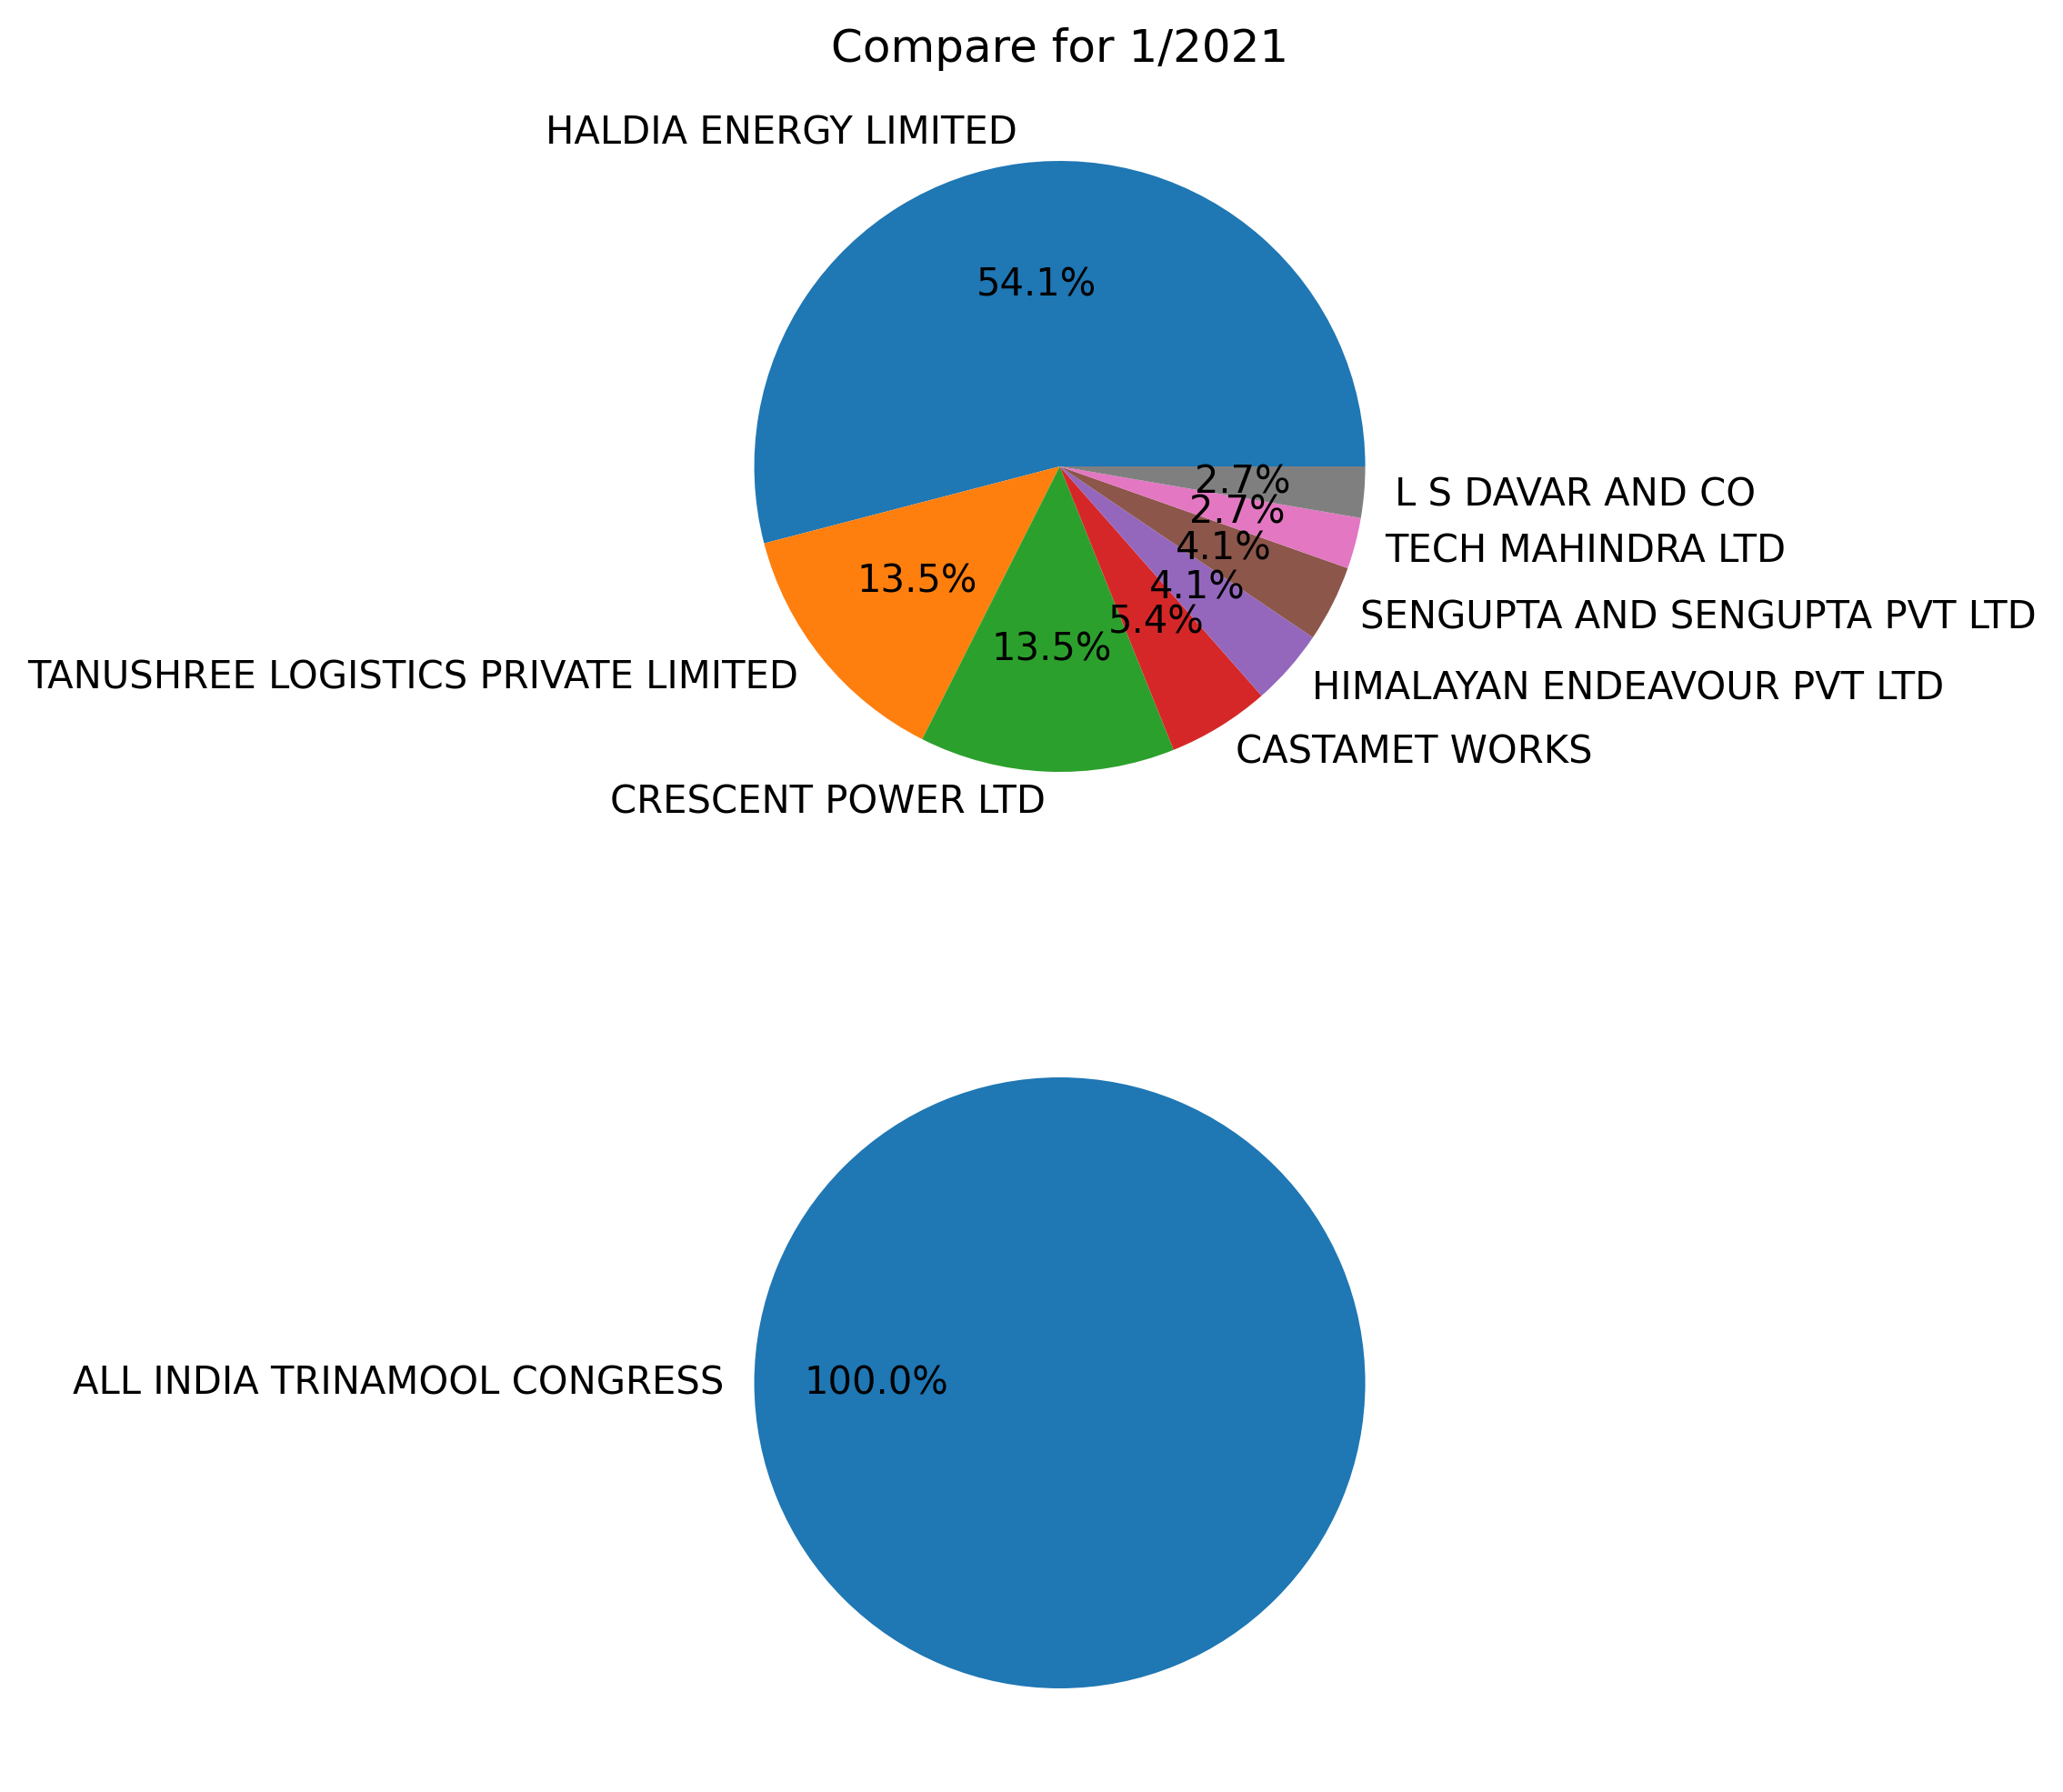

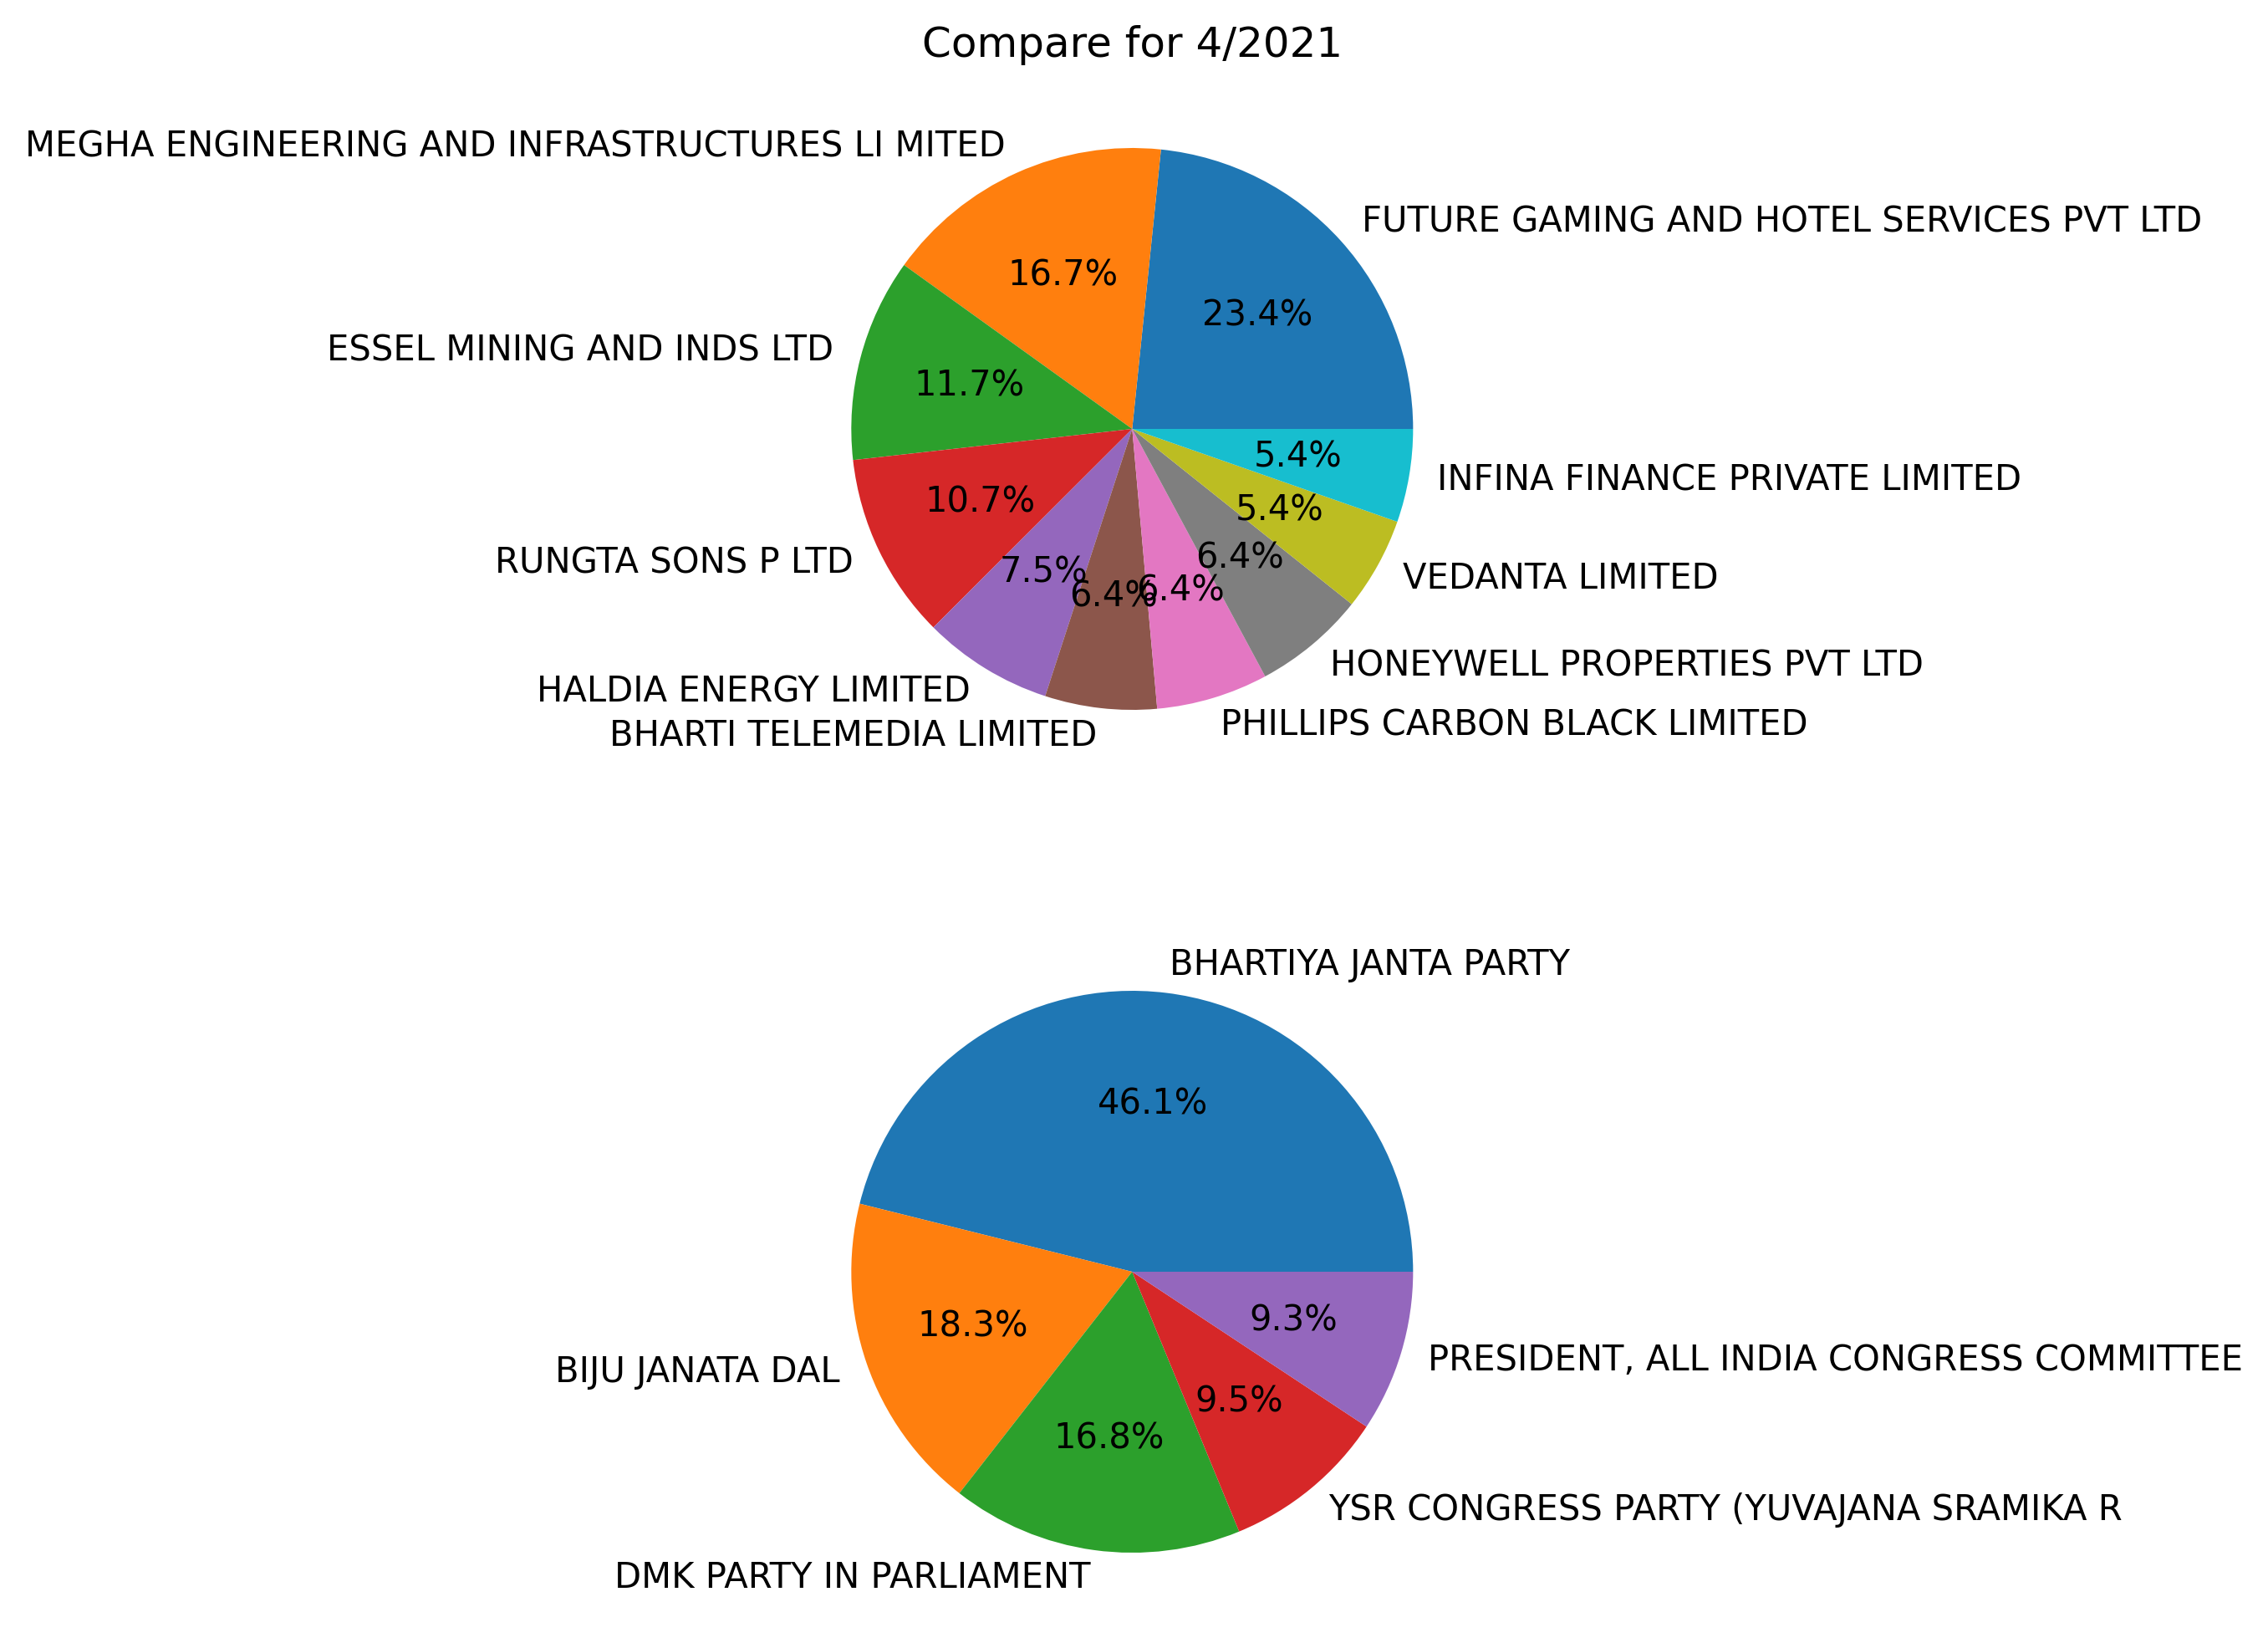

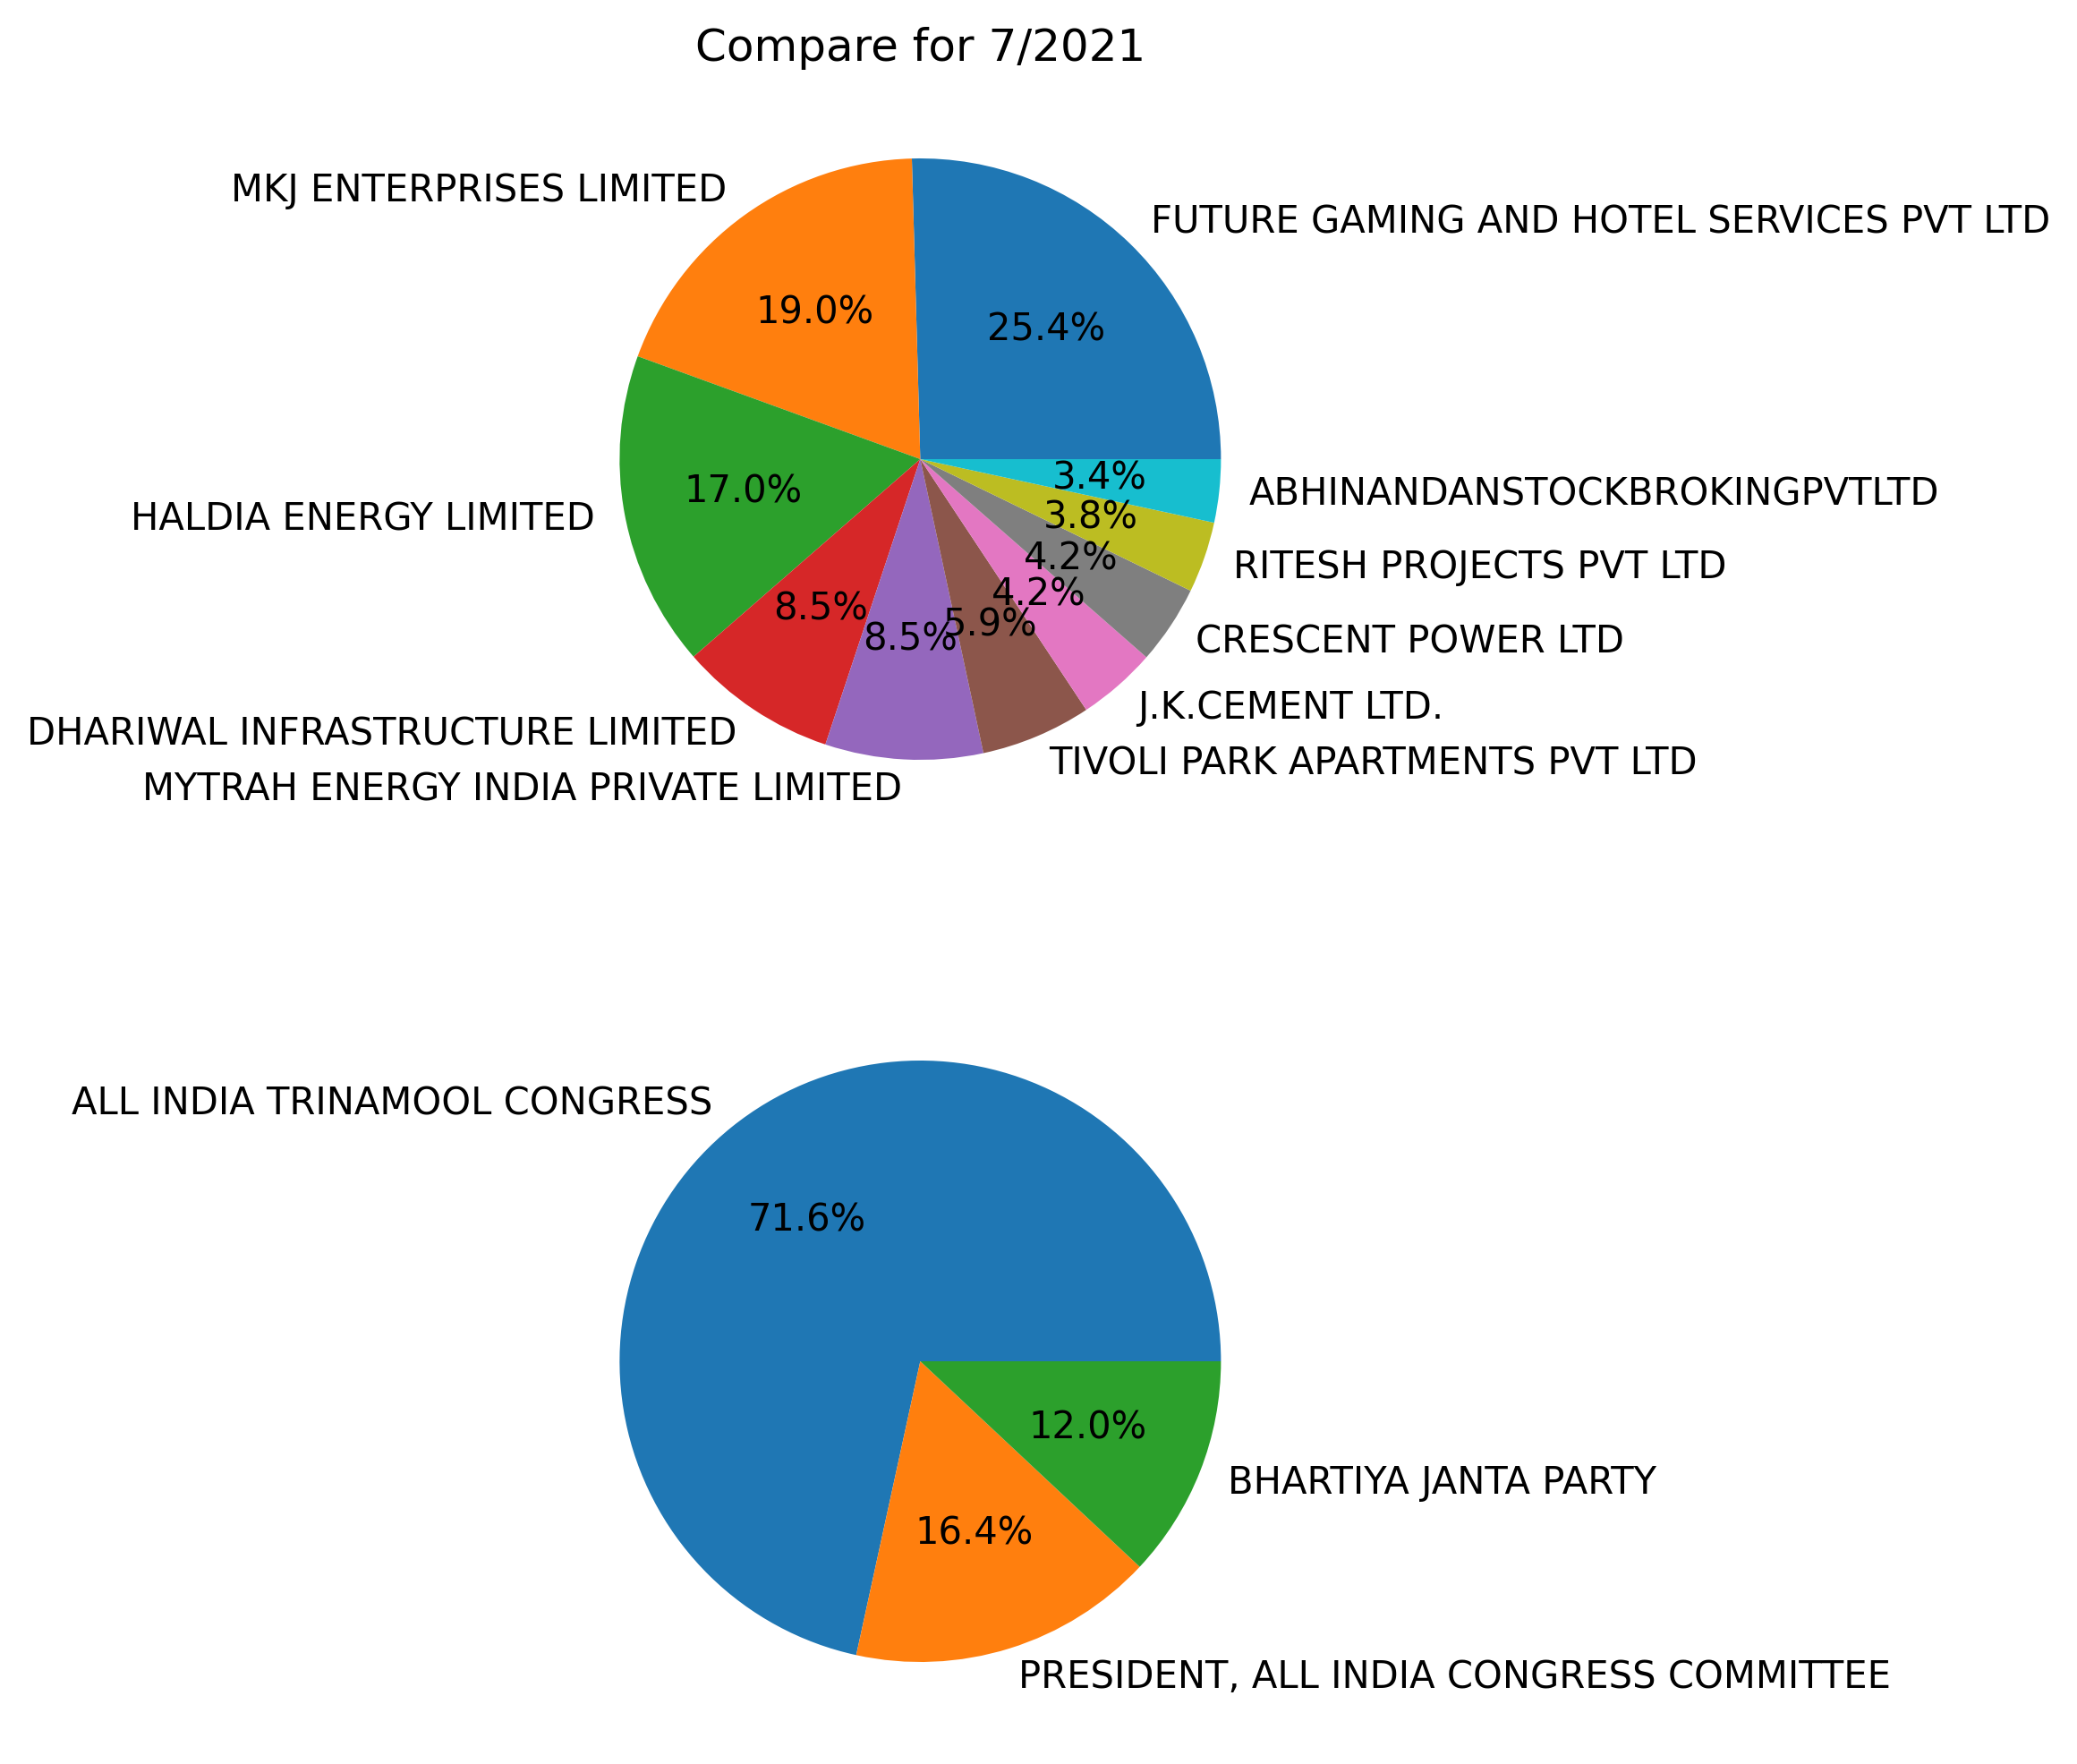

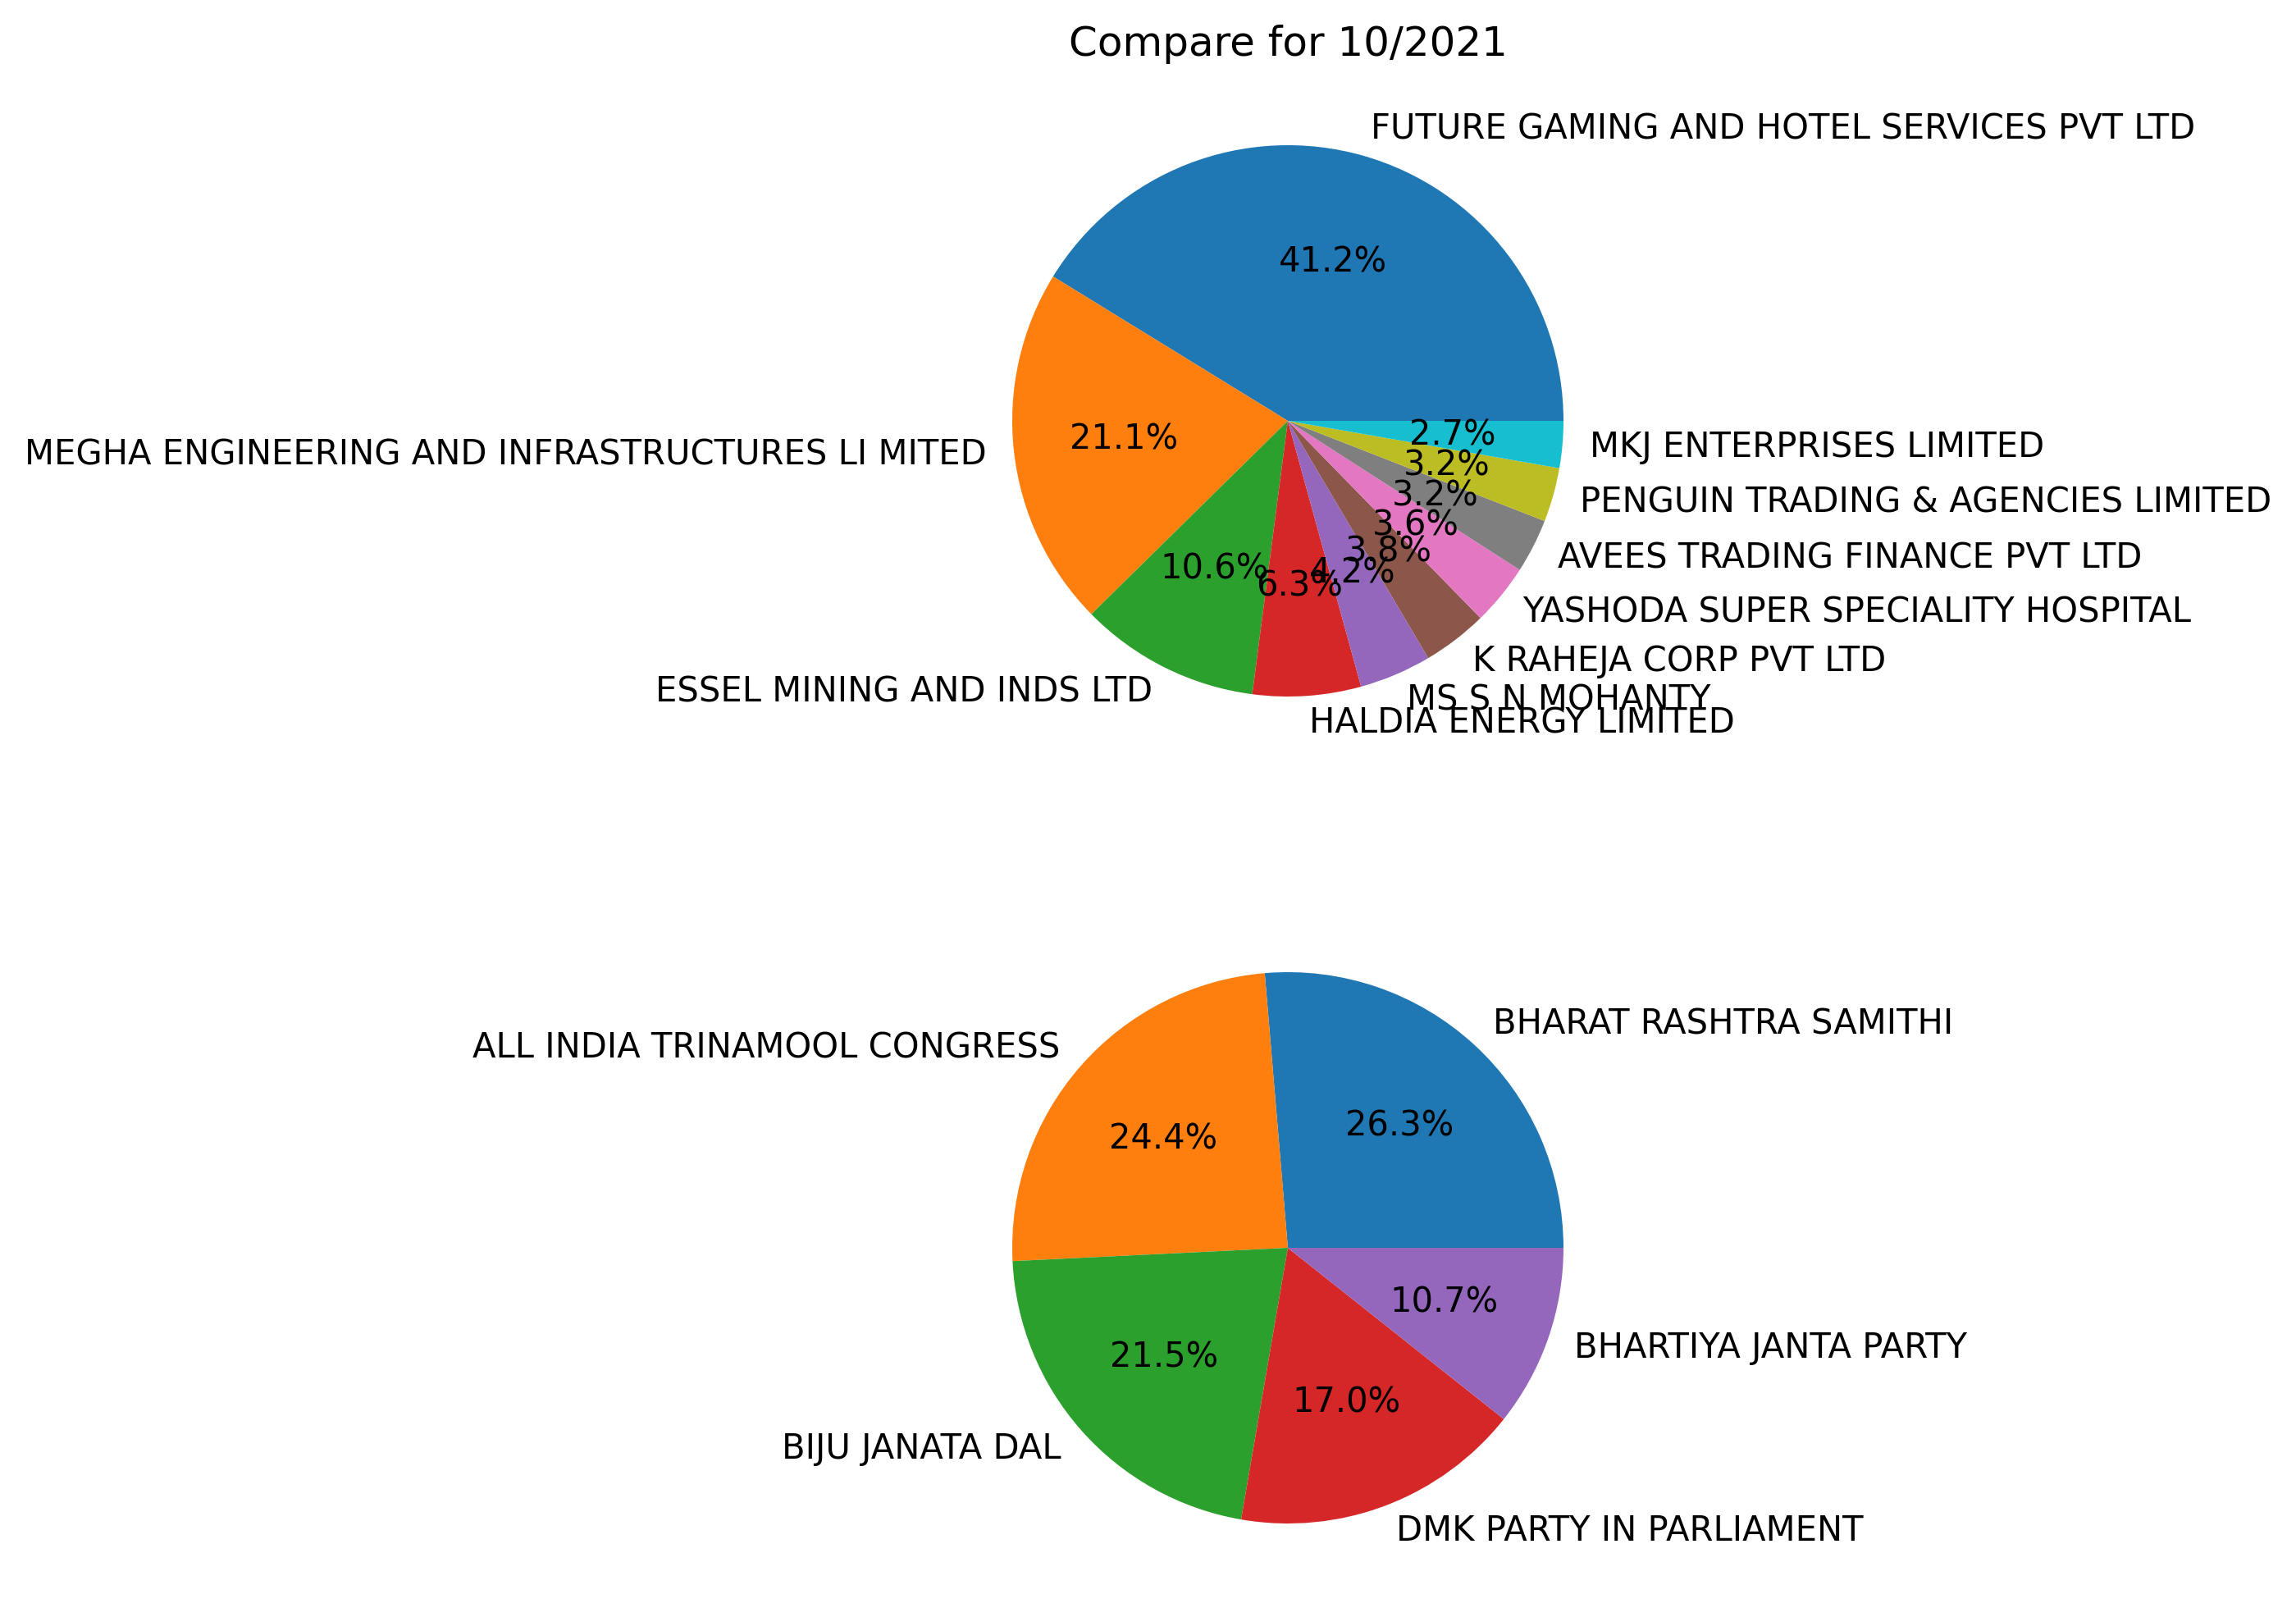

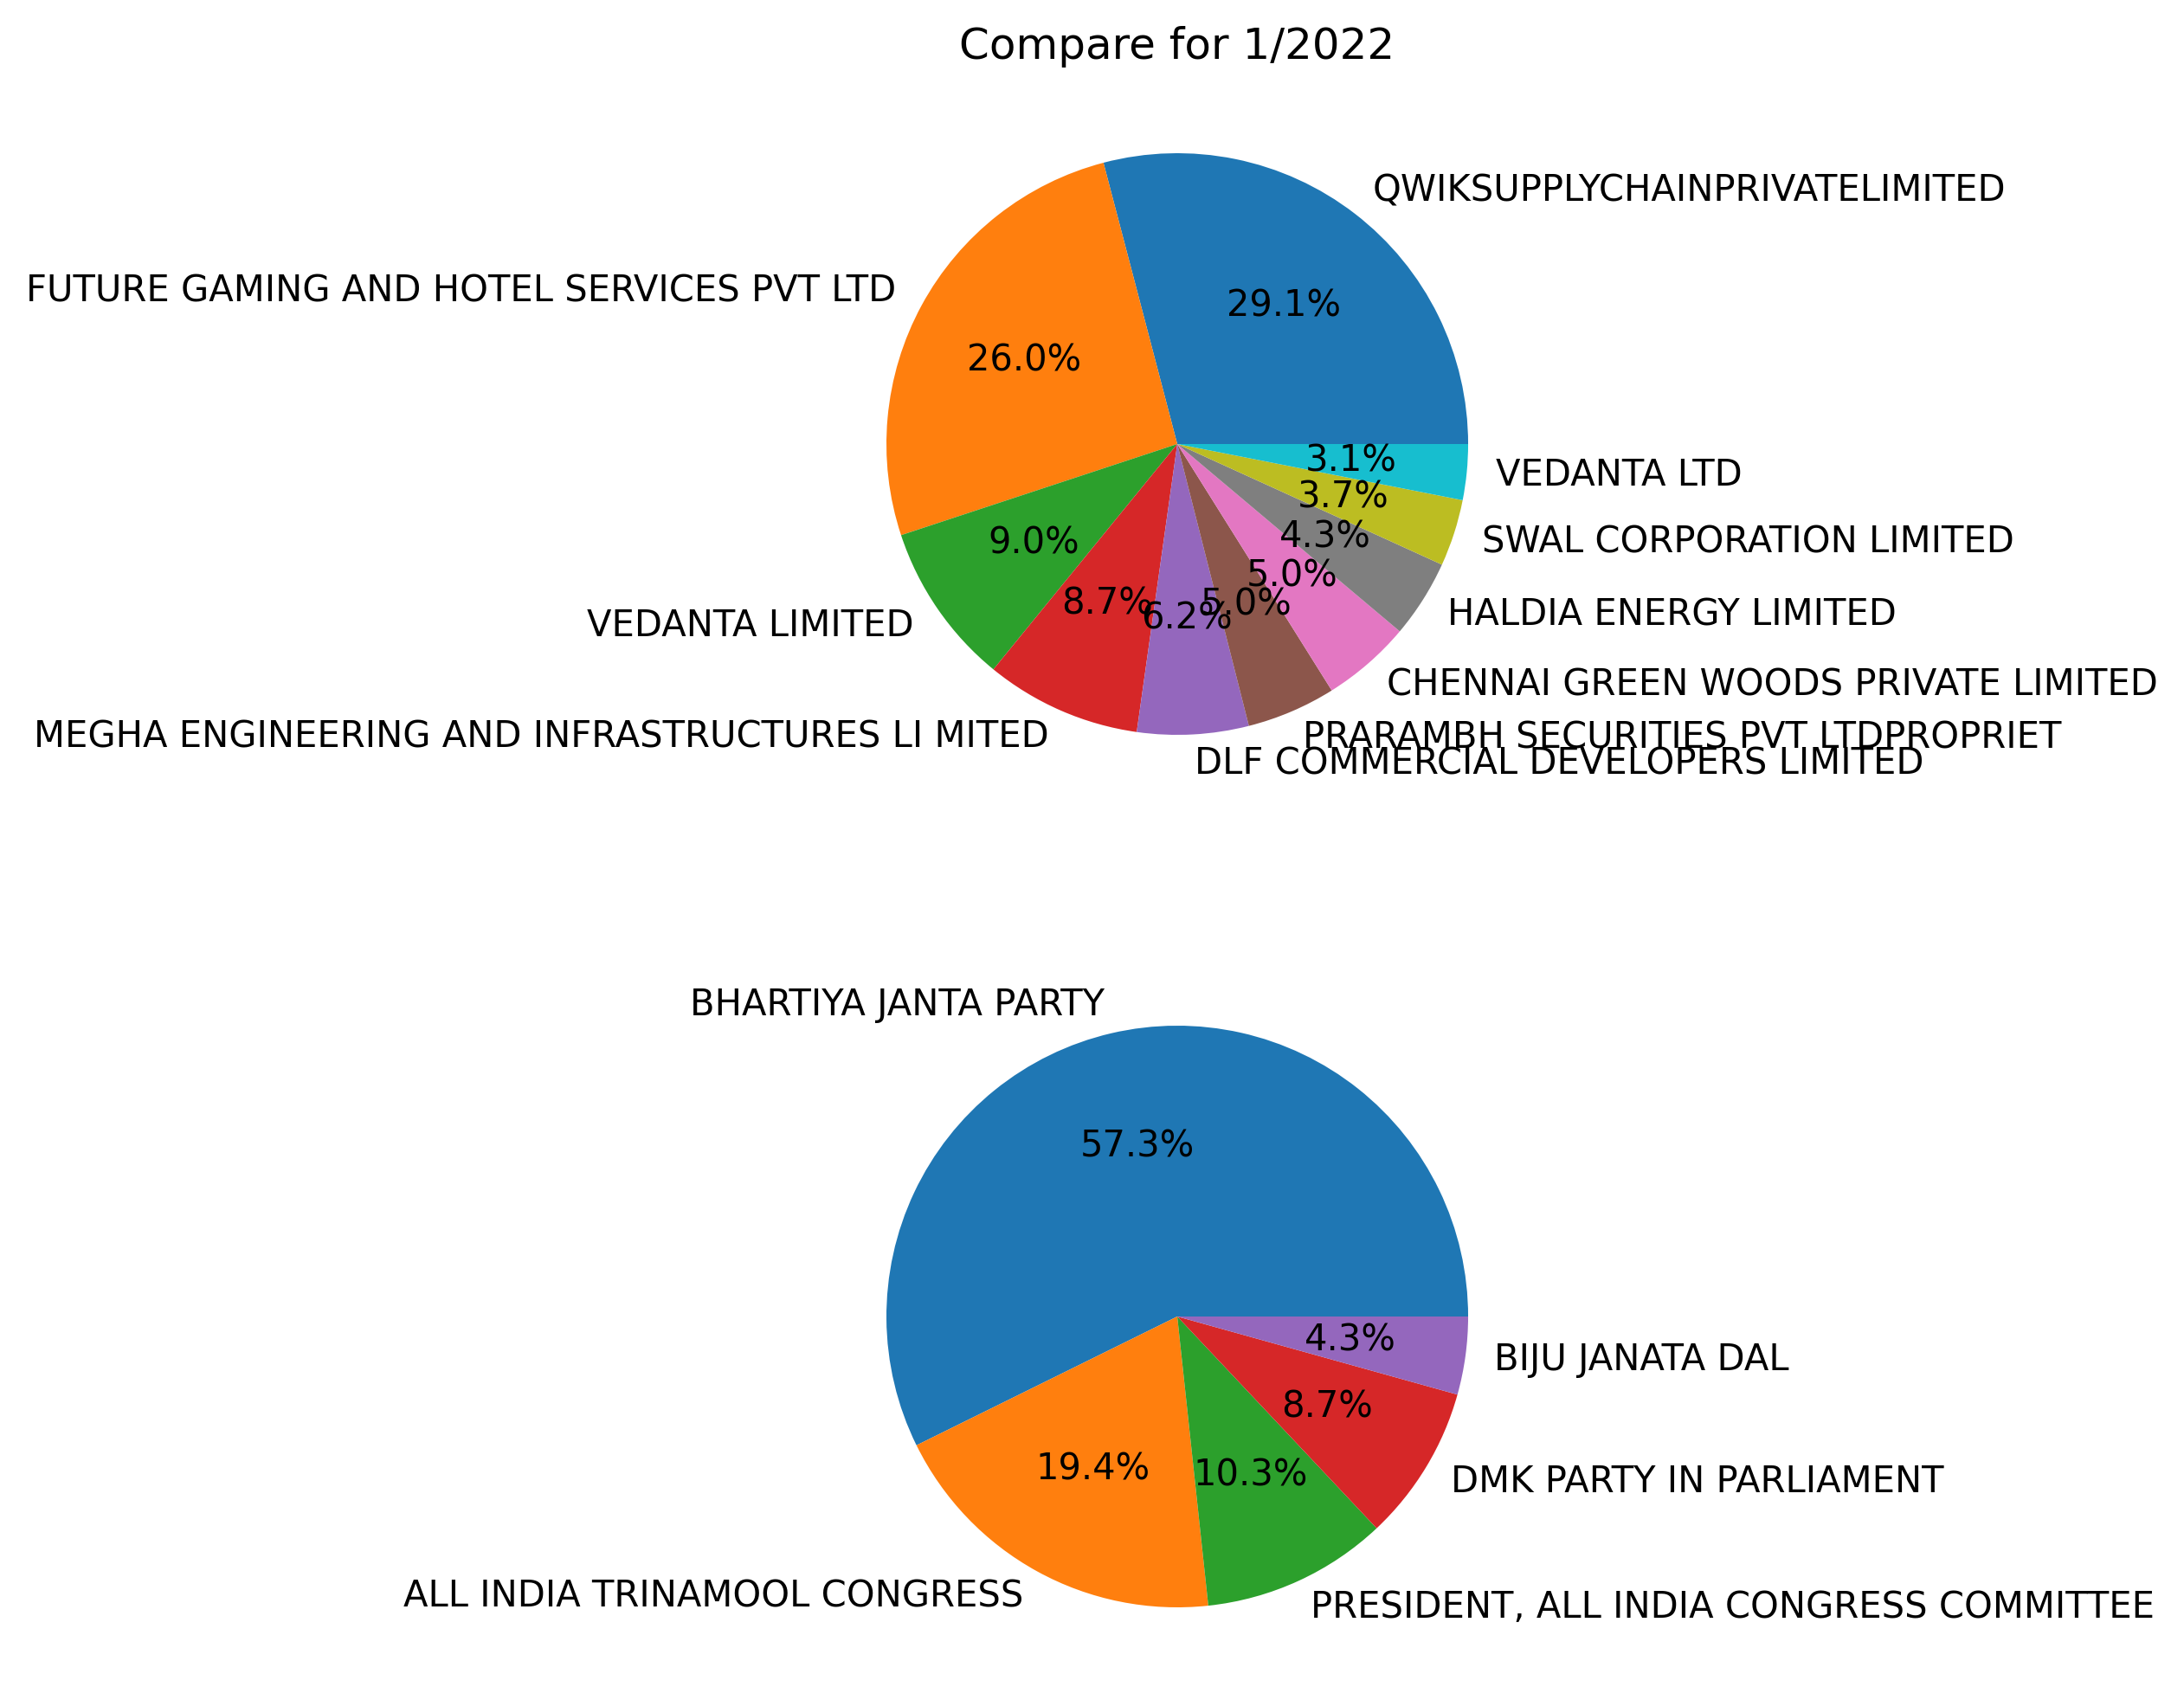

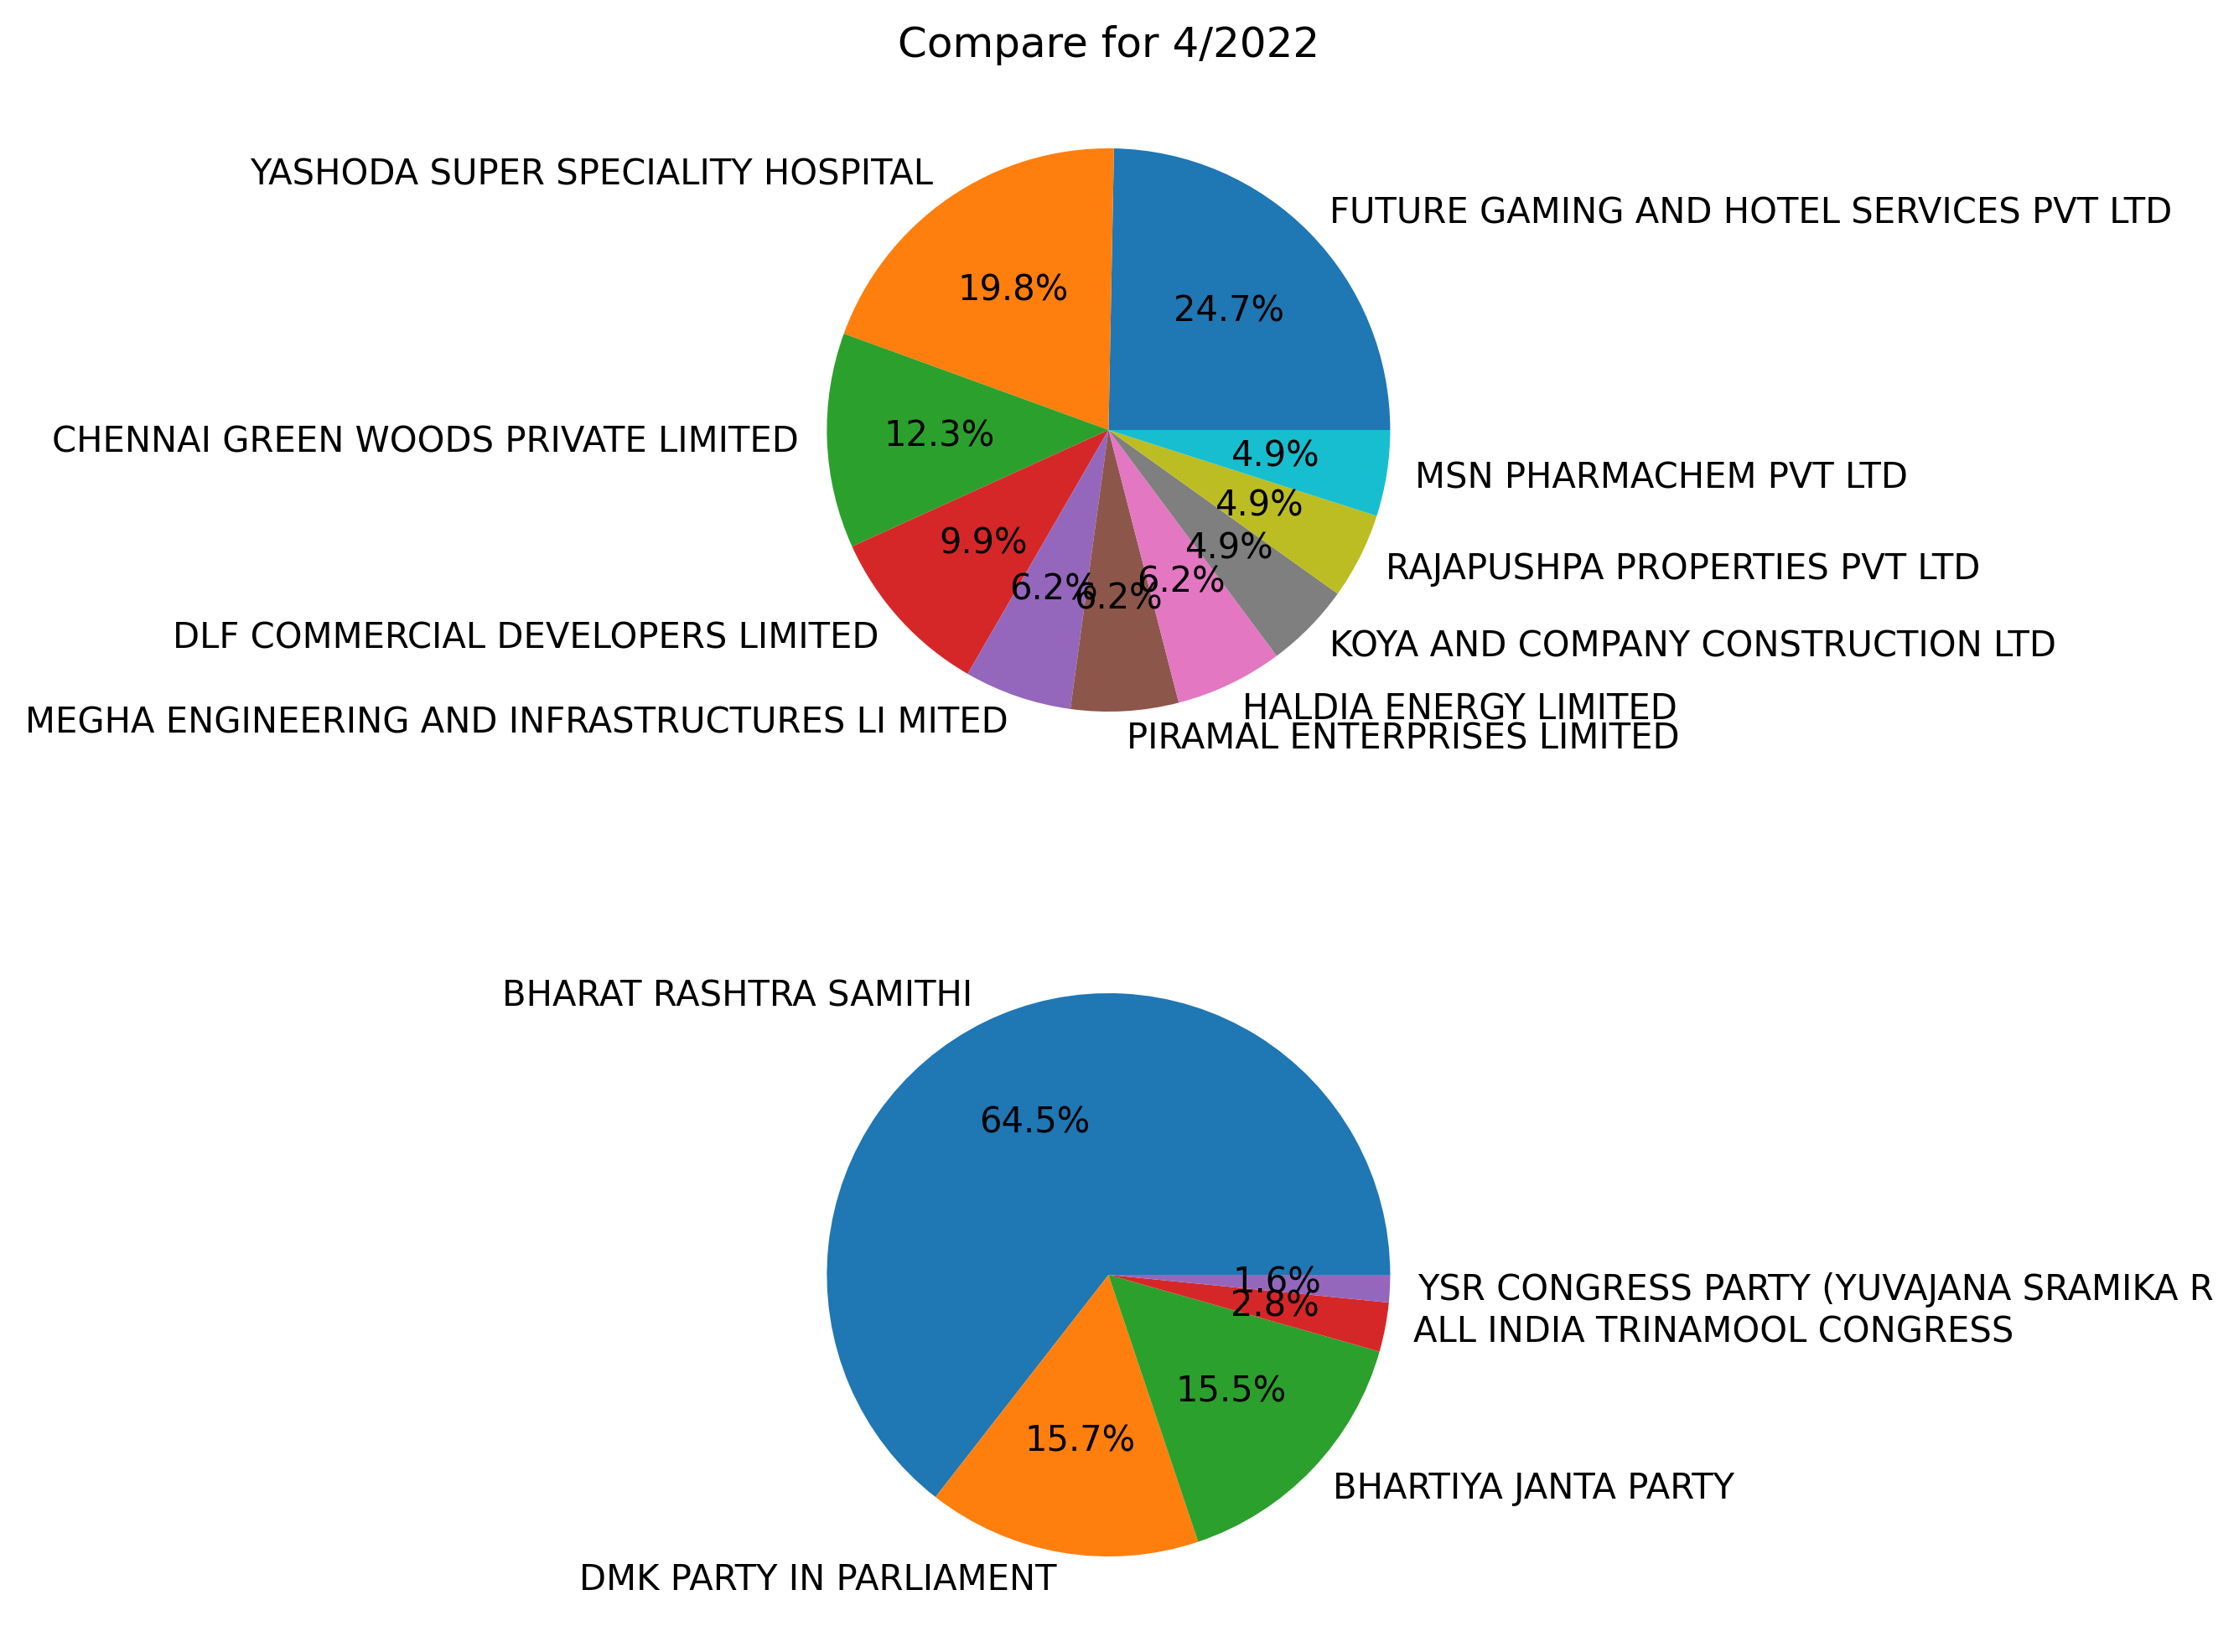

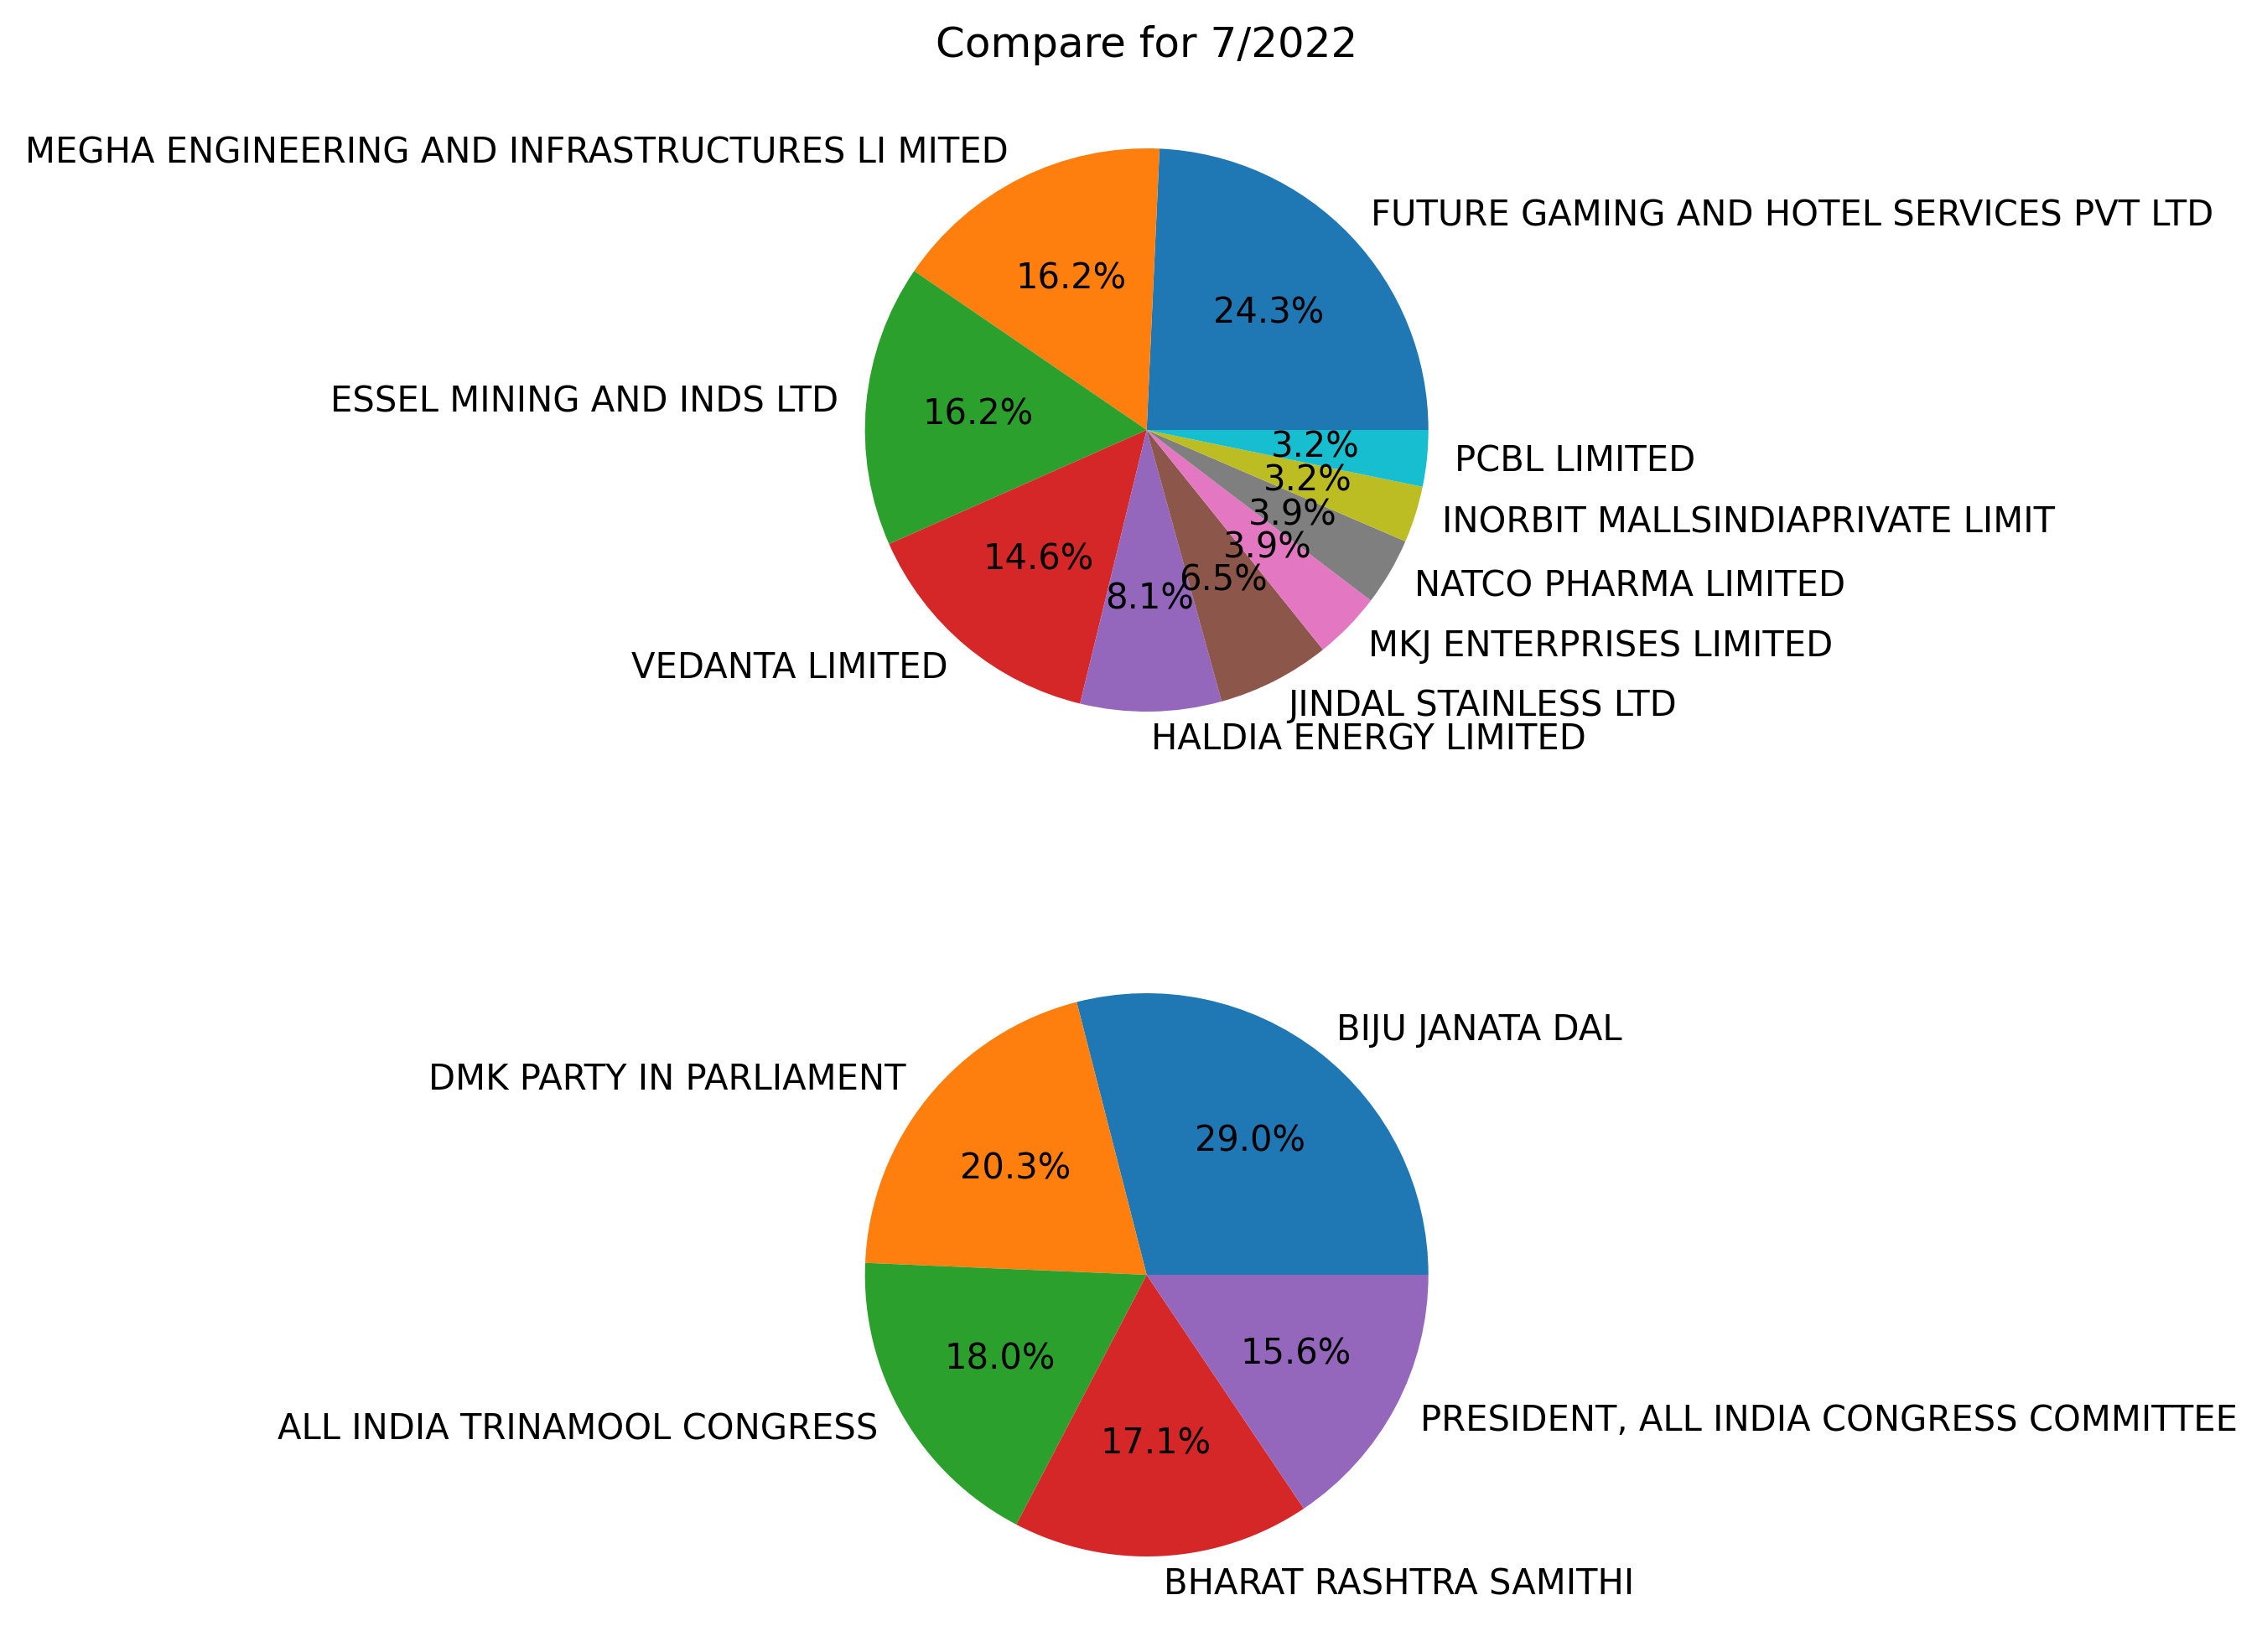

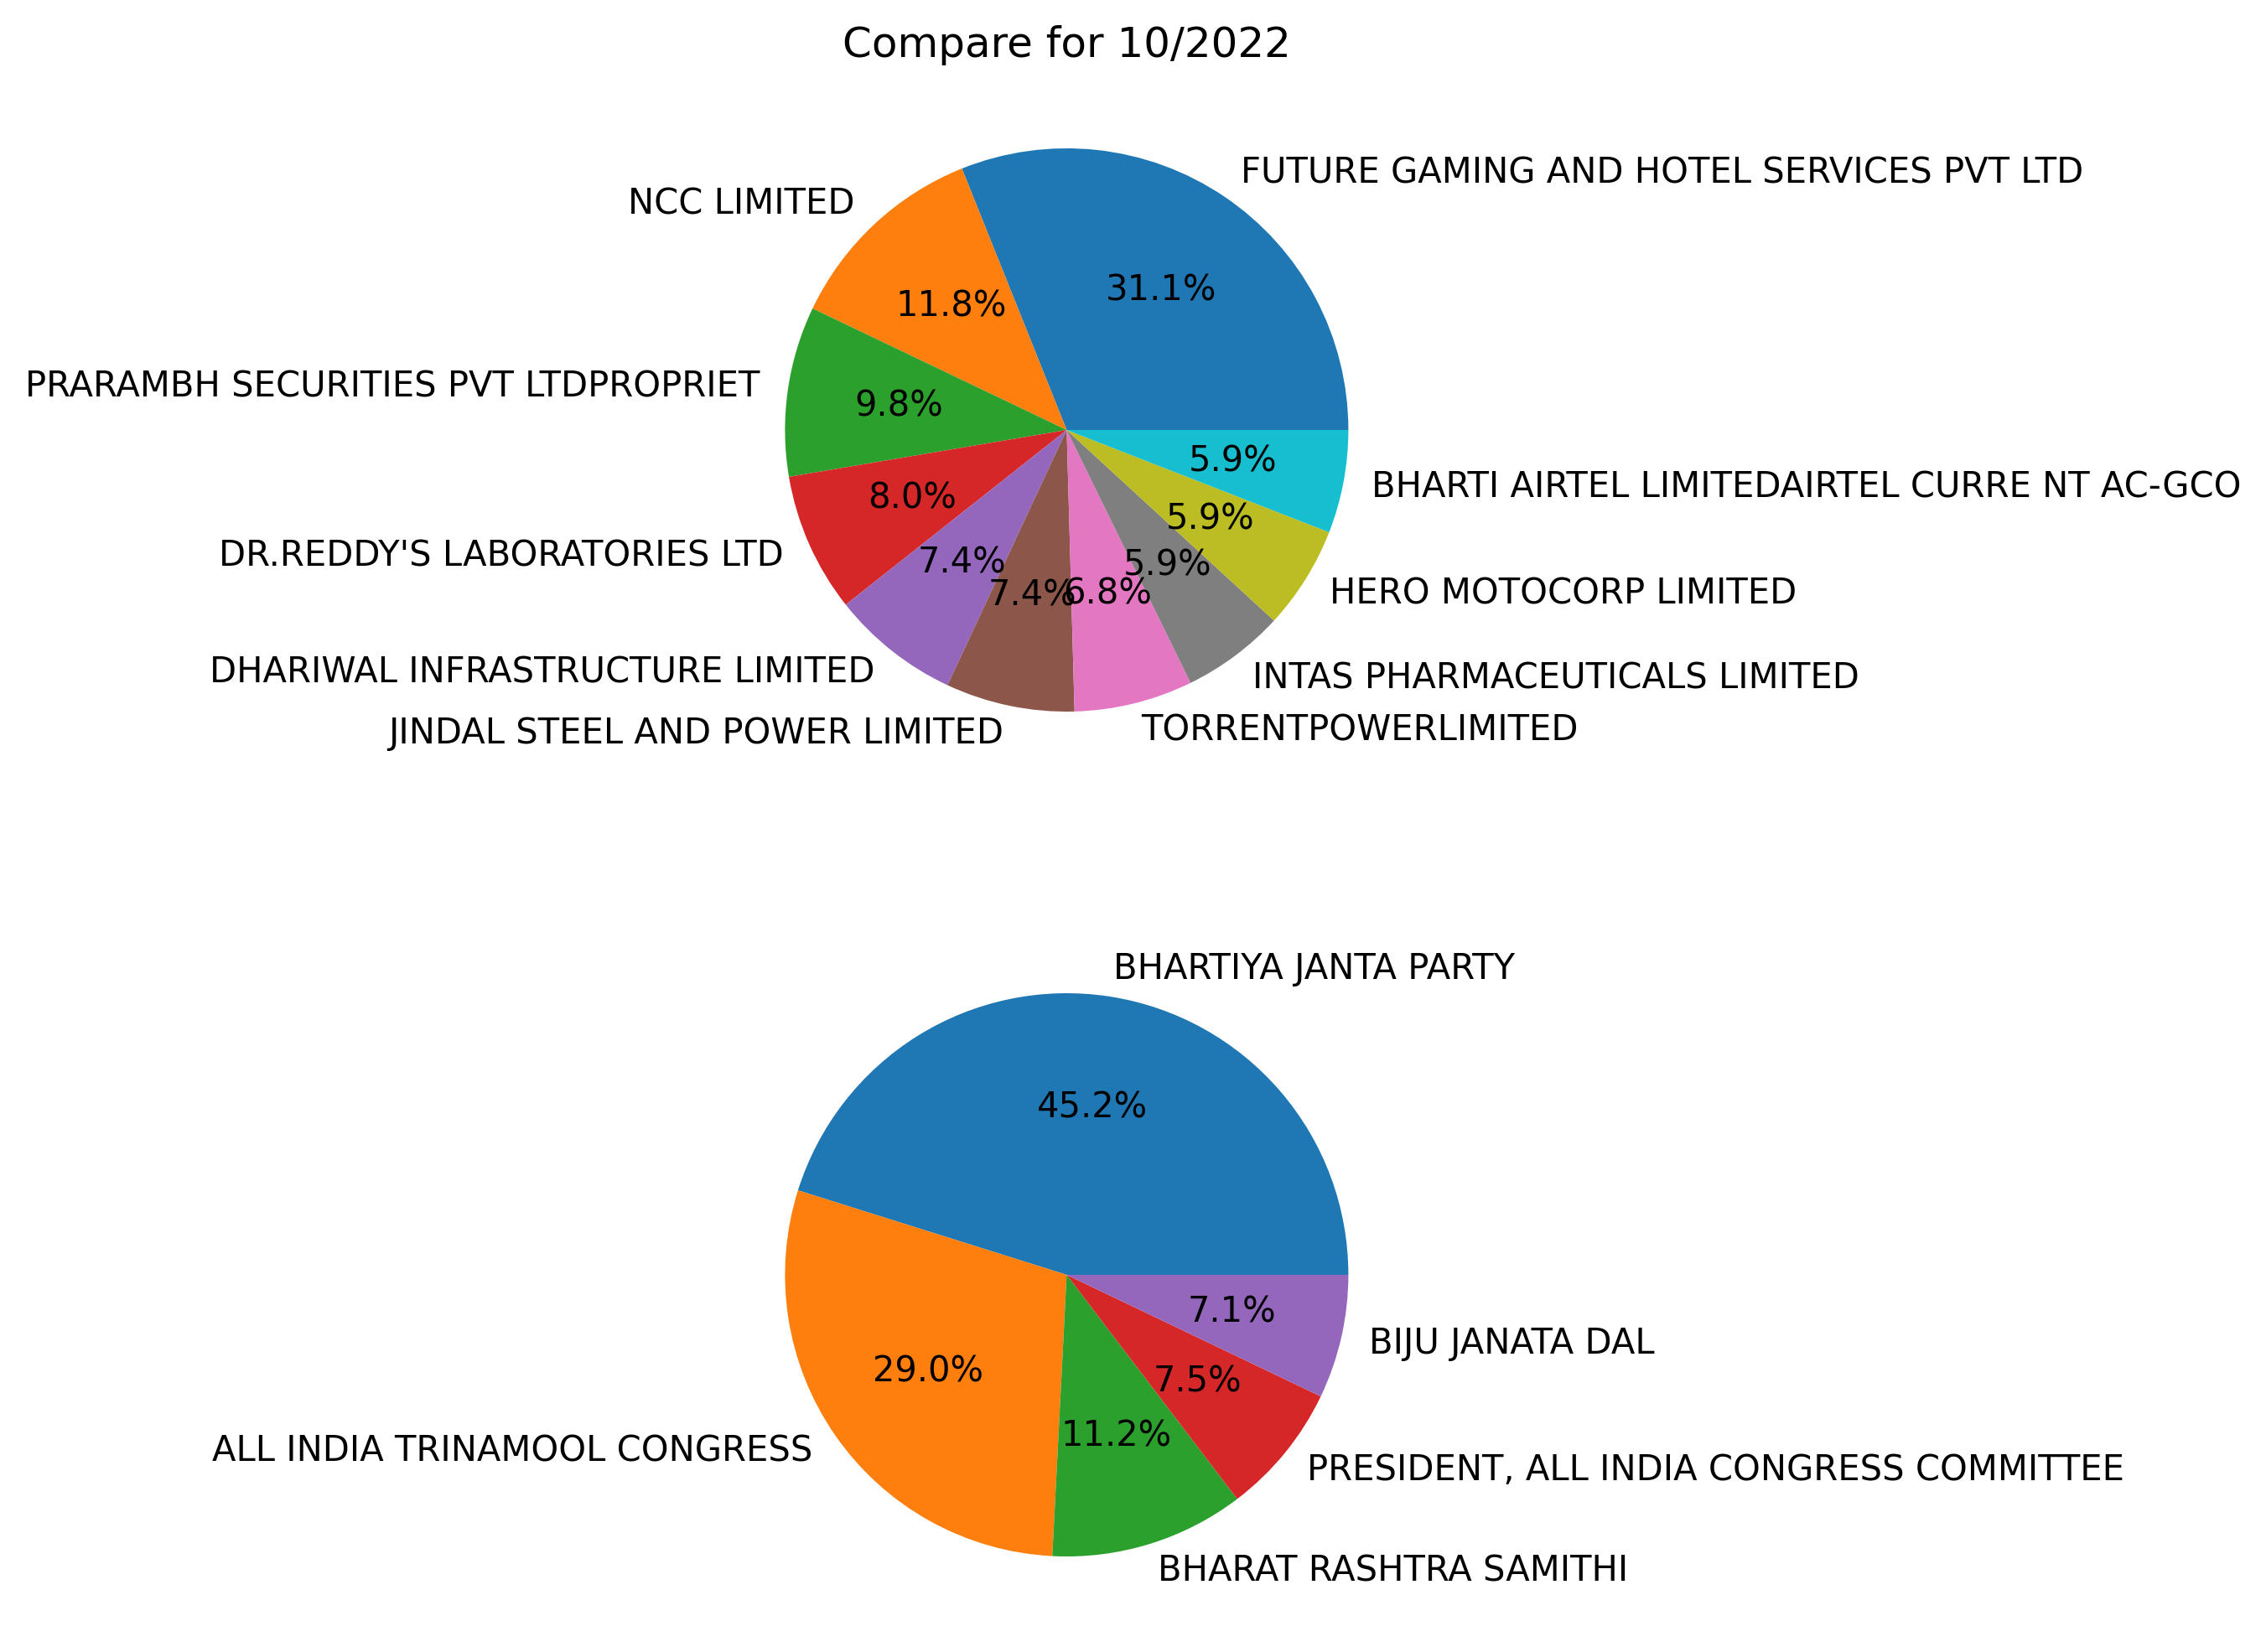

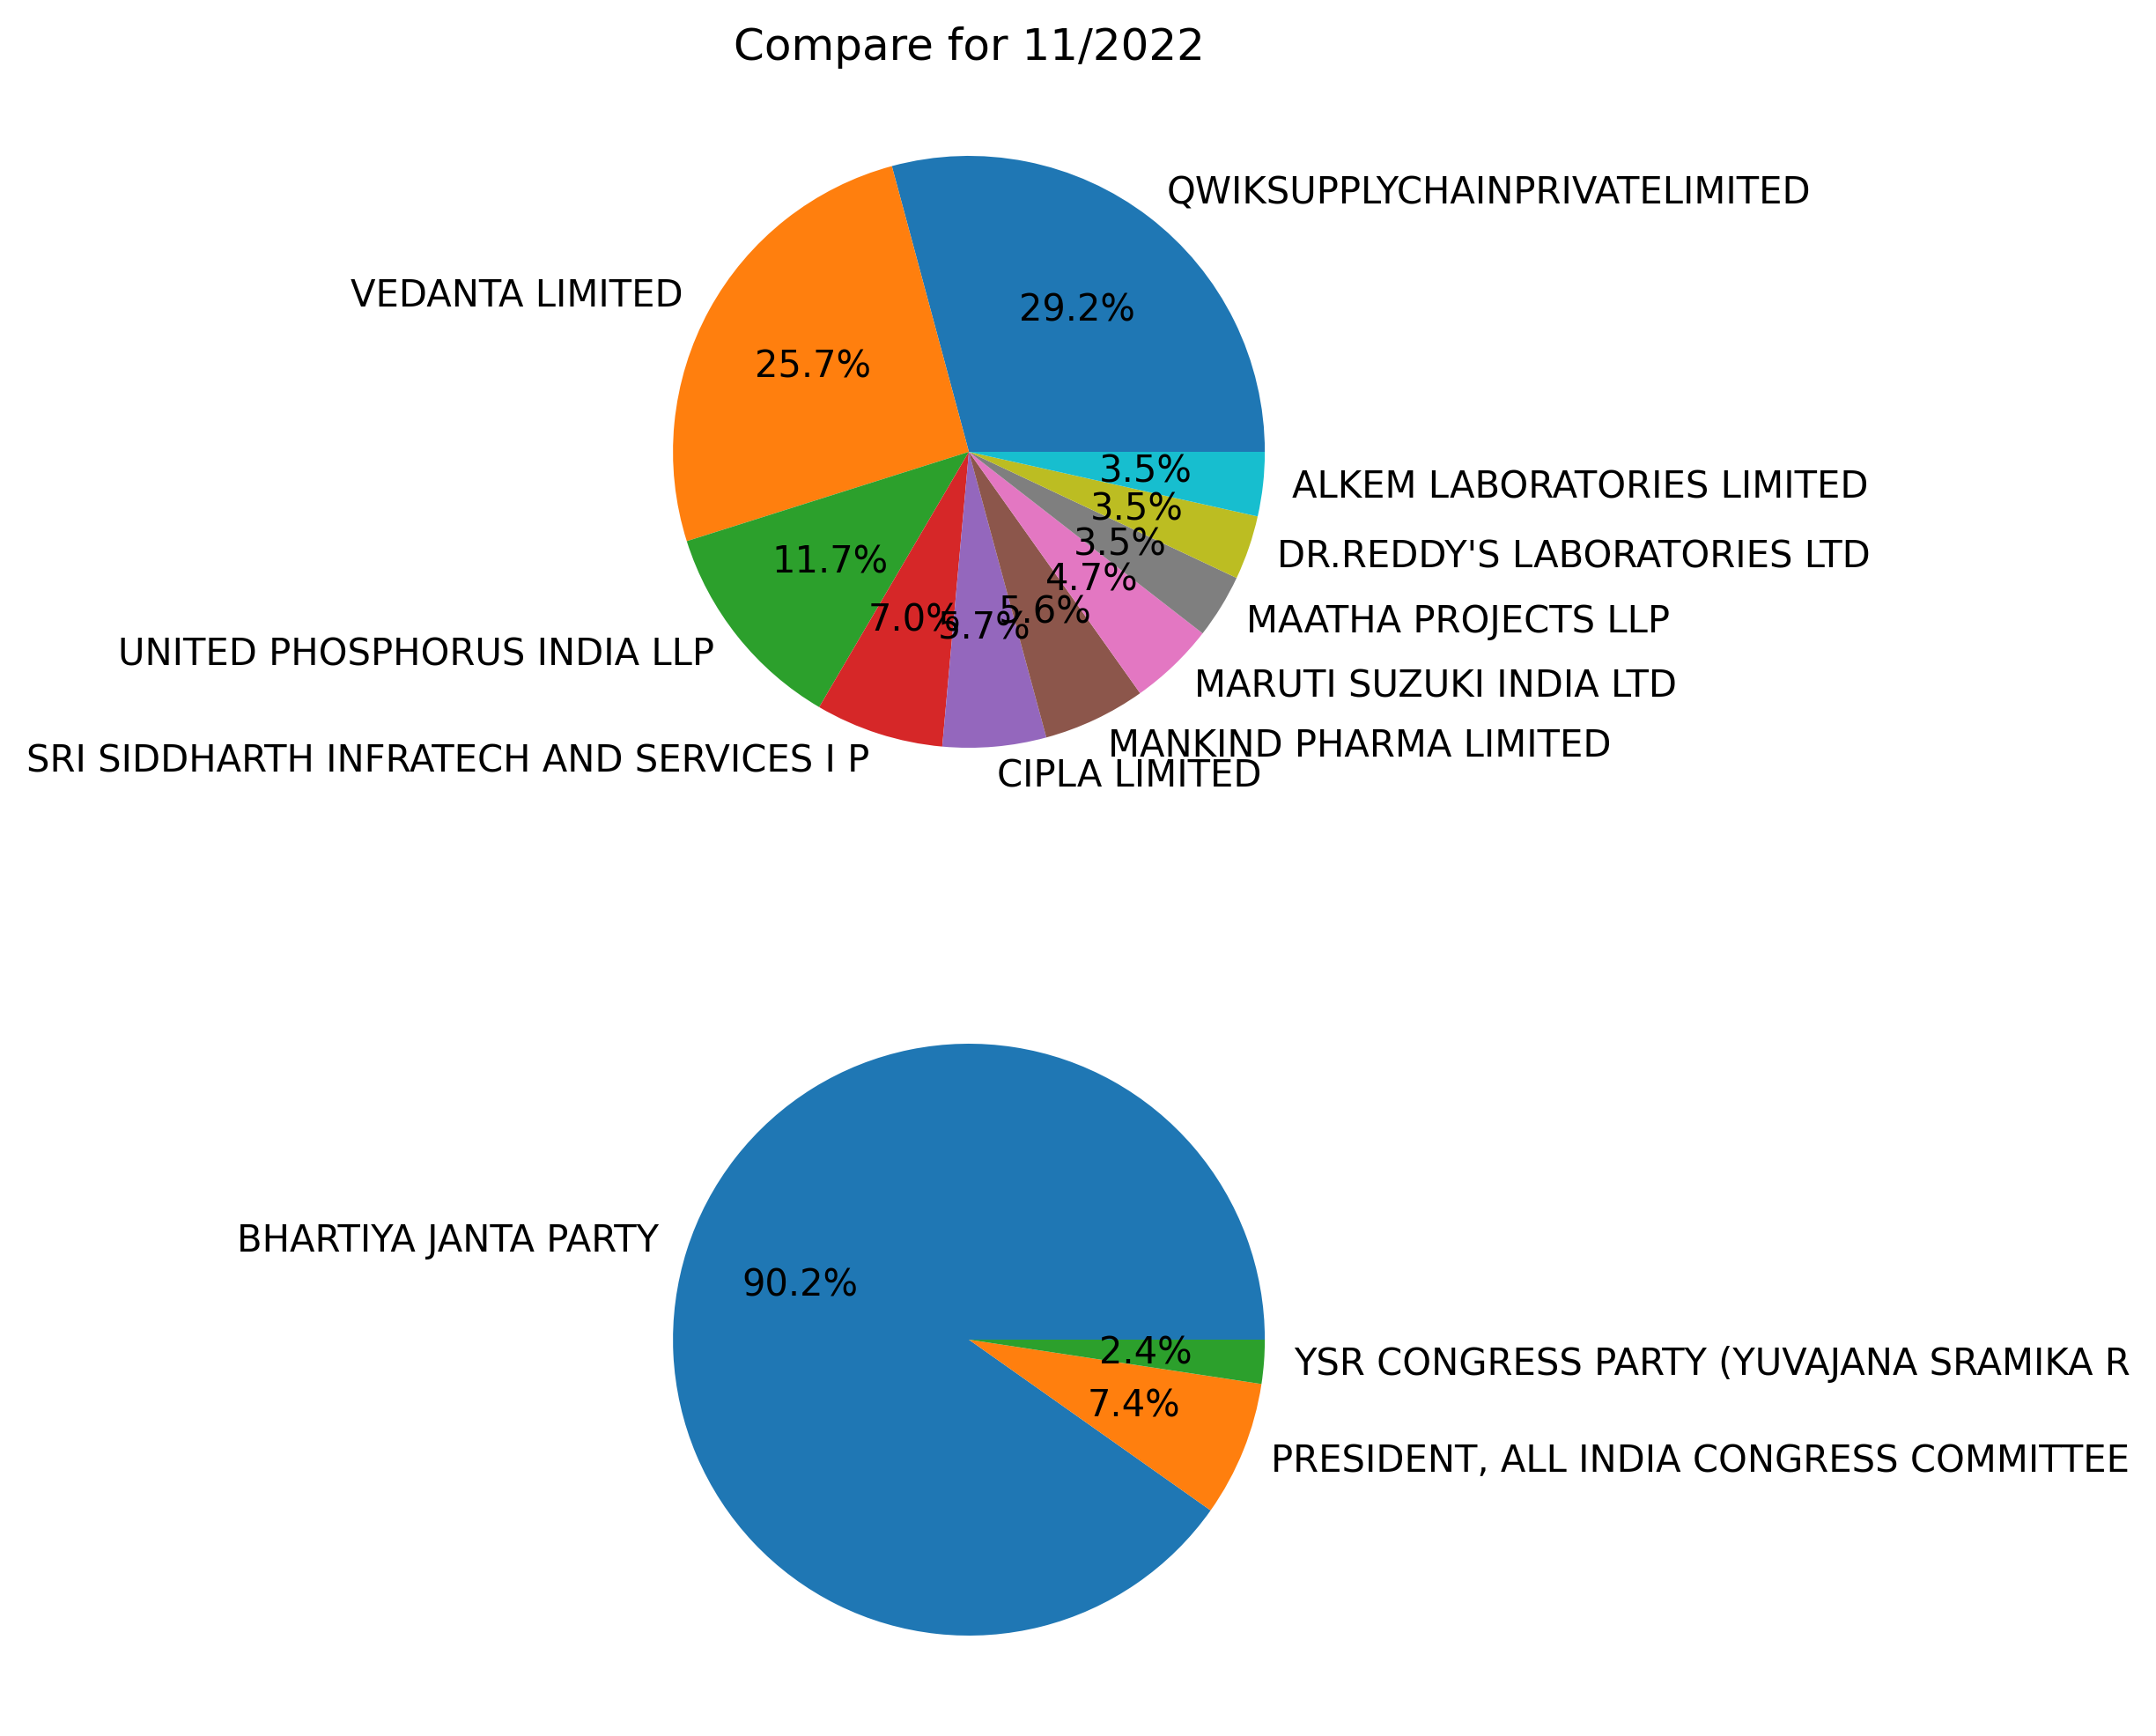

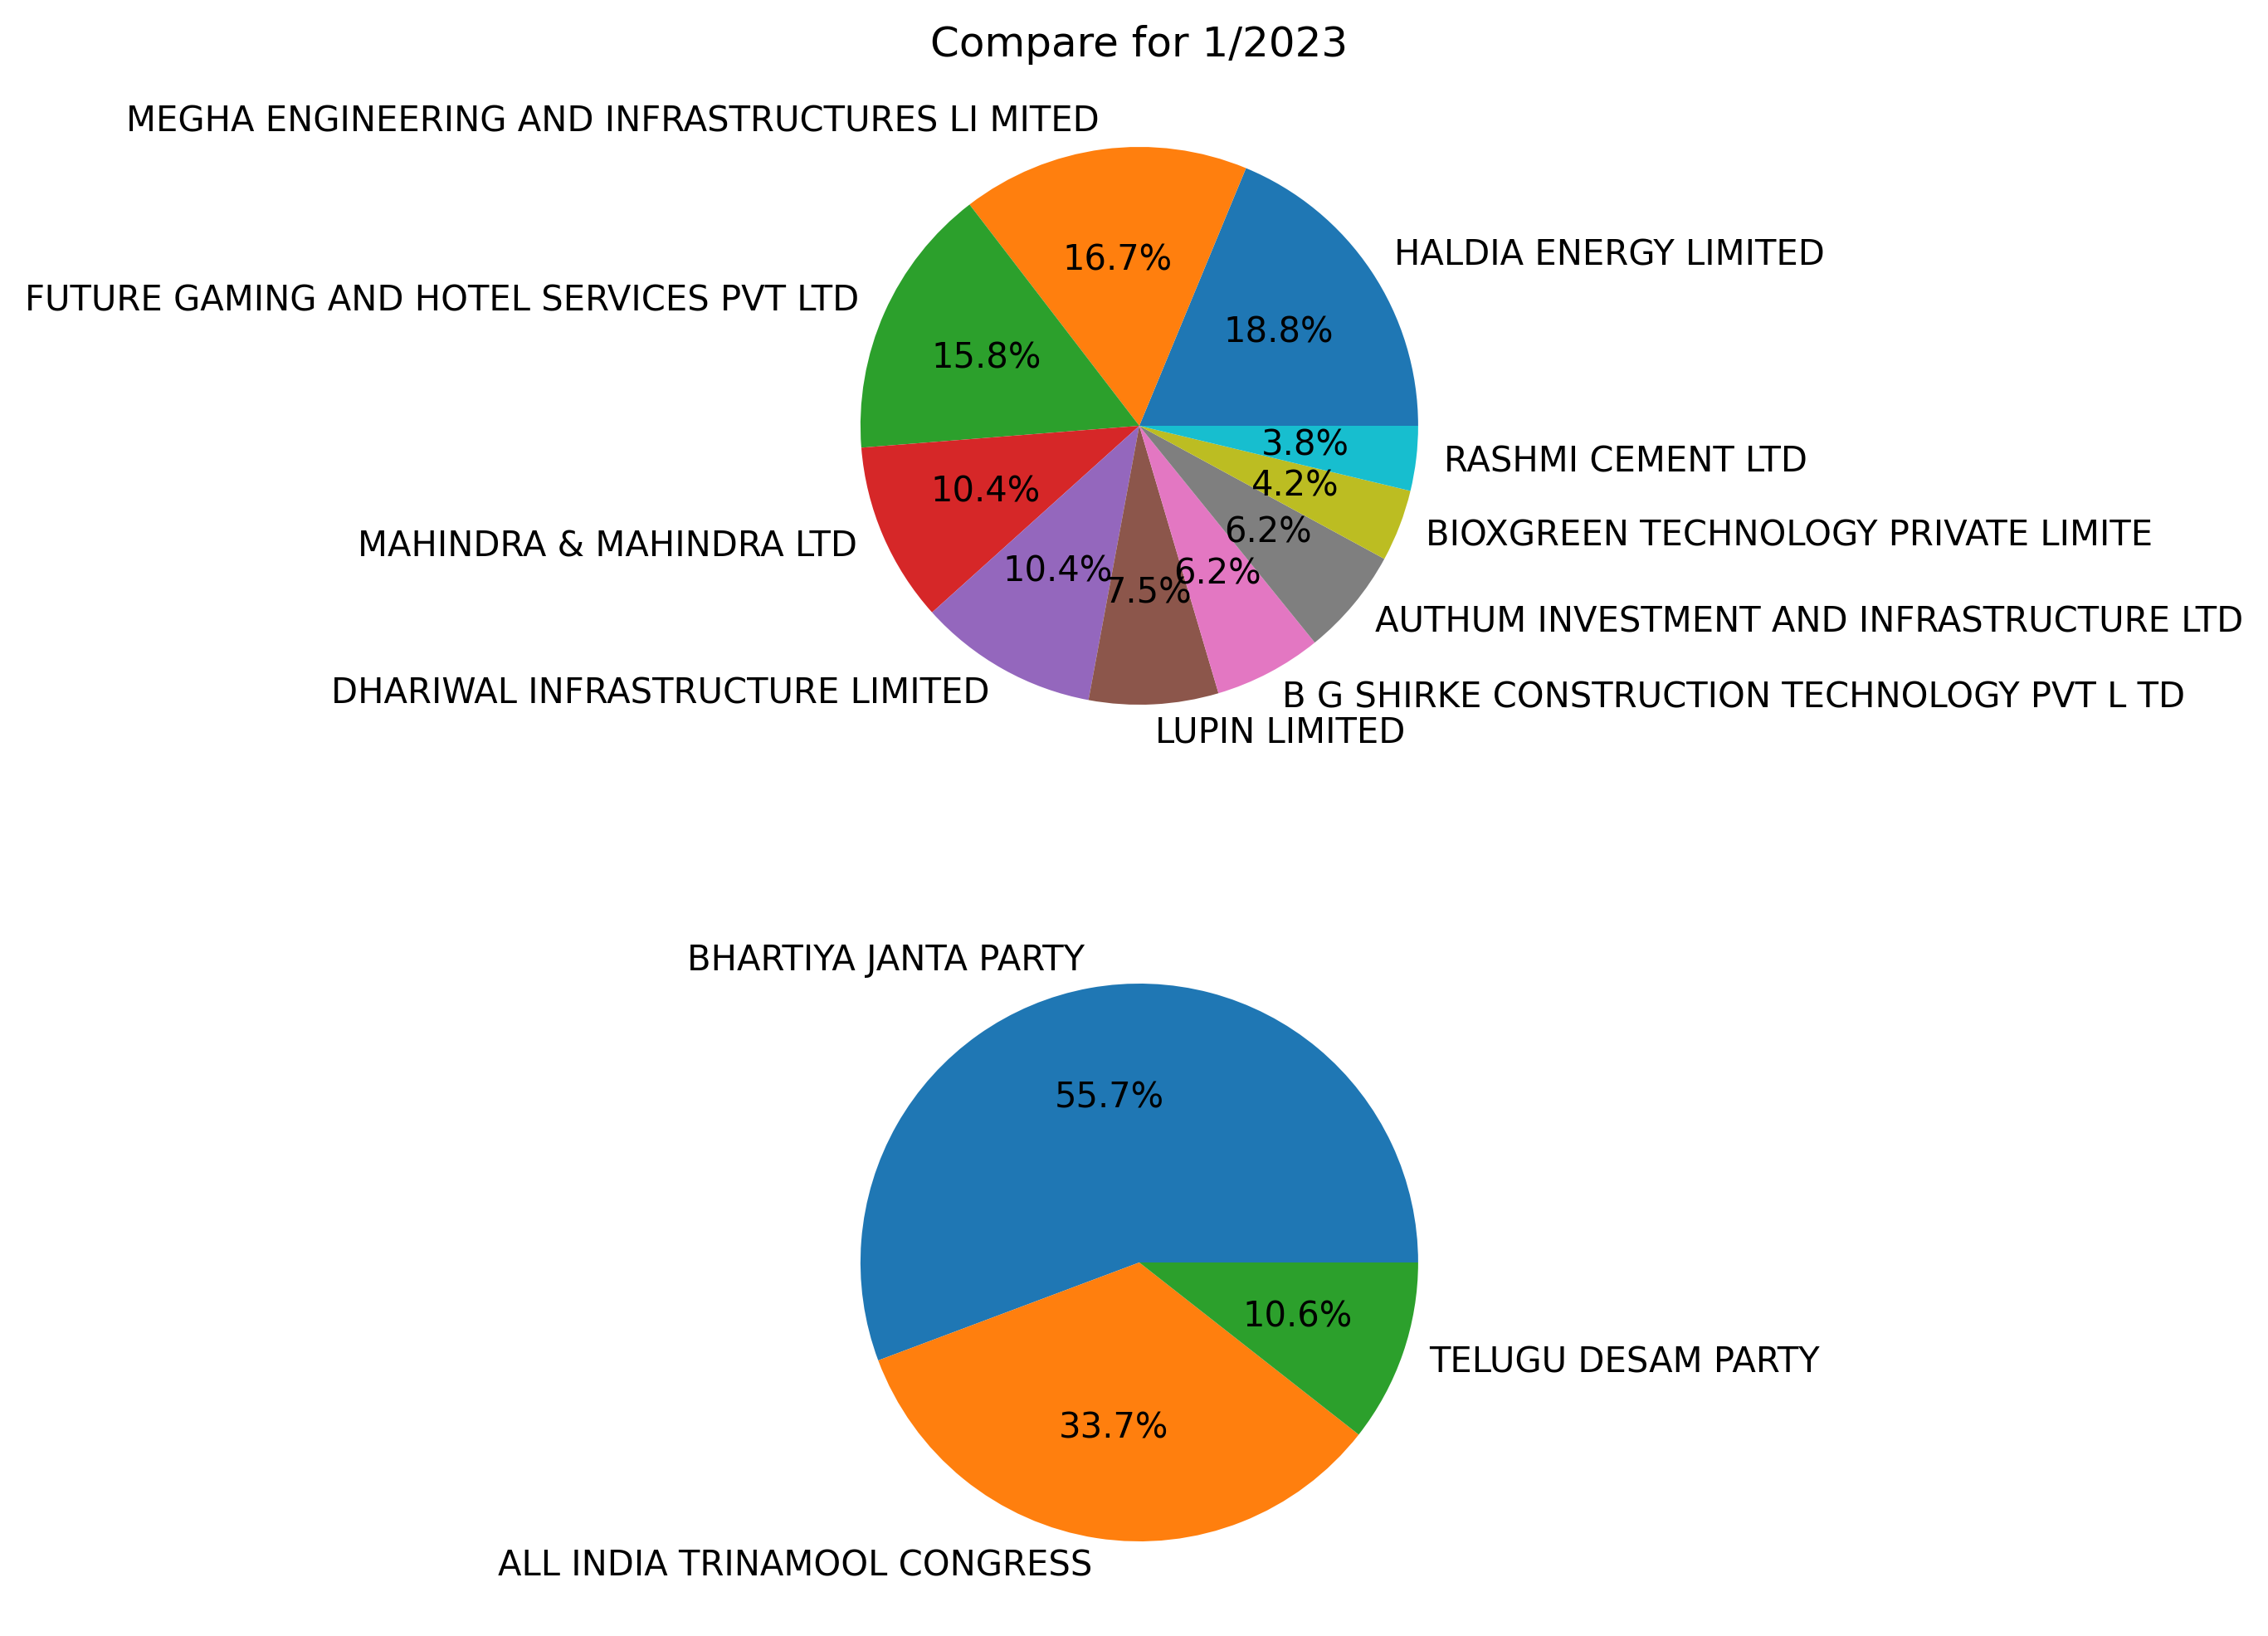

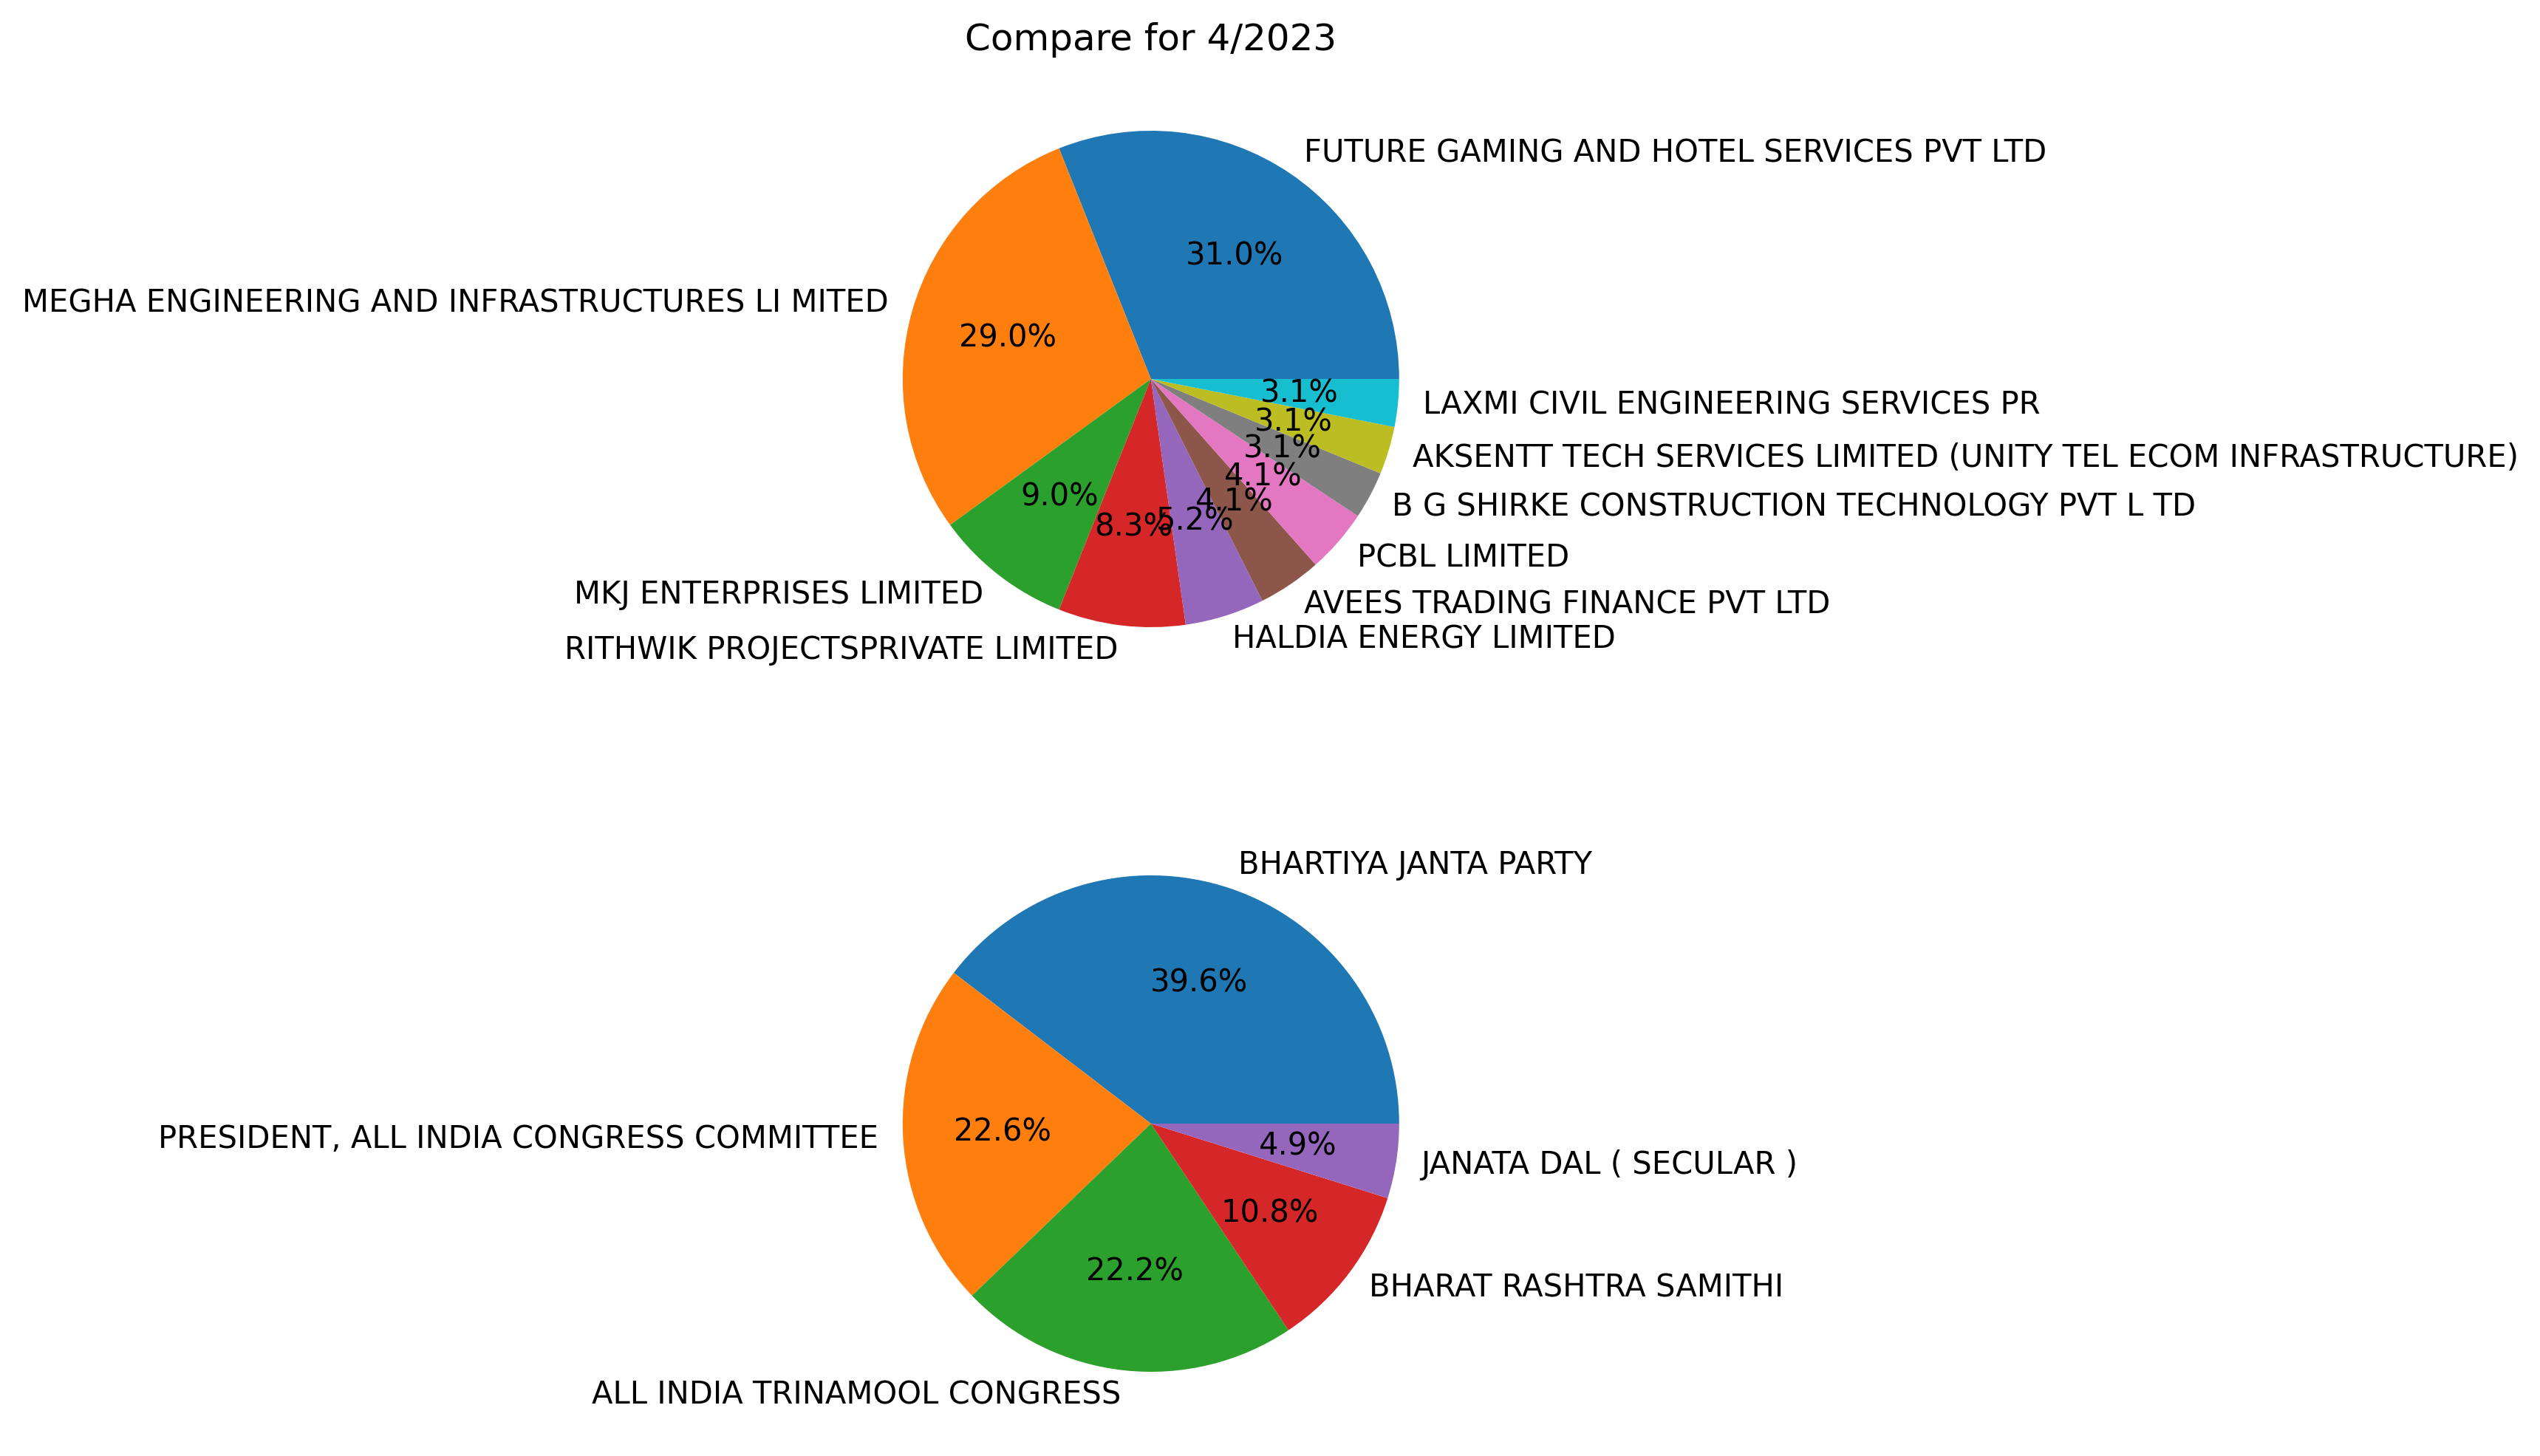

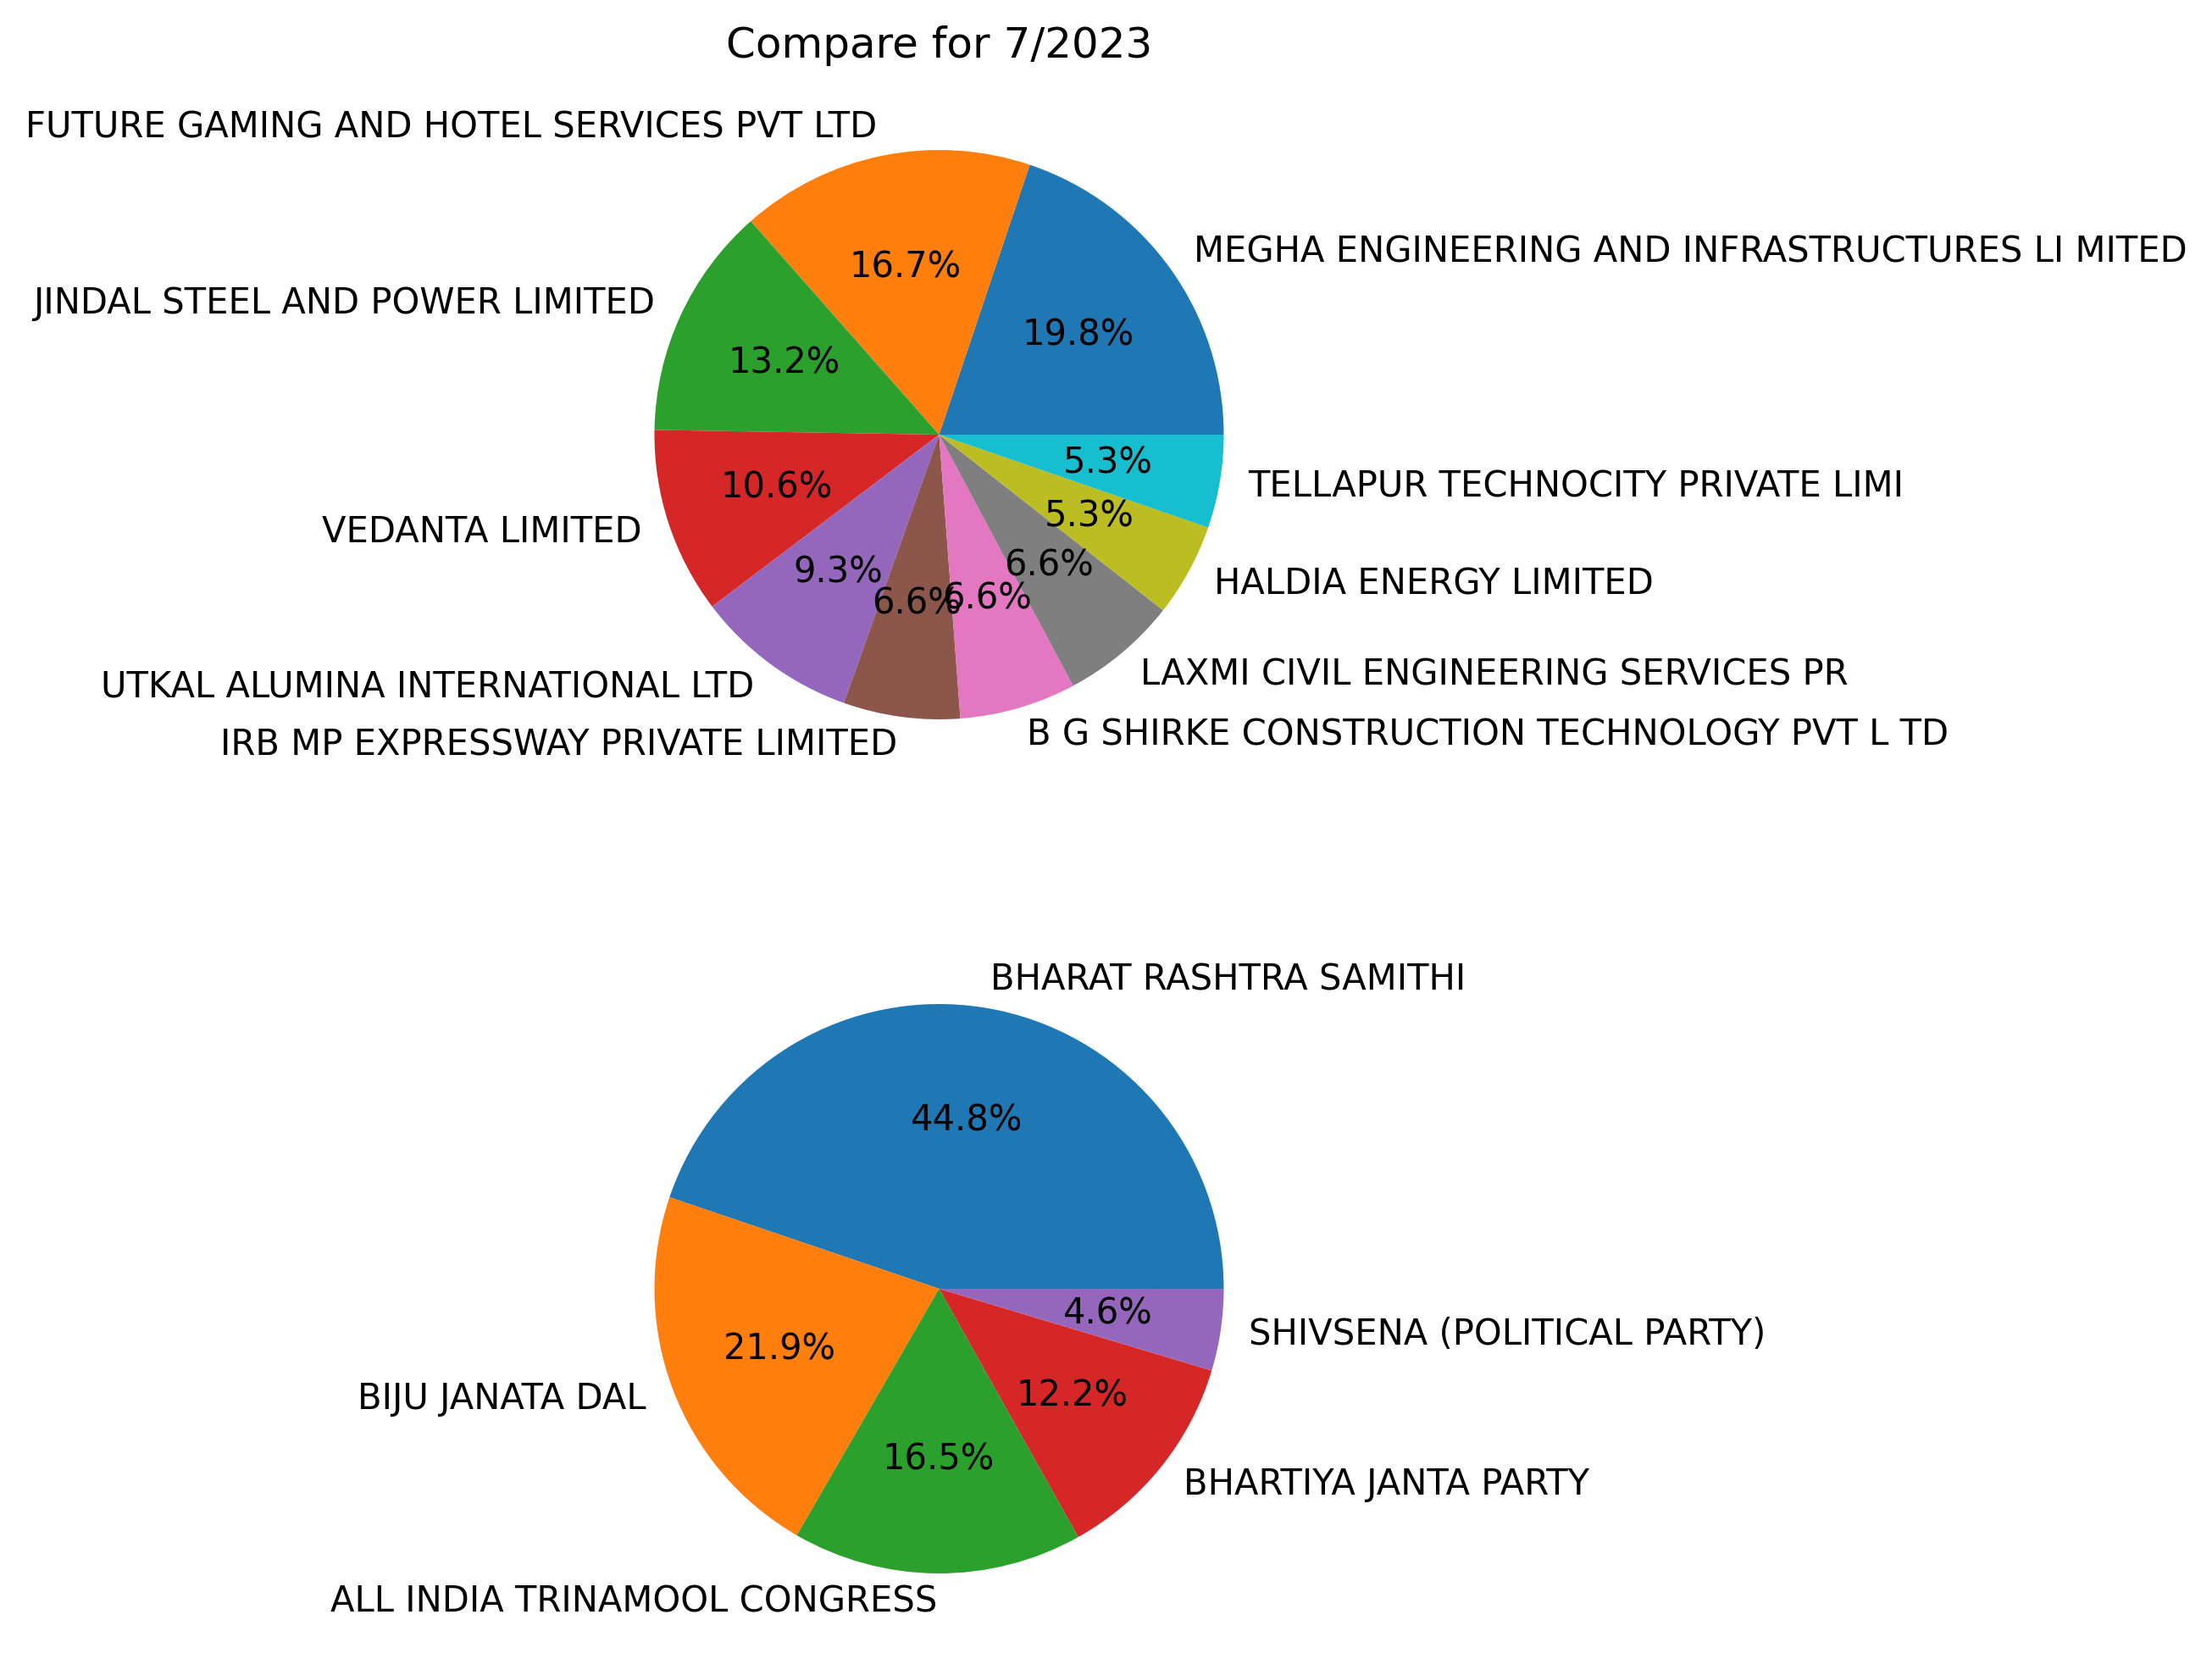

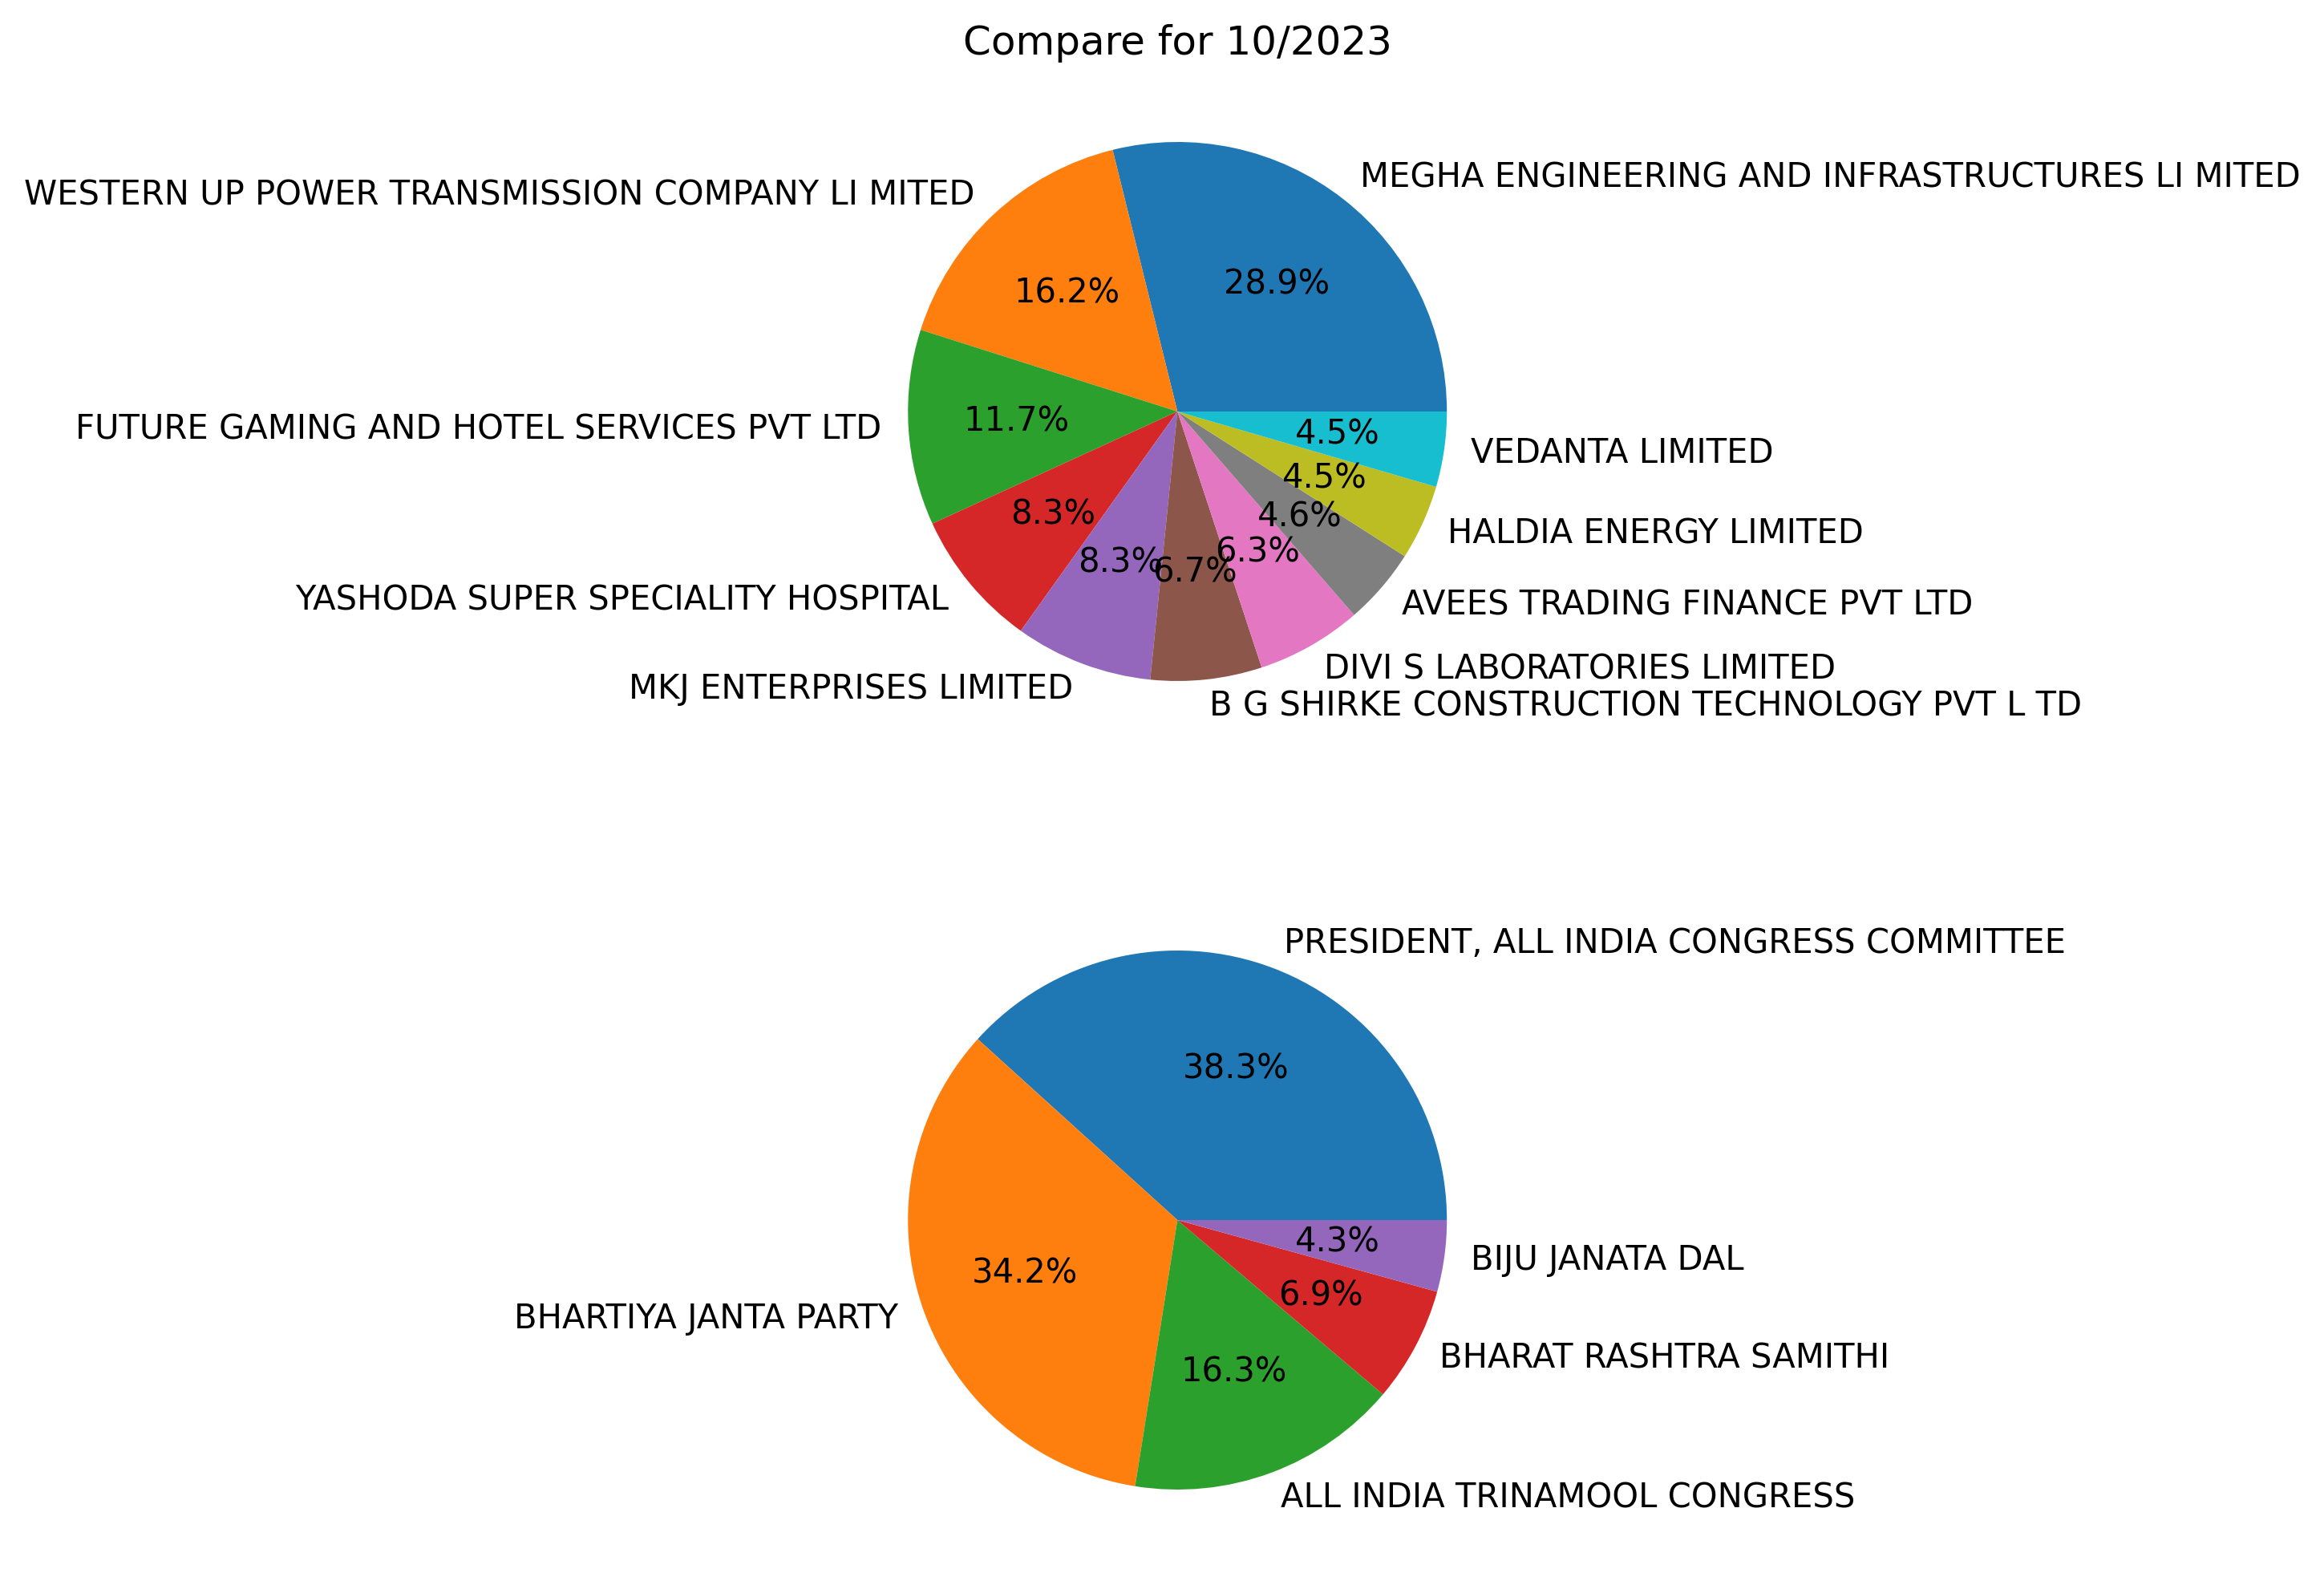

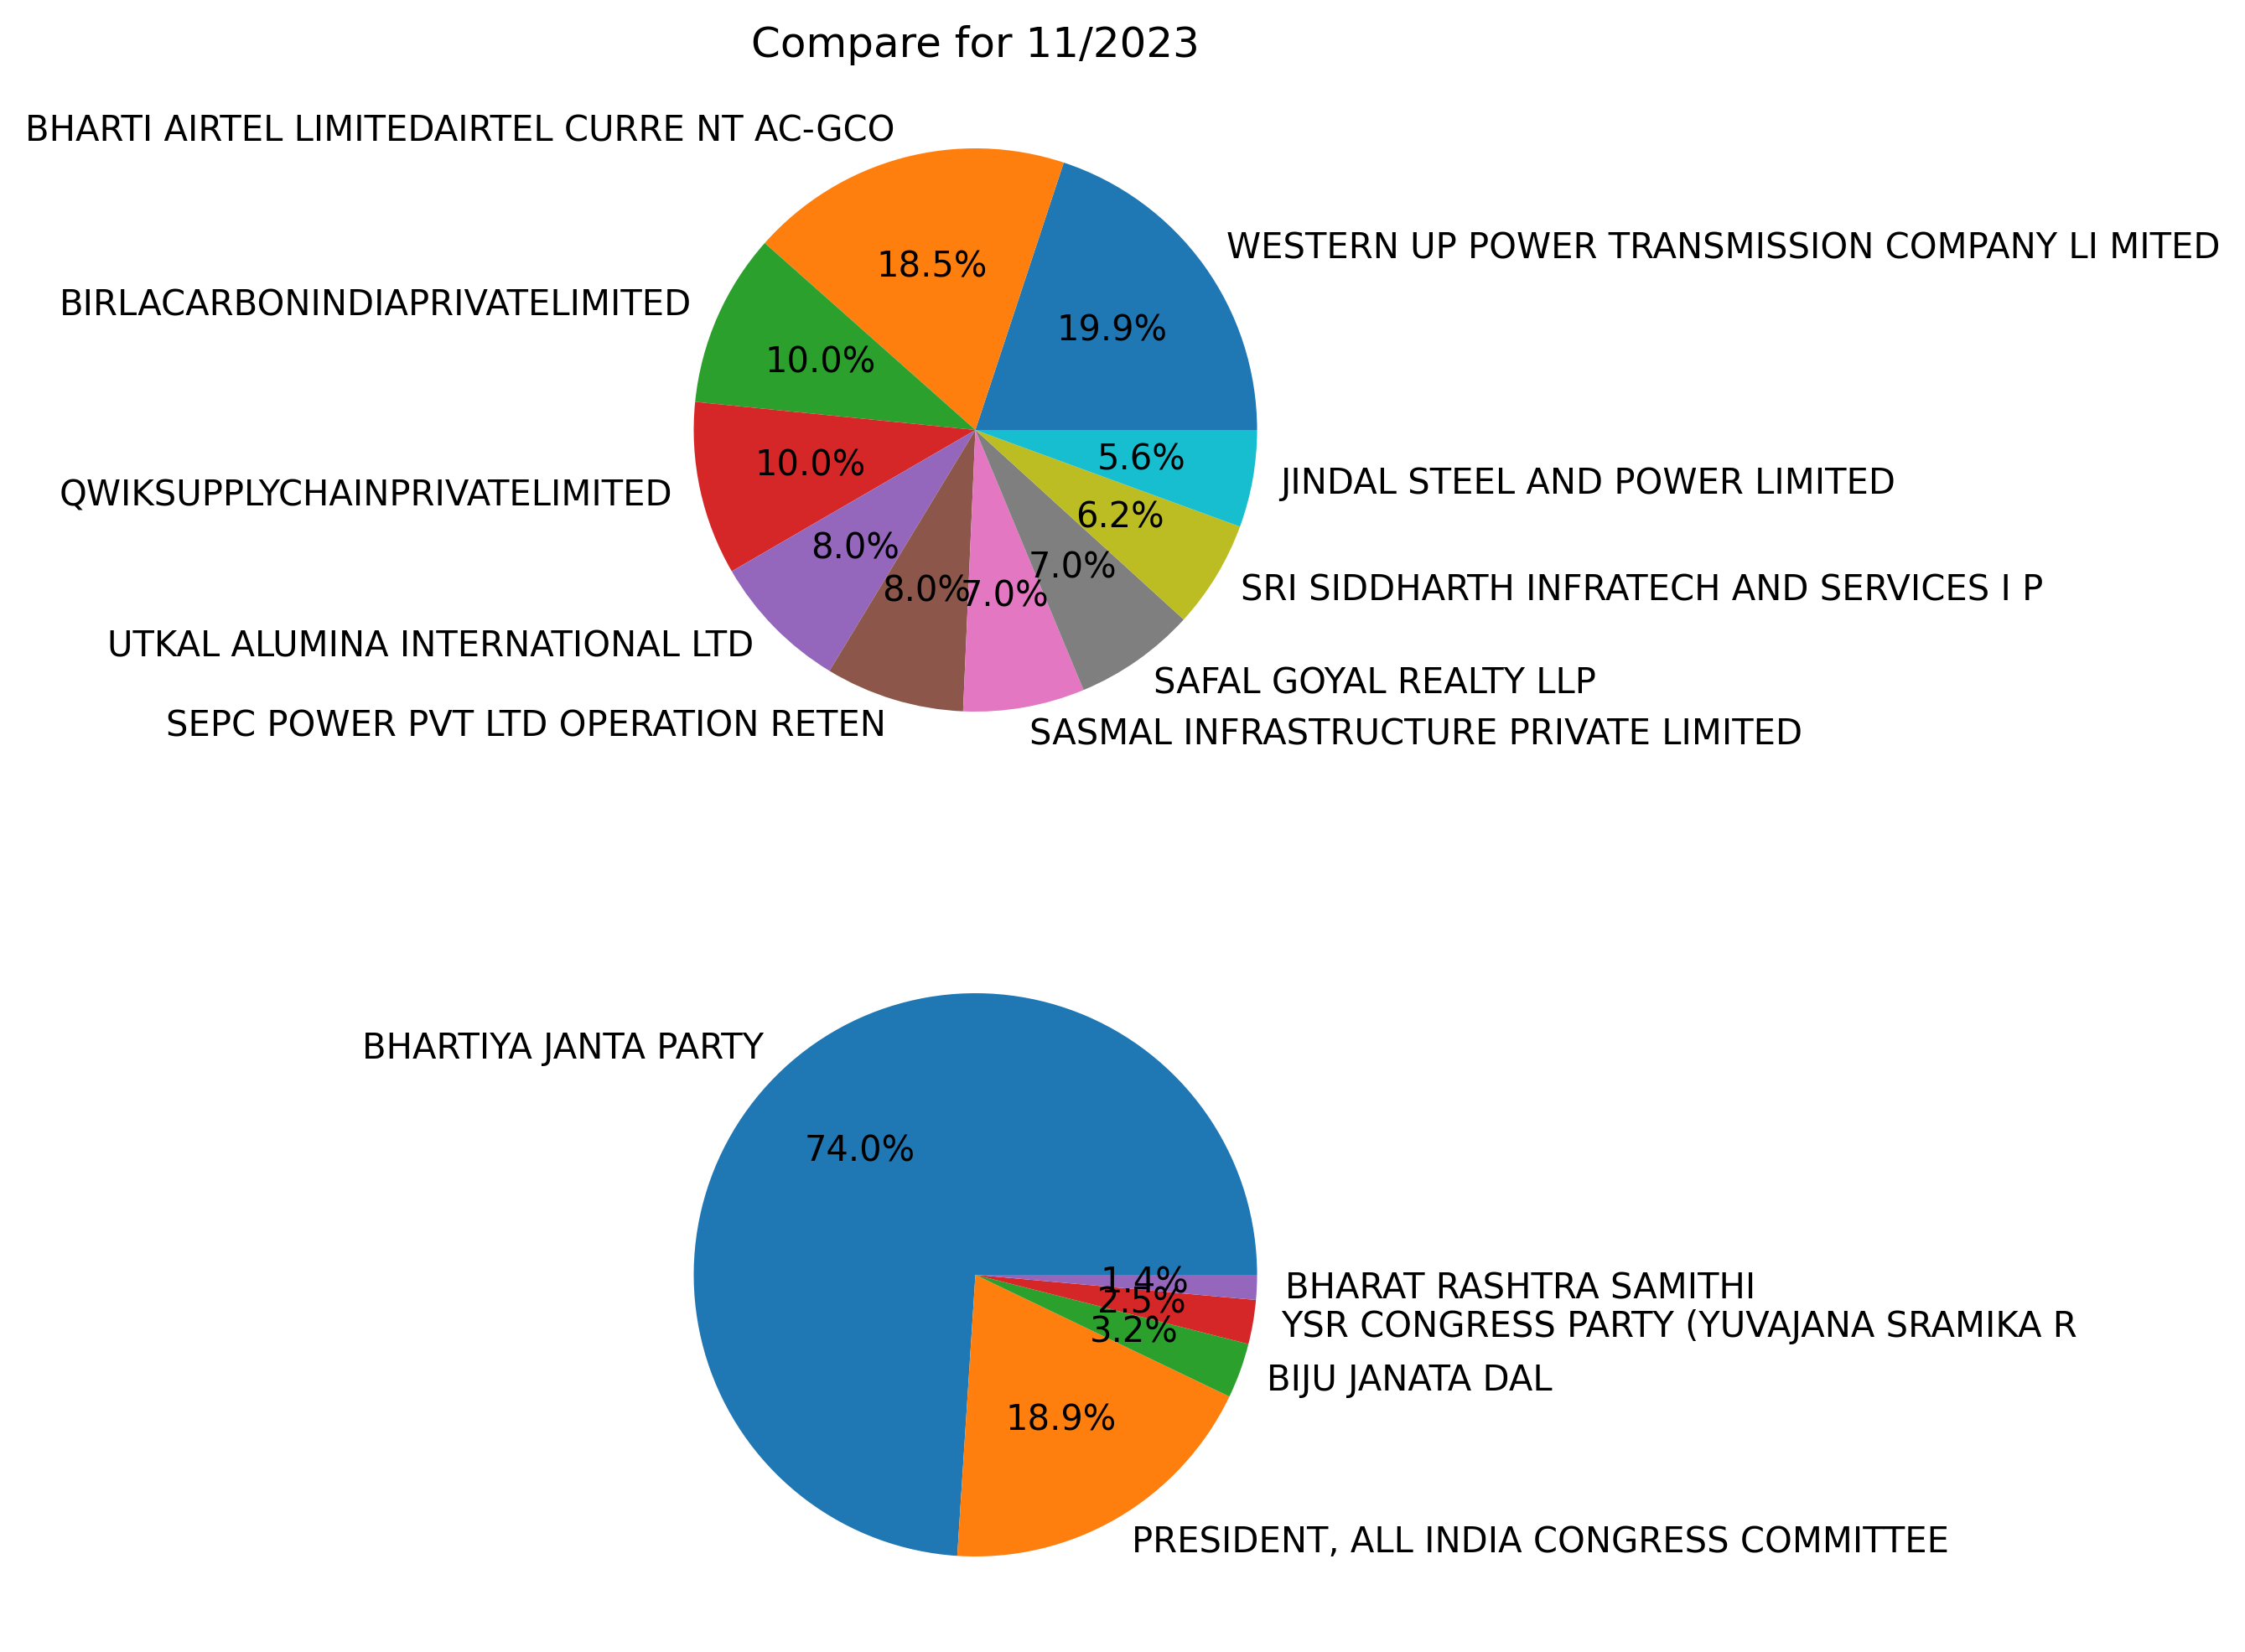

In [55]:
for year in [2019, 2020, 2021, 2022, 2023]:
    for month in range(12):
        compare(year, month)